In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define data
data = [
    # Model, Val_MAE, Val_MAE_std, Val_MRAE, Val_MRAE_std, Val_R2, Val_R2_std, Test_MAE, Test_MAE_std, Test_MRAE, Test_MRAE_std, Test_R2, Test_R2_std
    ['LR',            0.664, 0.008, 0.460, 0.128, 0.121, 0.026, 0.709, 0.055, 0.423, 0.093, 0.231, 0.097],
    ['RFR',           0.533, 0.010, 0.326, 0.007, 0.443, 0.022, 0.602, 0.051, 0.337, 0.060, 0.440, 0.054],
    ['SVR',           0.524, 0.005, 0.329, 0.004, 0.425, 0.010, 0.616, 0.050, 0.339, 0.052, 0.422, 0.059],
    ['CGCNN',         0.698, 0.088, 0.353, 0.056, 0.213, 0.177, 0.659, 0.039, 0.364, 0.009, 0.092, 0.092],
    ['CartNet',       0.660, 0.035, 0.362, 0.019, 0.144, 0.127, 0.721, 0.063, 0.353, 0.048, 0.155, 0.198],
    ['LEFTNet-Z',     0.656, 0.045, 0.348, 0.054, 0.365, 0.031, 0.597, 0.019, 0.357, 0.016, 0.337, 0.038],
    ['LEFTNet-Prop',  0.653, 0.053, 0.341, 0.053, 0.371, 0.055, 0.575, 0.024, 0.351, 0.020, 0.379, 0.044],
    ['CGCNN*',        0.684, 0.067, 0.362, 0.058, 0.138, 0.246, 0.626, 0.048, 0.354, 0.015, 0.179, 0.098],
    ['CartNet*',      0.670, 0.061, 0.350, 0.066, 0.282, 0.088, 0.643, 0.020, 0.375, 0.025, 0.251, 0.042],
    ['LEFTNet-Z*',    0.654, 0.058, 0.341, 0.061, 0.292, 0.160, 0.608, 0.043, 0.335, 0.014, 0.300, 0.105],
    ['LEFTNet-Prop*', 0.642, 0.059, 0.348, 0.064, 0.333, 0.129, 0.596, 0.014, 0.362, 0.009, 0.342, 0.030],
]

columns = [
    'Model',
    'Val_MAE', 'Val_MAE_std',
    'Val_MRAE', 'Val_MRAE_std',
    'Val_R2', 'Val_R2_std',
    'Test_MAE', 'Test_MAE_std',
    'Test_MRAE', 'Test_MRAE_std',
    'Test_R2', 'Test_R2_std'
]

df = pd.DataFrame(data, columns=columns)


/tmp/ipykernel_2241784/1859770971.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_ordered['Model'], rotation=45, ha='right')


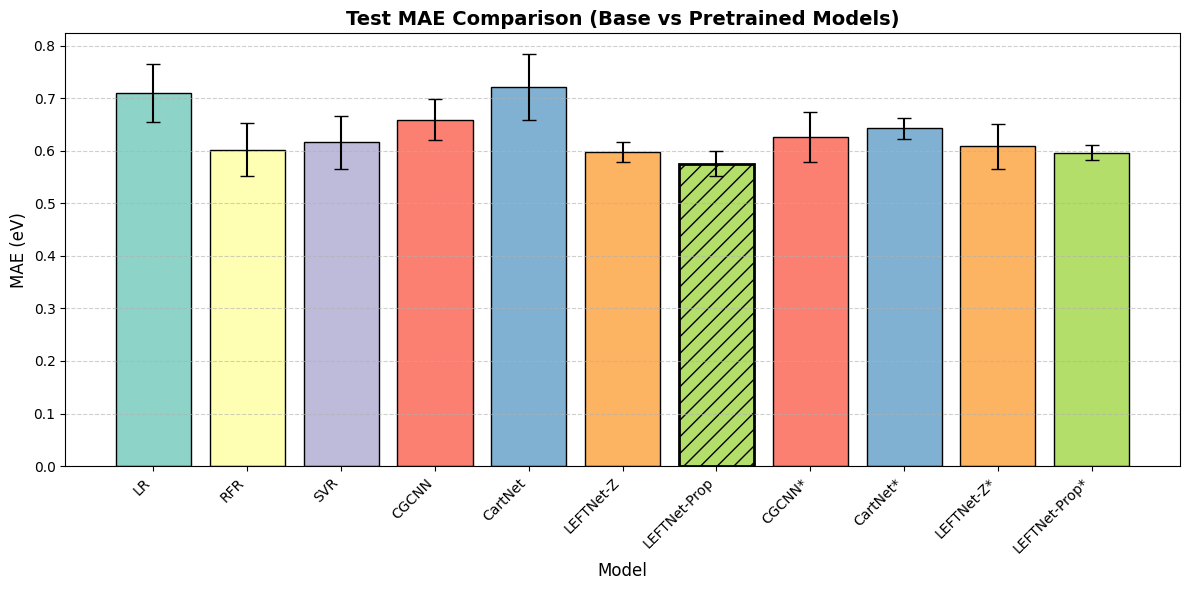

In [2]:
import matplotlib.pyplot as plt

# Provided colors and label mappings
colors = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69']
method_labels = {
    "leftnet": "LEFTNet-Z",
    "leftnet_encoding": "LEFTNet-Prop",
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "random_forest": "RFR",
    "linear_regression": "LR",
    "svm": "SVR"
}
custom_order = ["linear_regression", "random_forest", "svm", "cgcnn", "cartnet", "leftnet", "leftnet_encoding"]

# Build ordered model list: all base models first, then * variants in the same order
ordered_models = []
for base in custom_order:
    label = method_labels[base]
    ordered_models.append(label)
for base in custom_order:
    label = method_labels[base]
    if f"{label}*" in df['Model'].values:
        ordered_models.append(f"{label}*")

# Reorder the DataFrame
df_ordered = df.set_index('Model').loc[ordered_models].reset_index()

# Assign colors based on base model (same color for * variant)
color_map = {method_labels[m]: c for m, c in zip(custom_order, colors)}
bar_colors = [color_map[model.replace('*', '')] for model in df_ordered['Model']]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(
    df_ordered['Model'],
    df_ordered['Test_MAE'],
    yerr=df_ordered['Test_MAE_std'],
    capsize=5,
    color=bar_colors,
    edgecolor='black'
)

# Highlight best (lowest MAE)
best_idx = df_ordered['Test_MAE'].idxmin()
bars[best_idx].set_linewidth(2)
bars[best_idx].set_hatch('//')

# Labels and aesthetics
ax.set_title('Test MAE Comparison (Base vs Pretrained Models)', fontsize=14, weight='bold')
ax.set_ylabel('MAE (eV)', fontsize=12)
ax.set_xlabel('Model', fontsize=12)
ax.set_xticklabels(df_ordered['Model'], rotation=45, ha='right')
ax.grid(True, axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Define number of folds per model
folds = ["fold " + str(i) for i in range(1, 11)]

# Define models per group
pretrained_models = ["CGCNN", "Leftnet", "Leftnet encoding", "cartnet"]
scratch_models = ["CGCNN", "Leftnet", "Leftnet encoding", "cartnet", "linear regression", "random_forest", "svr"]

# Pretrained scores (40 total: 4 models × 10 folds)
pretrained_scores = [
    0.3474, 0.3569, 0.3202, 0.3623, 0.3643, 0.3428, 0.3697, 0.3626, 0.3508, 0.3632,  # CGCNN
    0.3389, 0.3349, 0.3345, 0.3326, 0.3723, 0.3264, 0.3298, 0.3233, 0.3359, 0.3214,  # Leftnet
    0.3628, 0.3722, 0.3658, 0.3627, 0.3516, 0.3497, 0.3672, 0.3584, 0.3499, 0.3768,  # Leftnet encoding
    0.347,  0.346,  0.382,  0.411,  0.373,  0.372,  0.351,  0.421,  0.377,  0.371   # cartnet
]

# Scratch scores (70 total: 7 models × 10 folds)
scratch_scores = [
    0.3639, 0.3585, 0.3703, 0.3659, 0.3621, 0.3424, 0.3653, 0.3757, 0.3692, 0.3637,  # CGCNN
    0.3480, 0.3635, 0.3910, 0.3746, 0.3460, 0.3425, 0.3402, 0.3517, 0.3619, 0.3478,  # Leftnet
    0.3550, 0.3632, 0.3746, 0.3385, 0.3333, 0.3274, 0.3726, 0.3336, 0.3764, 0.3316,  # Leftnet encoding
    0.375,  0.334,  0.371,  0.366,  0.348,  0.378,  0.358,  0.389,  0.334,  0.365,   # cartnet
    0.4594, 0.3696, 0.4000, 0.4149, 0.6619, 0.3575, 0.4368, 0.3422, 0.4345, 0.3550,   # linear regression
    0.3961, 0.3413, 0.3419, 0.4116, 0.2382, 0.2993, 0.3939, 0.2863, 0.3885, 0.2773,   # random_forest
    0.4079, 0.3332, 0.3494, 0.3944, 0.2373, 0.3202, 0.3577, 0.3050, 0.3901, 0.2961    # svr
]

# Construct rows for the dataframe
pretrained_rows = [
    {"test": fold, "Model": model, "Score": score, "Source": "pretrained"}
    for model, scores in zip(pretrained_models, [pretrained_scores[i*10:(i+1)*10] for i in range(4)])
    for fold, score in zip(folds, scores)
]

scratch_rows = [
    {"test": fold, "Model": model, "Score": score, "Source": "scratch"}
    for model, scores in zip(scratch_models, [scratch_scores[i*10:(i+1)*10] for i in range(7)])
    for fold, score in zip(folds, scores)
]

# Combine and create DataFrame
combined_mrae_df = pd.DataFrame(pretrained_rows + scratch_rows)


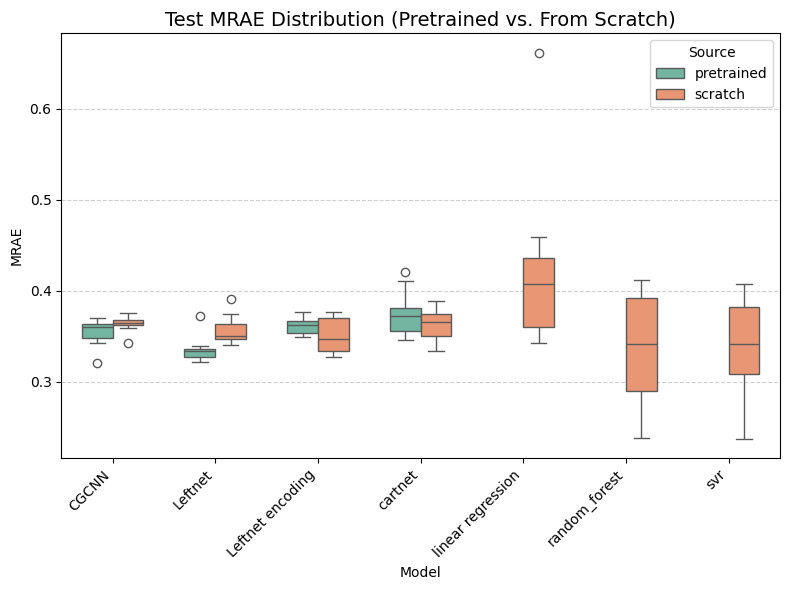

In [4]:
# Increase spacing between groups with two boxes using dodge=False and custom x-tick positions
plt.figure(figsize=(8, 6))

# Create the boxplot
ax = sns.boxplot(
    data=combined_mrae_df,
    x='Model',
    y='Score',
    hue='Source',
    palette='Set2',
    width=0.6
)

# Adjust spacing between categories manually
ax.set_xticks(range(len(combined_mrae_df['Model'].unique())))
ax.set_xticklabels(combined_mrae_df['Model'].unique(), rotation=45, ha='right')
plt.title('Test MRAE Distribution (Pretrained vs. From Scratch)', fontsize=14)
plt.ylabel('MRAE')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
# Save the plot as a PDF
plt.savefig('box_plot_mrae.pdf', bbox_inches='tight')
plt.show()


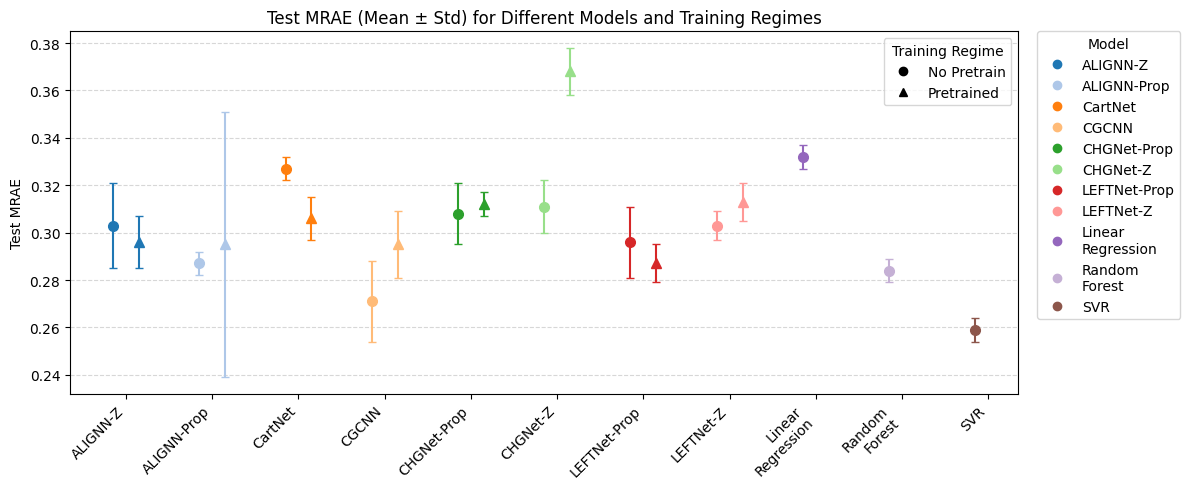

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# ------------------------------------------------------------
# 1. Data: Test MRAE mean ± std from your table
#    (alignn merged into alignn_z)
# ------------------------------------------------------------

data = [
    # No pretraining (fine-tuning only)
    ("alignn_z",         "no_pretrain", 0.303, 0.018),  # alignn → alignn_z
    ("alignn_prop",      "no_pretrain", 0.287, 0.005),
    ("cartnet",          "no_pretrain", 0.327, 0.005),
    ("cgcnn",            "no_pretrain", 0.271, 0.017),
    ("chgnet_z",         "no_pretrain", 0.311, 0.011),
    ("chgnet_prop",      "no_pretrain", 0.308, 0.013),
    ("leftnet_z",        "no_pretrain", 0.303, 0.006),
    ("leftnet_prop",     "no_pretrain", 0.296, 0.015),
    ("linear_regression","no_pretrain", 0.332, 0.005),
    ("random_forest",    "no_pretrain", 0.284, 0.005),
    ("svm",              "no_pretrain", 0.259, 0.005),

    # finetune100 (pretraining + fine-tuning)
    ("alignn_prop",      "pretrained",  0.295, 0.056),
    ("alignn_z",         "pretrained",  0.296, 0.011),
    ("cartnet",          "pretrained",  0.306, 0.009),
    ("cgcnn",            "pretrained",  0.295, 0.014),
    ("chgnet_prop",      "pretrained",  0.312, 0.005),
    ("chgnet_z",         "pretrained",  0.368, 0.010),
    ("leftnet_prop",     "pretrained",  0.287, 0.008),
    ("leftnet_z",        "pretrained",  0.313, 0.008),
]

df = pd.DataFrame(data, columns=["Model", "Setting", "Mean", "Std"])

# Nicely ordered models on x-axis
model_order = [
    "alignn_z", "alignn_prop",
    "cartnet", "cgcnn",
    "chgnet_prop", "chgnet_z",
    "leftnet_prop", "leftnet_z",
    "linear_regression", "random_forest", "svm",
]
df["Model"] = pd.Categorical(df["Model"], categories=model_order, ordered=True)

# Mapping: model → x-position
model_to_pos = {m: i for i, m in enumerate(model_order)}

# Pretty labels on x-axis
label_map = {
    "alignn_z": "ALIGNN-Z",
    "alignn_prop": "ALIGNN-Prop",
    "cartnet": "CartNet",
    "cgcnn": "CGCNN",
    # "chgnet": "CHGNet",
    "chgnet_prop": "CHGNet-Prop",
    "chgnet_z": "CHGNet-Z",
    # "leftnet": "LEFTNet",
    "leftnet_prop": "LEFTNet-Prop",
    "leftnet_z": "LEFTNet-Z",
    "linear_regression": "Linear\nRegression",
    "random_forest": "Random\nForest",
    "svm": "SVR",
}

# ------------------------------------------------------------
# 2. Plot: colour = model, marker = training setting, side-by-side
# ------------------------------------------------------------

plt.figure(figsize=(12, 5))

palette = sns.color_palette("tab20", len(model_order))
model_colors = {model: palette[i] for i, model in enumerate(model_order)}

marker_map = {
    "no_pretrain": "o",   # circle
    "pretrained": "^",    # triangle
}

offset = 0.15  # small horizontal separation between settings

for setting, shift in [("no_pretrain", -offset), ("pretrained", offset)]:
    subset = df[df["Setting"] == setting]
    x_pos = subset["Model"].map(model_to_pos).to_numpy().astype(float) + shift

    for (x, (_, row)) in zip(x_pos, subset.iterrows()):
        plt.errorbar(
            x,
            row["Mean"],
            yerr=row["Std"],
            fmt=marker_map[setting],
            markersize=7,
            capsize=3,
            color=model_colors[row["Model"]],
            linestyle="none",
        )

# X-axis ticks with nicer labels
xticks = list(range(len(model_order)))
xticklabels = [label_map[m] for m in model_order]
plt.xticks(xticks, xticklabels, rotation=45, ha="right")

plt.ylabel("Test MRAE")
plt.title("Test MRAE (Mean ± Std) for Different Models and Training Regimes")

plt.grid(axis="y", linestyle="--", alpha=0.5)

# ------------------------------------------------------------
# 3. Two legends: methods (colours) and training settings (shapes)
# ------------------------------------------------------------

# Legend for models (colours)
model_handles = [
    Line2D([0], [0], marker="o", color=model_colors[m], linestyle="none", label=label_map[m])
    for m in model_order
]

# Legend for training regime (shapes)
setting_handles = [
    Line2D([0], [0], marker=marker_map[s], color="black", linestyle="none",
           label="No Pretrain" if s == "no_pretrain" else "Pretrained")
    for s in ["no_pretrain", "pretrained"]
]

first_legend = plt.legend(handles=setting_handles, title="Training Regime",
                          loc="upper right")
plt.gca().add_artist(first_legend)  # keep it when adding second legend

plt.legend(handles=model_handles, title="Model",
           bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

plt.tight_layout()
plt.savefig("figs/test_mrae_comparison.pdf", bbox_inches="tight")
plt.show()
# save figure



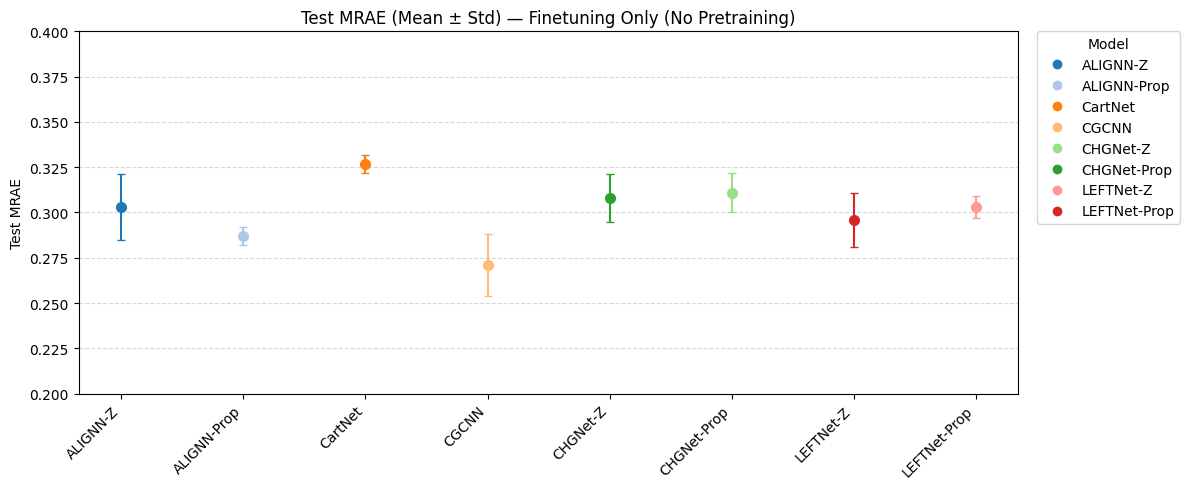

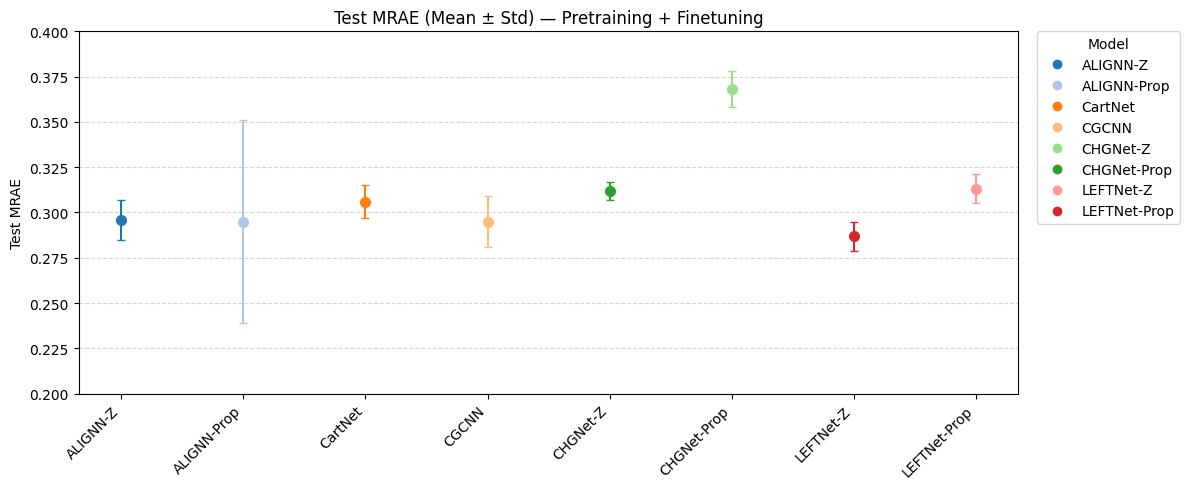

In [6]:
COLOR_MAP = {
    "alignn_z": "#1f77b4",
    "alignn_prop": "#aec7e8",
    "cartnet": "#ff7f0e",
    "cgcnn": "#ffbb78",
    "chgnet_prop": "#2ca02c",
    "chgnet_z": "#98df8a",
    "leftnet_prop": "#d62728",
    "leftnet_z": "#ff9896",
}

# Shared y-axis limits for BOTH figures (edit manually)
Y_LIM = (0.2, 0.4)


# ------------------------------------------------------------
# Plotting function
# ------------------------------------------------------------

def plot_single_setting(df_setting, filename, title_suffix):
    plt.figure(figsize=(12, 5))

    for _, row in df_setting.iterrows():
        m = str(row["Model"])
        x = model_to_pos[m]
        plt.errorbar(
            x,
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            markersize=7,
            capsize=3,
            color=COLOR_MAP[m],
            linestyle="none",
        )

    plot_order = [
    "alignn_z", "alignn_prop",
    "cartnet",
    "cgcnn",
    "chgnet_z", "chgnet_prop",
    "leftnet_z", "leftnet_prop",
]
    # model_to_pos = {m: i for i, m in enumerate(plot_order)}

    # X axis
    xticks = list(range(len(plot_order)))
    xticklabels = [label_map[m] for m in plot_order]
    plt.xticks(xticks, xticklabels, rotation=45, ha="right")

    # Y axis (shared)
    plt.ylim(*Y_LIM)
    plt.ylabel("Test MRAE")

    plt.title(f"Test MRAE (Mean ± Std) — {title_suffix}")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    # Legend (UNCHANGED logic)
    present_models = set(df_setting["Model"].astype(str).unique())
    model_handles = [
        Line2D(
            [0], [0],
            marker="o",
            linestyle="none",
            color=COLOR_MAP[m],
            label=label_map[m],
        )
        for m in plot_order if m in present_models
    ]

    plt.legend(
        handles=model_handles,
        title="Model",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        borderaxespad=0.,
    )

    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight")
    plt.show()
# Plot no_pretrain setting
df_no_pretrain = df[df["Setting"] == "no_pretrain"]
# remove svm, random_forest, linear_regression from no_pretrain plot
df_no_pretrain = df_no_pretrain[~df_no_pretrain["Model"].isin(["svm", "random_forest", "linear_regression"])]
plot_single_setting(df_no_pretrain, "figs/test_mrae_no_pretrain.pdf", "Finetuning Only (No Pretraining)")

# Plot pretrained setting
df_pretrained = df[df["Setting"] == "pretrained"]
# remove svm, random_forest, linear_regression from pretrained plot 
df_pretrained = df_pretrained[~df_pretrained["Model"].isin(["svm", "random_forest", "linear_regression"])]
plot_single_setting(df_pretrained, "figs/test_mrae_pretrained.pdf", "Pretraining + Finetuning")


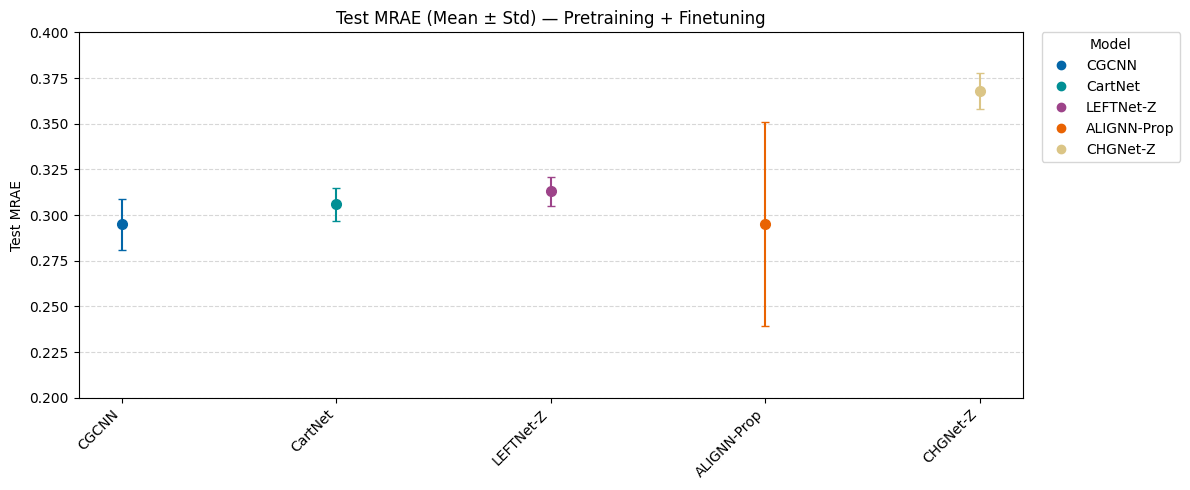

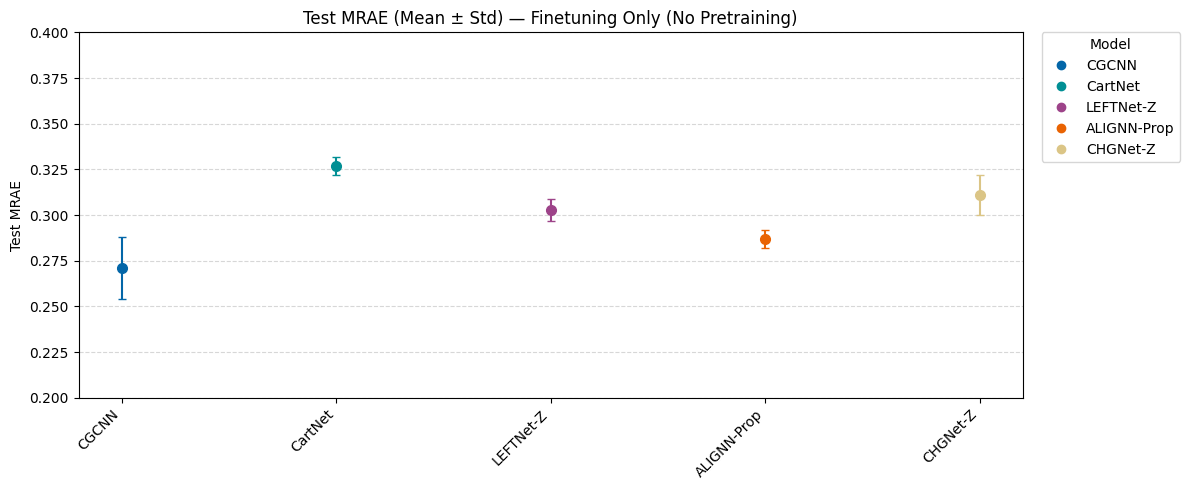

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from pathlib import Path

# df is assumed to be created from your provided data:
# df = pd.DataFrame(data, columns=["Model", "Setting", "Mean", "Std"])

# -----------------------------
# User controls
# -----------------------------
Path("figs").mkdir(parents=True, exist_ok=True)

plot_order = ["cgcnn", "cartnet", "leftnet_z", "alignn_prop", "chgnet_z"]
model_to_pos = {m: i for i, m in enumerate(plot_order)}

LABEL_MAP = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "leftnet_z": "LEFTNet-Z",
    "alignn_prop": "ALIGNN-Prop",
    "chgnet_z": "CHGNet-Z",
}

COLOR_MAP = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_prop": "#e96302",
    "chgnet_z": "#dbc586",
}

Y_LIM = (0.2, 0.4)  # shared y-axis for both figures (edit manually)

# -----------------------------
# Plotting function
# -----------------------------
def plot_single_setting(df_setting, filename, title_suffix):
    plt.figure(figsize=(12, 5))

    for _, row in df_setting.iterrows():
        m = str(row["Model"])
        if m not in model_to_pos:
            continue
        x = model_to_pos[m]
        plt.errorbar(
            x,
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            markersize=7,
            capsize=3,
            color=COLOR_MAP[m],
            linestyle="none",
        )

    xticks = list(range(len(plot_order)))
    xticklabels = [LABEL_MAP[m] for m in plot_order]
    plt.xticks(xticks, xticklabels, rotation=45, ha="right")

    plt.ylim(*Y_LIM)
    plt.ylabel("Test MRAE")
    plt.title(f"Test MRAE (Mean ± Std) — {title_suffix}")
    plt.grid(axis="y", linestyle="--", alpha=0.5)

    present = set(df_setting["Model"].astype(str).unique())
    handles = [
        Line2D([0], [0], marker="o", linestyle="none",
               color=COLOR_MAP[m], label=LABEL_MAP[m])
        for m in plot_order if m in present
    ]
    plt.legend(handles=handles, title="Model",
               bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0.)

    plt.tight_layout()
    plt.savefig(filename, bbox_inches="tight")
    plt.show()

# -----------------------------
# Prepare data (do not modify df)
# -----------------------------
df_subset = df[df["Model"].isin(plot_order)].copy()

df_no_pretrain = df_subset[df_subset["Setting"] == "no_pretrain"].copy()
df_pretrained = df_subset[df_subset["Setting"] == "pretrained"].copy()

# -----------------------------
# Two figures
# -----------------------------
plot_single_setting(
    df_pretrained,
    "figs/test_mrae_pretrained_subset.pdf",
    "Pretraining + Finetuning",
)

plot_single_setting(
    df_no_pretrain,
    "figs/test_mrae_no_pretrain_subset.pdf",
    "Finetuning Only (No Pretraining)",
)


next is the difference of MRAE of prop variant and Z variant of different methods. the data for cross validation, with pretrained is chosen as example.


[train_from_scratch] ΔMRAE (prop − Z) summary:
     Model      Mean       Std   N
0   ALIGNN -0.020325  0.017217  10
1   CHGNet -0.002739  0.018562  10
2  LEFTNet -0.007197  0.014255  10


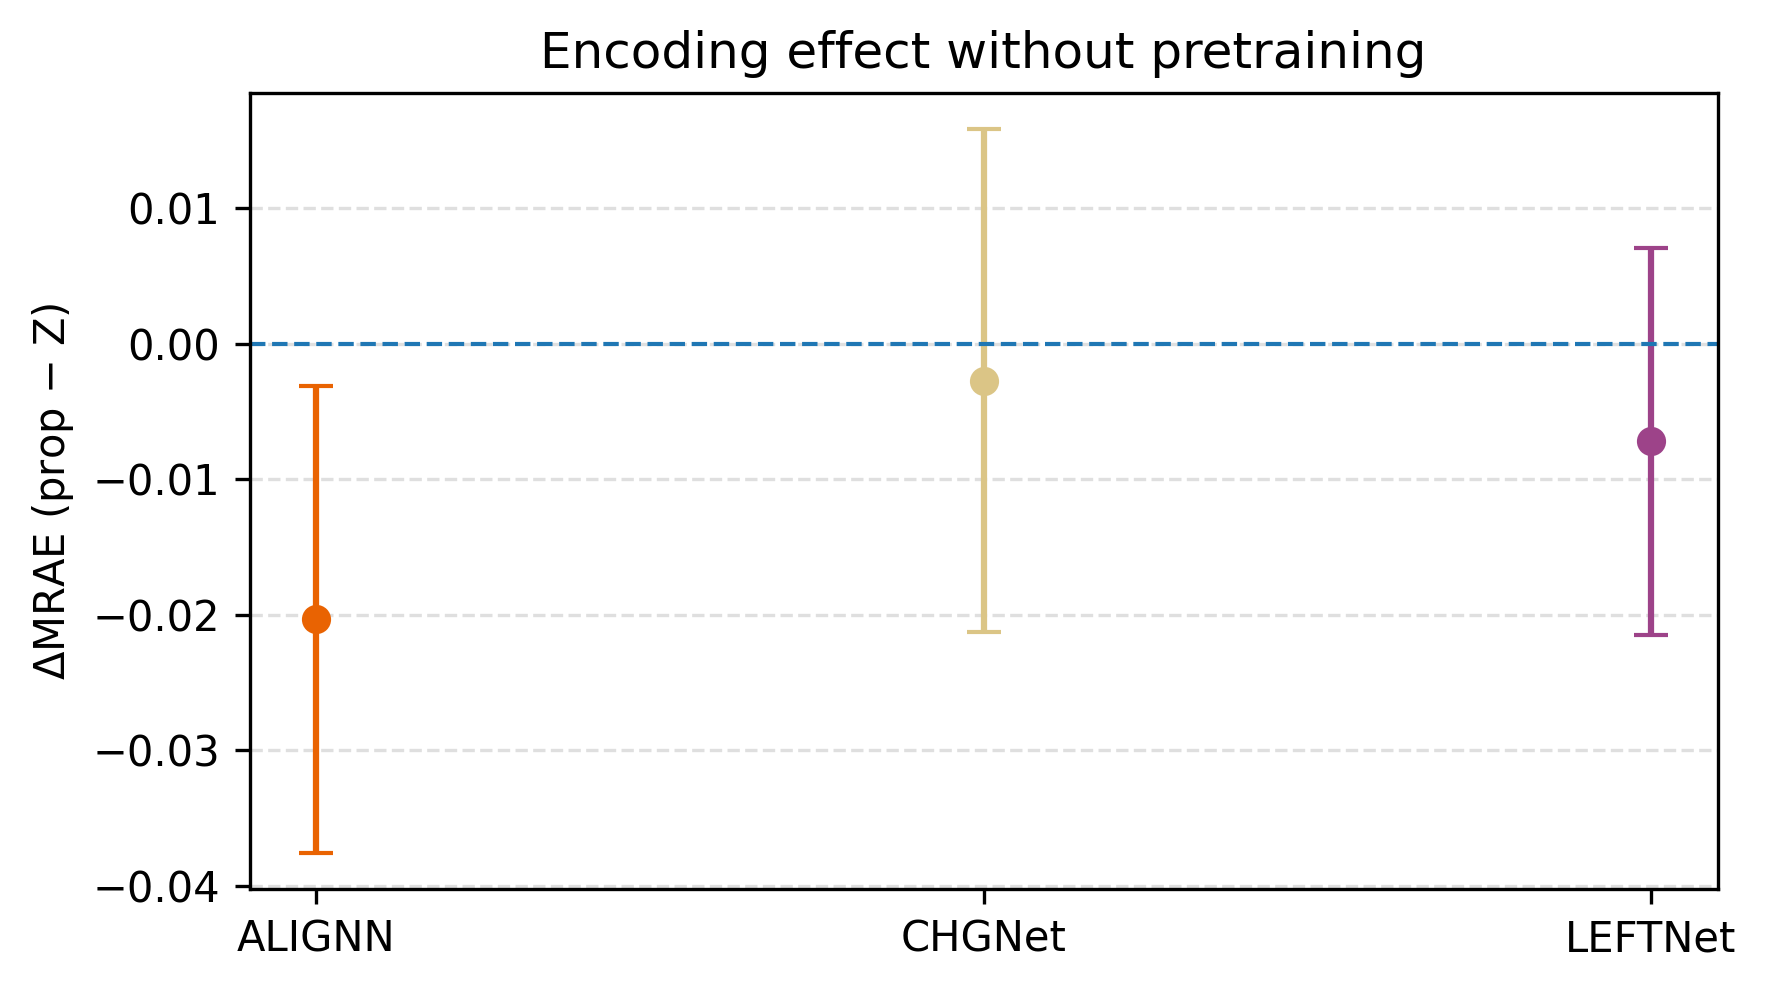

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CSV_PATH = "output/metrics_summary.csv"
OUTFILE = "figs/delta_mrae_pretrained_only.pdf"

FAMILIES = [
    ("ALIGNN",  "alignn_prop",  "alignn"),
    ("CHGNet",  "chgnet_prop",  "chgnet"),
    ("LEFTNet", "leftnet_prop", "leftnet_z"),
]

COLOR_MAP = {
    "ALIGNN":  "#e96302",  
    "CHGNet":  "#dbc586",  
    "LEFTNet": "#9d4389",  
}

def delta_series(df, split_dir, prop, z, metric="test_mre"):
    d = df[(df["split_dir"] == split_dir) & (df["method"].isin([prop, z]))].copy()

    # alignment key: fold_idx if present, else fold_token
    key = "fold_idx" if d["fold_idx"].notna().any() else "fold_token"

    piv = d.pivot_table(index=key, columns="method", values=metric, aggfunc="mean")
    if prop not in piv.columns or z not in piv.columns:
        return pd.Series(dtype=float)

    return (piv[prop] - piv[z]).dropna()


def plot_delta_for_split(df, split_dir, title, outfile):
    rows = []
    for name, prop, z in FAMILIES:
        delta = delta_series(df, split_dir, prop, z)
        rows.append((name, delta.mean(), delta.std(ddof=1), len(delta)))

    df_delta = pd.DataFrame(rows, columns=["Model", "Mean", "Std", "N"])
    print(f"\n[{split_dir}] ΔMRAE (prop − Z) summary:")
    print(df_delta)

    x = np.arange(len(df_delta))
    plt.figure(figsize=(6.0, 3.4), dpi=300)

    for i, row in df_delta.iterrows():
        plt.errorbar(
            x[i],
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=COLOR_MAP[row["Model"]],
        )

    plt.axhline(0.0, linestyle="--", linewidth=1)
    plt.xticks(x, df_delta["Model"])
    plt.ylabel(r"$\Delta$MRAE (prop − Z)")
    plt.title(title)
    plt.grid(axis="y", linestyle="--", alpha=0.4)

    plt.tight_layout()
    plt.savefig(outfile, bbox_inches="tight")
    plt.show()

df = pd.read_csv(CSV_PATH)

plot_delta_for_split(
    df,
    split_dir="train_from_scratch",
    title="Encoding effect without pretraining",
    outfile="figs/delta_mrae_train_from_scratch.pdf",
)

# plot_delta_for_split(
#     df,
#     split_dir="ood",
#     title="Encoding effect under feature OOD",
#     outfile="figs/delta_mrae_ood.pdf",
# )

# plot_delta_for_split(
#     df,
#     split_dir="category",
#     title="Encoding effect under category OOD",
#     outfile="figs/delta_mrae_category.pdf",
# )


Saved:
  figs/fig_transfer_3panel_mre.pdf
  figs/fig_transfer_3panel_mre.png
Panel (a) methods: ['cgcnn', 'cartnet', 'alignn_z', 'chgnet', 'leftnet_z']
Panel (a) values : [0.2953626811504364, 0.3948859572410583, 0.3924622237682342, 0.4683320224285126, 0.4888431131839752]
Panel (b) methods: ['cgcnn', 'cartnet', 'alignn_z', 'chgnet', 'leftnet_z']
Panel (b) counts : [10, 10, 10, 10, 10]
Panel (c) methods: ['cgcnn', 'cartnet', 'alignn_z', 'chgnet', 'leftnet_z']
Panel (c) counts : [10, 10, 10, 10, 10]


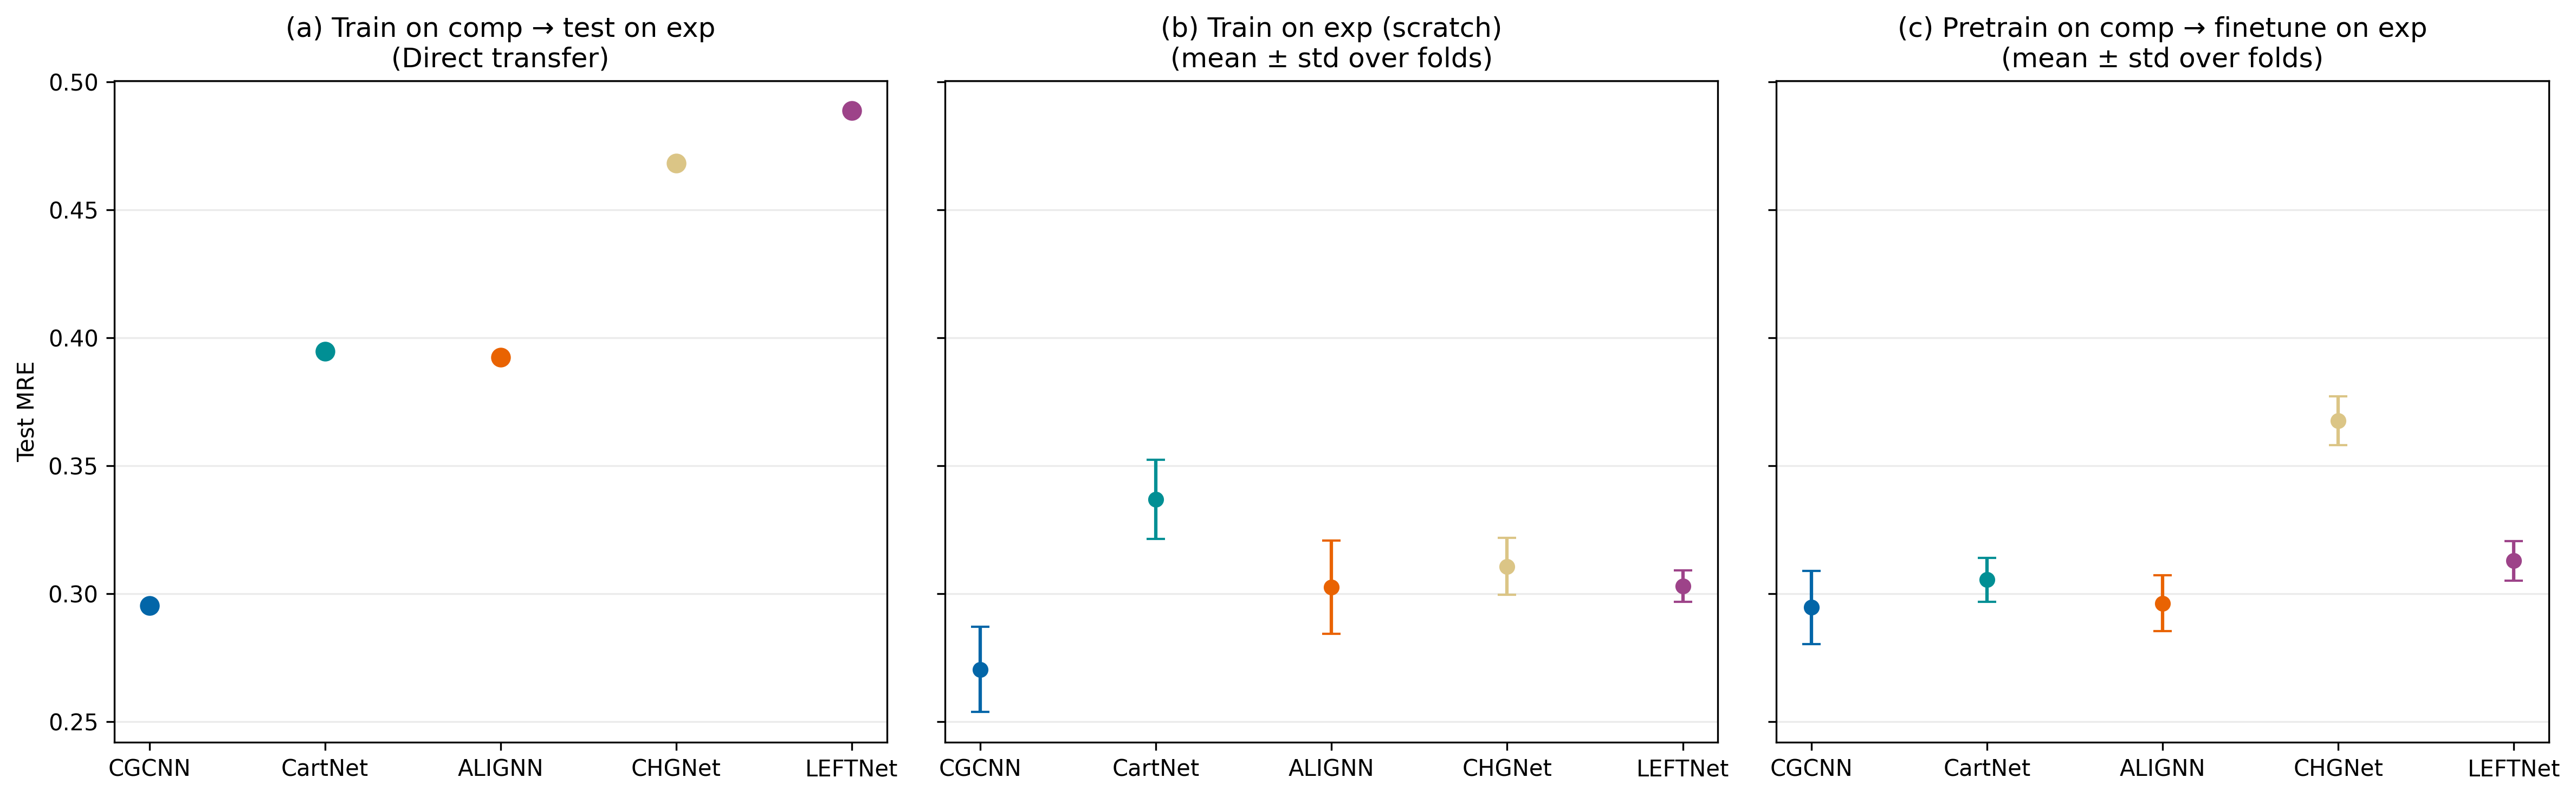

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------
# User settings
# -----------------------
PRETRAIN_SUMMARY = Path("output/pretrain/pretrain_eval_summary.csv")
METRICS_SUMMARY  = Path("output/metrics_summary.csv")

OUT_PDF = Path("figs/fig_transfer_3panel_mre.pdf")
OUT_PNG = Path("figs/fig_transfer_3panel_mre.png")
OUT_PDF.parent.mkdir(parents=True, exist_ok=True)

# Metric column name in your CSVs (change here if your files use a different name)
METRIC_COL = "test_mre"   # expected to exist in both PRETRAIN_SUMMARY and METRICS_SUMMARY

COLOR_MAP = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_z": "#e96302",
    "chgnet": "#dbc586",
}

# Canonical method order for consistent x-axis across panels
METHOD_ORDER = ["cgcnn", "cartnet", "alignn_z", "chgnet", "leftnet_z"]

XTICK_LABELS = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "alignn_z": "ALIGNN",
    "chgnet": "CHGNet",
    "leftnet_z": "LEFTNet",
}


# -----------------------
# Helpers
# -----------------------
def normalize_method(name: str) -> str | None:
    """
    Normalize various method name variants to canonical keys in COLOR_MAP.

    Rules:
      - chgnet may appear as 'chgnet_z' -> treat as 'chgnet'
      - alignn_z may appear as 'alignn' -> treat as 'alignn_z'
      - keep only canonical methods (COLOR_MAP keys)
      - drop *prop* variants and other suffixes not in scope
    """
    if not isinstance(name, str):
        return None
    s = name.lower().strip()

    # Drop obvious undesired feature variants
    if "prop" in s:
        return None

    # Remove common stage suffixes
    for suf in ["_pretrain", "_finetune", "_scratch"]:
        if s.endswith(suf):
            s = s[: -len(suf)]

    # Special alias handling
    if s == "alignn":
        s = "alignn_z"
    if s == "chgnet_z":
        s = "chgnet"

    return s if s in COLOR_MAP else None


def require_columns(df: pd.DataFrame, cols: list[str], df_name: str) -> None:
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(
            f"{df_name} is missing required columns: {missing}. "
            f"Available columns: {list(df.columns)}"
        )


def reindex_methods(df: pd.DataFrame, method_col: str, methods_all: list[str]) -> pd.DataFrame:
    """
    Reindex df to include all methods_all (preserves order); missing methods become NaN rows.
    """
    return df.set_index(method_col).reindex(methods_all).reset_index()


# -----------------------
# Load data
# -----------------------
df_pre = pd.read_csv(PRETRAIN_SUMMARY)
df_all = pd.read_csv(METRICS_SUMMARY)

require_columns(df_pre, ["run", METRIC_COL], "PRETRAIN_SUMMARY")
require_columns(df_all, ["split_dir", "method", METRIC_COL], "METRICS_SUMMARY")

# -----------------------
# Subfigure (a): trained on computational -> test on exp test set (direct transfer)
# -----------------------
p1 = df_pre.copy()
p1["method"] = p1["run"].map(normalize_method)
p1[METRIC_COL] = pd.to_numeric(p1[METRIC_COL], errors="coerce")
p1 = p1.dropna(subset=["method", METRIC_COL])

# If multiple runs collapse to same method, keep best (lowest MRE) to avoid duplicates
p1 = (p1.sort_values(METRIC_COL, ascending=True)
        .groupby("method", as_index=False)
        .first())

# Fix x-axis method order and keep missing methods as NaN
p1 = reindex_methods(p1, "method", METHOD_ORDER)

# -----------------------
# Subfigure (b): trained on exp set from scratch
#   ONLY use split_dir == "train_from_scratch"
# -----------------------
p2 = df_all[df_all["split_dir"].astype(str).eq("train_from_scratch")].copy()
p2["method"] = p2["method"].map(normalize_method)
p2[METRIC_COL] = pd.to_numeric(p2[METRIC_COL], errors="coerce")
p2 = p2.dropna(subset=["method", METRIC_COL])

p2g = (p2.groupby("method", dropna=False)
         .agg(test_mre_mean=(METRIC_COL, "mean"),
              test_mre_std=(METRIC_COL, "std"),
              n=(METRIC_COL, "count"))
         .reset_index())

p2g = reindex_methods(p2g, "method", METHOD_ORDER)

# -----------------------
# Subfigure (c): pretrained on comp -> finetune on exp -> test on exp test set
#   ONLY use split_dir == "finetune100"
# -----------------------
p3 = df_all[df_all["split_dir"].astype(str).eq("finetune100")].copy()
p3["method"] = p3["method"].map(normalize_method)
p3[METRIC_COL] = pd.to_numeric(p3[METRIC_COL], errors="coerce")
p3 = p3.dropna(subset=["method", METRIC_COL])

p3g = (p3.groupby("method", dropna=False)
         .agg(test_mre_mean=(METRIC_COL, "mean"),
              test_mre_std=(METRIC_COL, "std"),
              n=(METRIC_COL, "count"))
         .reset_index())

p3g = reindex_methods(p3g, "method", METHOD_ORDER)

# -----------------------
# Plot: 1x3 panels
# -----------------------
plt.close("all")
fig, axes = plt.subplots(1, 3, figsize=(16, 5), dpi=300, sharey=True)

ylab = "Test MRAE"

# (a) direct transfer — single-point scatter
ax = axes[0]
methods = METHOD_ORDER
x = np.arange(len(methods))
vals = p1[METRIC_COL].to_numpy()

for i, (m, v) in enumerate(zip(methods, vals)):
    if np.isfinite(v):
        ax.scatter(i, v, s=60, color=COLOR_MAP[m], zorder=3)

ax.set_xticks(x)
ax.set_xticklabels(
    [XTICK_LABELS[m] for m in methods],
    rotation=0,   # 你的截图是横着的
    ha="center"
)

ax.set_title("(a) Train on comp → test on exp\n(Direct transfer)")
ax.set_ylabel(ylab)
ax.grid(axis="y", alpha=0.25)
ax.set_axisbelow(True)

# (b) train from scratch — mean ± std
ax = axes[1]
methods = METHOD_ORDER
x = np.arange(len(methods))

for i, row in p2g.iterrows():
    m = row["method"]
    mean = row.get("test_mre_mean", np.nan)
    std = row.get("test_mre_std", np.nan)
    if isinstance(m, str) and m in COLOR_MAP and np.isfinite(mean):
        ax.errorbar(
            x=i,
            y=mean,
            yerr=std if np.isfinite(std) else None,
            fmt="o",
            capsize=4,
            linestyle="none",
            color=COLOR_MAP[m],
            markersize=6,
            zorder=3,
        )

ax.set_xticks(x)
ax.set_xticklabels(
    [XTICK_LABELS[m] for m in methods],
    rotation=0,   # 你的截图是横着的
    ha="center"
)

ax.set_title("(b) Train on exp (scratch)\n(mean ± std over folds)")
ax.grid(axis="y", alpha=0.25)
ax.set_axisbelow(True)

# (c) pretrain → finetune — mean ± std
ax = axes[2]
methods = METHOD_ORDER
x = np.arange(len(methods))

for i, row in p3g.iterrows():
    m = row["method"]
    mean = row.get("test_mre_mean", np.nan)
    std = row.get("test_mre_std", np.nan)
    if isinstance(m, str) and m in COLOR_MAP and np.isfinite(mean):
        ax.errorbar(
            x=i,
            y=mean,
            yerr=std if np.isfinite(std) else None,
            fmt="o",
            capsize=4,
            linestyle="none",
            color=COLOR_MAP[m],
            markersize=6,
            zorder=3,
        )

ax.set_xticks(x)
ax.set_xticklabels(
    [XTICK_LABELS[m] for m in methods],
    rotation=0,   # 你的截图是横着的
    ha="center"
)

ax.set_title("(c) Pretrain on comp → finetune on exp\n(mean ± std over folds)")
ax.grid(axis="y", alpha=0.25)
ax.set_axisbelow(True)

fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, bbox_inches="tight")

print(f"Saved:\n  {OUT_PDF}\n  {OUT_PNG}")

print("Panel (a) methods:", METHOD_ORDER)
print("Panel (a) values :", [None if not np.isfinite(v) else float(v) for v in vals])

print("Panel (b) methods:", METHOD_ORDER)
print("Panel (b) counts :", p2g["n"].tolist() if "n" in p2g.columns else None)

print("Panel (c) methods:", METHOD_ORDER)
print("Panel (c) counts :", p3g["n"].tolist() if "n" in p3g.columns else None)


We test the performance of model with and without pretrained trained on 100%, 50%, 25%, and 10% experimental dataset, and use the same test set for testing (fine_tune/test_data.json)

/tmp/ipykernel_2241784/1654714374.py:567: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.10, 1, 1])


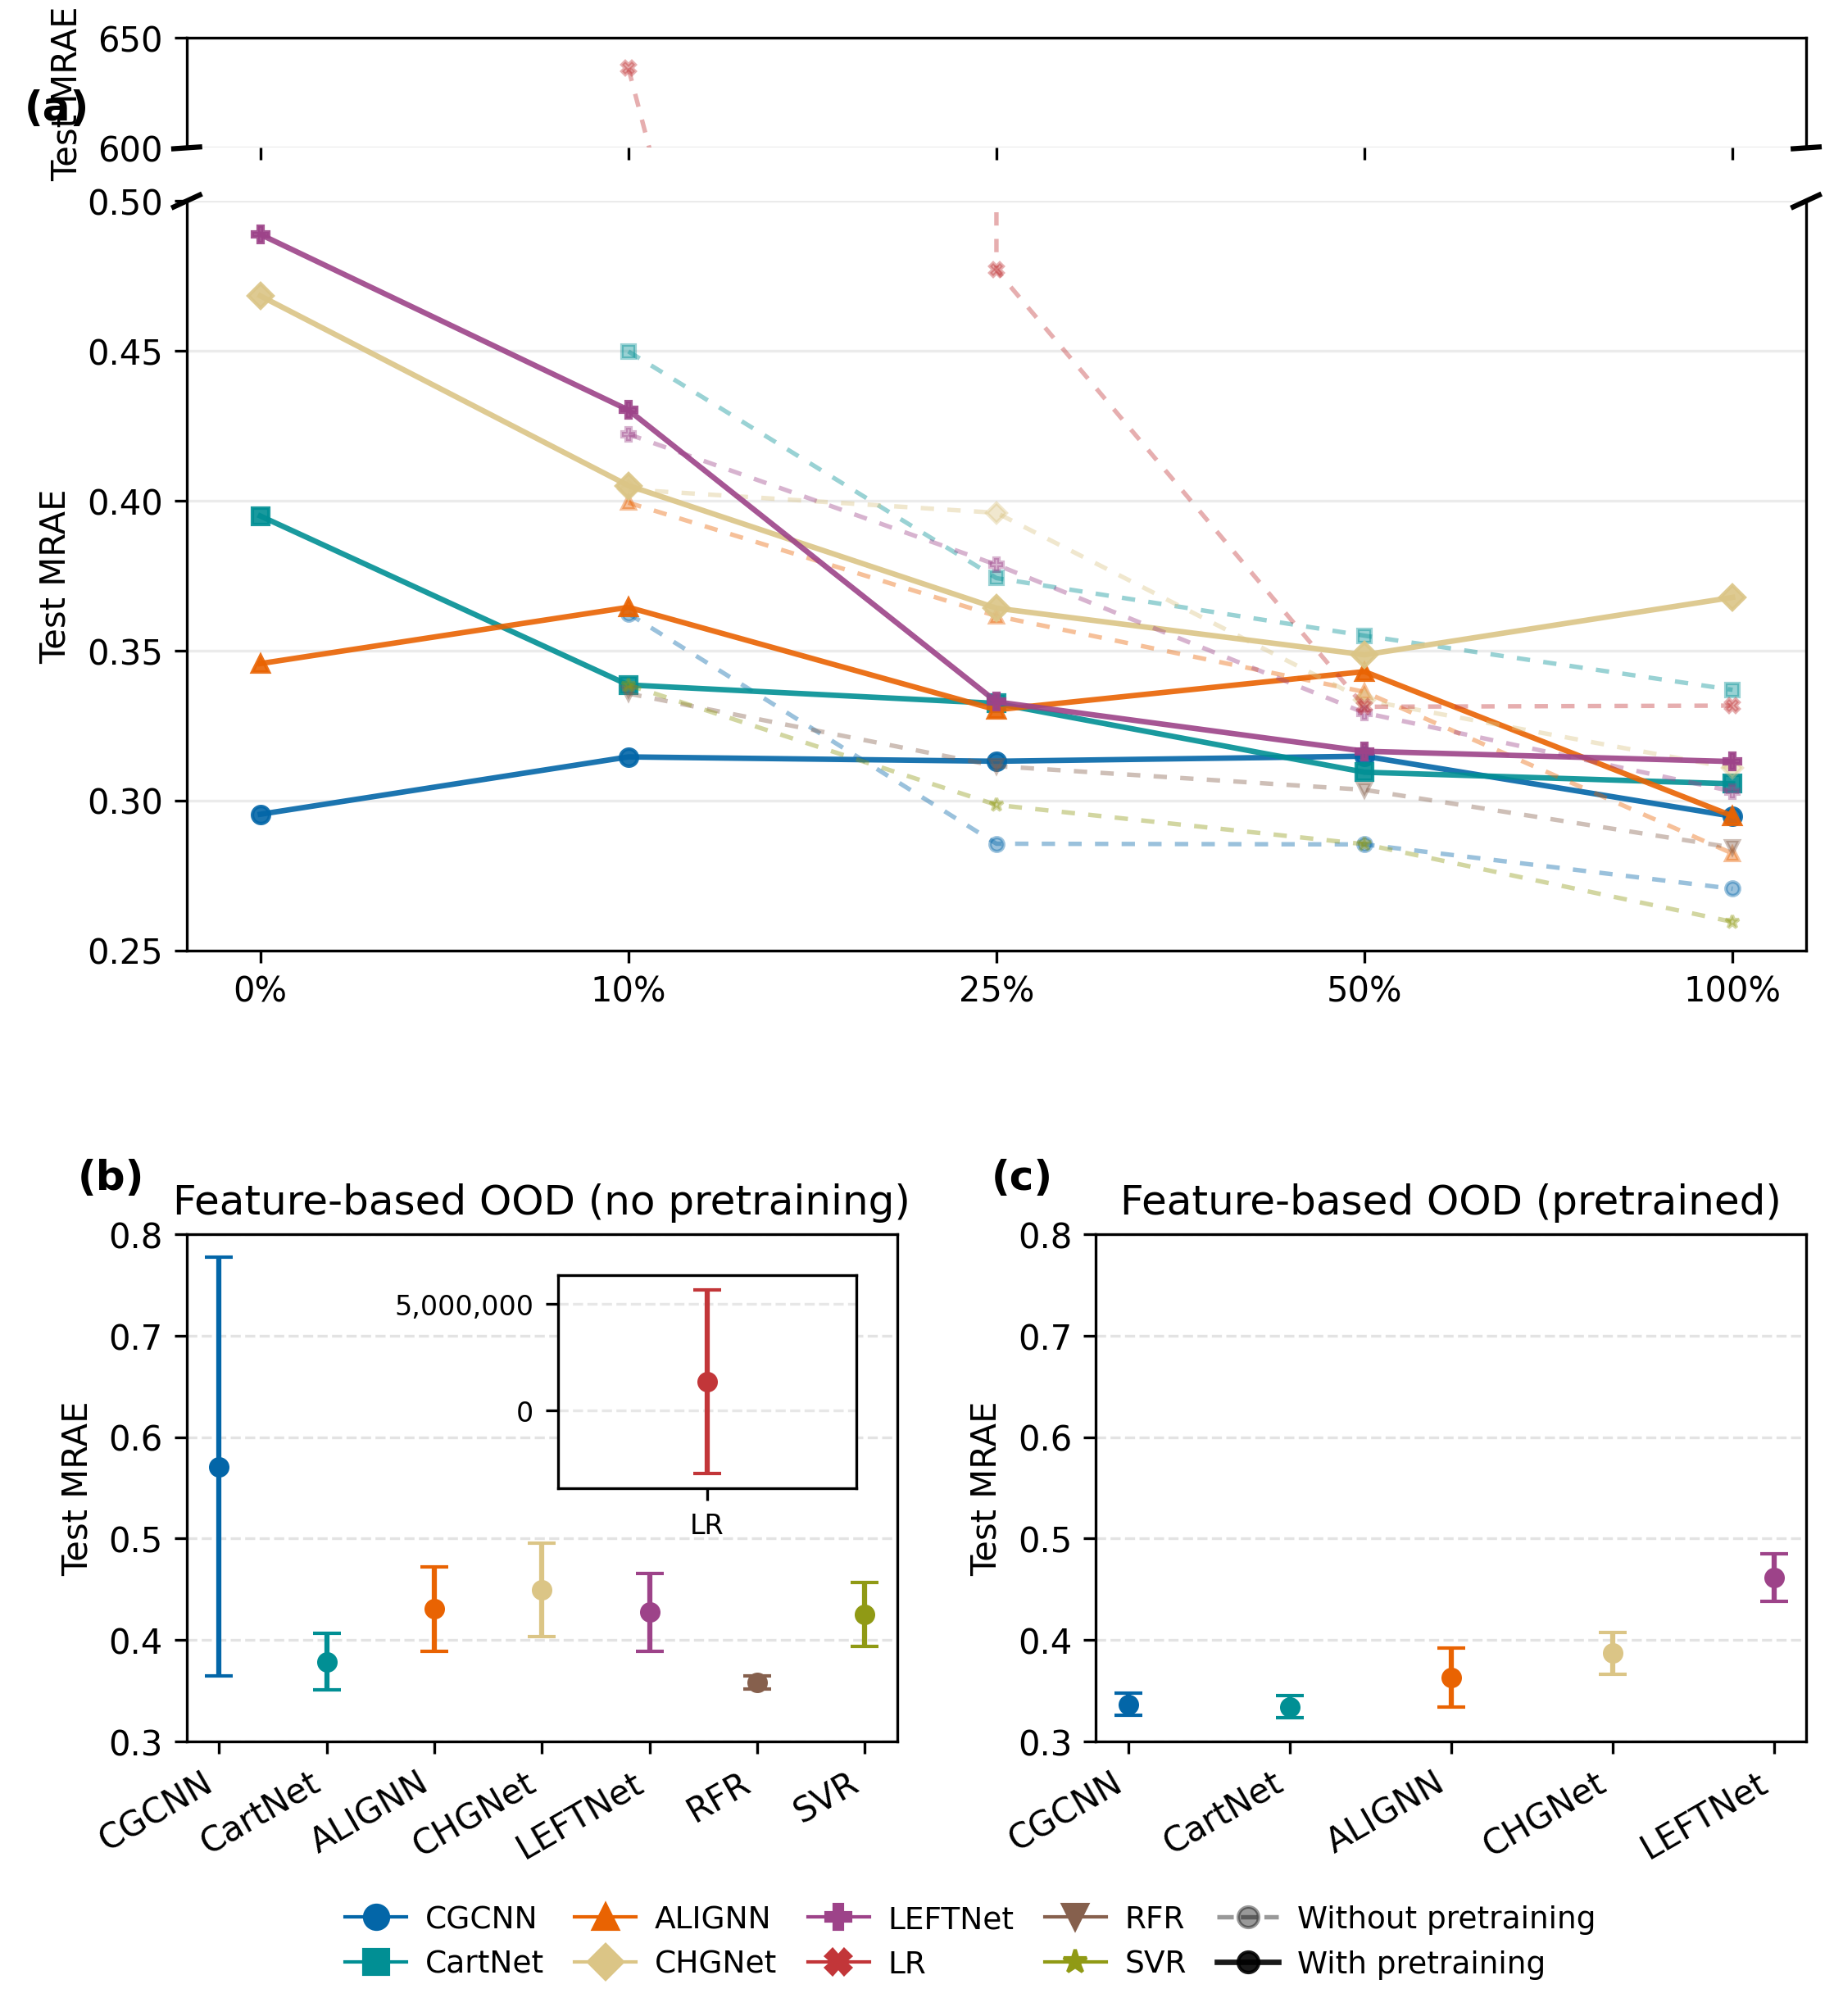

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import StrMethodFormatter

# -----------------------
# User settings
# -----------------------
PRETRAIN_SUMMARY = Path("output/pretrain/pretrain_eval_summary.csv")
METRICS_SUMMARY  = Path("output/metrics_summary.csv")

OUT_PDF = Path("figs/pretrain.pdf")
OUT_PNG = Path("figs/pretrain.png")
OUT_PDF.parent.mkdir(parents=True, exist_ok=True)

METRIC_COL = "test_mre"

# Methods that have pretraining/finetuning curves
PRETRAIN_METHODS = ["cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z"]

# Canonical method order (legend order)
METHOD_ORDER = [
    "cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z",
    "linear_regression", "random_forest", "svr"
]

METHOD_LABELS = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "alignn_prop": "ALIGNN",
    "chgnet": "CHGNet",
    "leftnet_z": "LEFTNet",
    "linear_regression": "LR",
    "random_forest": "RFR",
    "svr": "SVR",
}

XTICK_PCTS = [0, 10, 25, 50, 100]
XTICK_LABELS_PCT = [f"{p}%" for p in XTICK_PCTS]

# -----------------------
# Color/style control (edit here)
# -----------------------
BASE_COLOR = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_prop": "#e96302",
    "chgnet": "#dbc586",
    "linear_regression": "#c23639",
    "random_forest": "#86604d",
    "svr": "#909a15",
}

METHOD_MARKER = {
    "cgcnn": "o",
    "cartnet": "s",
    "alignn_prop": "^",
    "chgnet": "D",
    "leftnet_z": "P",
    "linear_regression": "X",
    "random_forest": "v",
    "svr": "*",
}

REGIME_STYLE = {
    "scratch":  {"alpha": 0.40, "linestyle": "--", "marker": "o", "linewidth": 1.3, "markersize": 4},
    "pretrain": {"alpha": 0.90, "linestyle": "-",  "marker": "o", "linewidth": 1.6, "markersize": 5},
}

SHOW_ERRORBARS = False
ERRORBAR_CAPSIZE = 3

# -----------------------
# Helpers
# -----------------------
def normalize_method(name: str) -> str | None:
    """
    Normalize method variants to canonical keys in BASE_COLOR.
    """
    if not isinstance(name, str):
        return None
    s = name.lower().strip()

    # Remove stage suffixes
    for suf in ["_pretrain", "_finetune", "_scratch"]:
        if s.endswith(suf):
            s = s[: -len(suf)]

    aliases = {
        # Important: alignn should map to alignn_prop (canonical)
        "alignn": "alignn_z",
        "alignn_prop": "alignn_prop",

        "leftnet": "leftnet_z",
        "leftnet_z": "leftnet_z",

        "chgnet_z": "chgnet",
        "chgnet": "chgnet",

        "cartnet_z": "cartnet",
        "cartnet": "cartnet",

        "linreg": "linear_regression",
        "linear": "linear_regression",
        "linearregression": "linear_regression",
        "linear_regression": "linear_regression",

        "rf": "random_forest",
        "randomforest": "random_forest",
        "random_forest": "random_forest",

        "svm": "svr",
        "svr": "svr",
    }
    s = aliases.get(s, s)

    return s if s in BASE_COLOR else None


def require_columns(df: pd.DataFrame, cols: list[str], df_name: str) -> None:
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(
            f"{df_name} is missing required columns: {missing}. "
            f"Available columns: {list(df.columns)}"
        )


def parse_split_dir_to_regime_pct(split_dir: str) -> tuple[str, int] | None:
    if not isinstance(split_dir, str):
        return None
    s = split_dir.strip()

    if s == "train_from_scratch":
        return ("scratch", 100)
    if s.startswith("train_from_scratch_"):
        tail = s.split("train_from_scratch_", 1)[1]
        if tail.isdigit():
            return ("scratch", int(tail))

    if s.startswith("finetune"):
        tail = s.split("finetune", 1)[1]
        if tail.isdigit():
            return ("pretrain", int(tail))

    return None


def reindex_methods(df: pd.DataFrame, method_col: str, methods_all: list[str]) -> pd.DataFrame:
    return df.set_index(method_col).reindex(methods_all).reset_index()


# -----------------------
# Load data
# -----------------------
df_pre = pd.read_csv(PRETRAIN_SUMMARY)
df_all = pd.read_csv(METRICS_SUMMARY)

require_columns(df_pre, ["run", METRIC_COL], "PRETRAIN_SUMMARY")
require_columns(df_all, ["split_dir", "method", METRIC_COL], "METRICS_SUMMARY")

# -----------------------
# Build (0%) pretrain point from PRETRAIN_SUMMARY
# -----------------------
p0 = df_pre.copy()
p0["method"] = p0["run"].map(normalize_method)
p0[METRIC_COL] = pd.to_numeric(p0[METRIC_COL], errors="coerce")
p0 = p0.dropna(subset=["method", METRIC_COL])

# multiple runs per method -> keep best (lowest MRE)
p0 = (p0.sort_values(METRIC_COL, ascending=True)
        .groupby("method", as_index=False)
        .first())

p0["regime"] = "pretrain"
p0["pct"] = 0
p0 = p0[["method", "regime", "pct", METRIC_COL]]
p0 = reindex_methods(p0, "method", PRETRAIN_METHODS)

# -----------------------
# Build scratch + finetune points from METRICS_SUMMARY
# -----------------------
tmp = df_all.copy()
tmp["method"] = tmp["method"].map(normalize_method)
tmp[METRIC_COL] = pd.to_numeric(tmp[METRIC_COL], errors="coerce")
tmp = tmp.dropna(subset=["method", METRIC_COL, "split_dir"])

parsed = tmp["split_dir"].astype(str).map(parse_split_dir_to_regime_pct)
tmp["regime"] = parsed.map(lambda x: x[0] if x is not None else None)
tmp["pct"]    = parsed.map(lambda x: x[1] if x is not None else np.nan)
tmp = tmp.dropna(subset=["regime", "pct"])
tmp["pct"] = tmp["pct"].astype(int)

tmp = tmp[tmp["pct"].isin([10, 25, 50, 100])].copy()

agg = (tmp.groupby(["method", "regime", "pct"], dropna=False)
         .agg(mre_mean=(METRIC_COL, "mean"),
              mre_std=(METRIC_COL, "std"),
              n=(METRIC_COL, "count"))
         .reset_index())

p0_for_merge = p0.rename(columns={METRIC_COL: "mre_mean"})
p0_for_merge["mre_std"] = np.nan
p0_for_merge["n"] = 1

all_pts = pd.concat([p0_for_merge, agg], ignore_index=True)
all_pts["method"] = pd.Categorical(all_pts["method"], categories=METHOD_ORDER, ordered=True)
all_pts = all_pts.sort_values(["method", "regime", "pct"])

# -----------------------
# Plot: layout = top broken-axis line plot, bottom two OOD panels
# -----------------------
plt.close("all")

fig = plt.figure(figsize=(8.5, 9.0), dpi=300)
gs = fig.add_gridspec(
    nrows=2, ncols=2,
    height_ratios=[1.8, 1.0],
    width_ratios=[1.0, 1.0],
    hspace=0.40, wspace=0.28
)

# --- broken axis for top panel
ax_top = fig.add_subplot(gs[0, :])
ax_bot = fig.add_subplot(gs[0, :], sharex=ax_top)

pos = ax_top.get_position()
gap = 0.012
top_frac = 0.15   # <-- you can tune this

bot_frac = 1 - top_frac

ax_top.set_position([pos.x0, pos.y0 + pos.height * bot_frac + gap, pos.width, pos.height * top_frac - gap])
ax_bot.set_position([pos.x0, pos.y0,                          pos.width, pos.height * bot_frac - gap])

# --- build legend handles (MUST be before plotting legends)
method_handles = []
for m in METHOD_ORDER:
    if m not in BASE_COLOR:
        continue
    method_handles.append(
        plt.Line2D(
            [0], [0],
            color=BASE_COLOR[m],
            lw=1,
            linestyle="-",
            marker=METHOD_MARKER.get(m, "o"),
            markersize=7,
            markerfacecolor=BASE_COLOR[m],
            markeredgecolor=BASE_COLOR[m],
            label=METHOD_LABELS.get(m, m),
        )
    )

regime_handles = [
    plt.Line2D([0], [0], color="black",
               alpha=REGIME_STYLE["scratch"]["alpha"],
               linestyle=REGIME_STYLE["scratch"]["linestyle"],
               marker=REGIME_STYLE["scratch"]["marker"],
               lw=REGIME_STYLE["scratch"]["linewidth"],
               label="Without pretraining"),
    plt.Line2D([0], [0], color="black",
               alpha=REGIME_STYLE["pretrain"]["alpha"],
               linestyle=REGIME_STYLE["pretrain"]["linestyle"],
               marker=REGIME_STYLE["pretrain"]["marker"],
               lw=REGIME_STYLE["pretrain"]["linewidth"],
               label="With pretraining"),
]

# --- plot curves onto both axes
for target_ax in (ax_top, ax_bot):
    target_ax.grid(axis="y", alpha=0.25)
    target_ax.set_axisbelow(True)
    target_ax.set_ylabel("Test MRAE")

    for m in METHOD_ORDER:
        m_df = all_pts[all_pts["method"] == m].copy()
        if m_df.empty:
            continue
        base_color = BASE_COLOR[m]

        for regime in ["scratch", "pretrain"]:
            r_df = m_df[m_df["regime"] == regime].copy()
            if r_df.empty:
                continue

            y = []
            yerr = []
            for pct in XTICK_PCTS:
                row = r_df[r_df["pct"] == pct]
                if len(row) == 0:
                    y.append(np.nan)
                    yerr.append(np.nan)
                else:
                    y.append(float(row["mre_mean"].iloc[0]))
                    yerr.append(float(row["mre_std"].iloc[0]) if np.isfinite(row["mre_std"].iloc[0]) else np.nan)

            style = REGIME_STYLE[regime]
            xs = np.arange(len(XTICK_PCTS))

            target_ax.plot(
                xs, y,
                color=base_color,
                alpha=style["alpha"],
                linestyle=(0, (3, 3)) if regime == "scratch" else "-",
                linewidth=style["linewidth"],
                marker=METHOD_MARKER.get(m, "o"),
                markersize=style["markersize"],
                zorder=3,
            )

            if SHOW_ERRORBARS:
                y = np.array(y, dtype=float)
                yerr = np.array(yerr, dtype=float)
                ok = np.isfinite(y) & np.isfinite(yerr)
                if ok.any():
                    target_ax.errorbar(
                        xs[ok], y[ok],
                        yerr=yerr[ok],
                        fmt="none",
                        ecolor=base_color,
                        alpha=style["alpha"],
                        capsize=ERRORBAR_CAPSIZE,
                        linewidth=1.0,
                        zorder=2,
                    )

# x ticks ONLY on bottom broken axis
ax_bot.set_xticks(range(len(XTICK_PCTS)))
ax_bot.set_xticklabels(XTICK_LABELS_PCT)

# y limits for broken axis
ax_bot.set_ylim(0.25, 0.50)
ax_top.set_ylim(600, 650)

# broken axis marks
ax_top.spines["bottom"].set_visible(False)
ax_bot.spines["top"].set_visible(False)
ax_top.tick_params(labelbottom=False)

d = .008
kwargs = dict(transform=ax_top.transAxes, color='k', clip_on=False)
ax_top.plot((-d, +d), (-d, +d), **kwargs)
ax_top.plot((1-d, 1+d), (-d, +d), **kwargs)
kwargs.update(transform=ax_bot.transAxes)
ax_bot.plot((-d, +d), (1-d, 1+d), **kwargs)
ax_bot.plot((1-d, 1+d), (1-d, 1+d), **kwargs)

# -----------------------
# Rebuild OOD summaries from ORIGINAL df_all (no keep_z_only)
# -----------------------
def agg_mean_std(df: pd.DataFrame, metric: str, group_col: str, order: list[str]) -> pd.DataFrame:
    out = (df.groupby(group_col)[metric]
             .agg(["mean", "std", "count"])
             .rename(columns={"mean": "Mean", "std": "Std", "count": "N"})
             .reset_index()
             .rename(columns={group_col: "Model"}))
    out["Model"] = pd.Categorical(out["Model"], categories=order, ordered=True)
    out = out.sort_values("Model").reset_index(drop=True)
    return out

def shared_ylim(a: pd.DataFrame, b: pd.DataFrame, pad: float = 0.08):
    vals = pd.concat([a["Mean"] + a["Std"].fillna(0), b["Mean"] + b["Std"].fillna(0)], ignore_index=True)
    vals = vals[np.isfinite(vals)]
    if len(vals) == 0:
        return None
    ymax = float(vals.max())
    return (0.0, ymax * (1 + pad))

df_ood = df_all.copy()
df_ood["method"] = df_ood["method"].map(normalize_method)
df_ood[METRIC_COL] = pd.to_numeric(df_ood[METRIC_COL], errors="coerce")
df_ood = df_ood.dropna(subset=["method", METRIC_COL, "split_dir"])

order_np = METHOD_ORDER
order_pt = PRETRAIN_METHODS

df_ood_np = df_ood[df_ood["split_dir"] == "ood_no_pretrain"].copy()
df_ood_pt = df_ood[df_ood["split_dir"] == "ood"].copy()

df_ood_np = df_ood_np[df_ood_np["method"].isin(order_np)].copy()
df_ood_pt = df_ood_pt[df_ood_pt["method"].isin(order_pt)].copy()

sum_ood_np_all = agg_mean_std(df_ood_np, METRIC_COL, "method", order_np)
sum_ood_pt = agg_mean_std(df_ood_pt, METRIC_COL, "method", order_pt)

# --- split LinearReg out of panel (b)
sum_lr_np = sum_ood_np_all[sum_ood_np_all["Model"].astype(str) == "linear_regression"].copy()
sum_ood_np = sum_ood_np_all[sum_ood_np_all["Model"].astype(str) != "linear_regression"].copy()

# keep your fixed ylim for the main OOD panels
ylim_ood = (0.3, 0.8)


# -----------------------
# Bottom panels
# -----------------------
ax11 = fig.add_subplot(gs[1, 0])
ax12 = fig.add_subplot(gs[1, 1])


def plot_errorbar_panel(
    ax,
    summary: pd.DataFrame,
    title: str,
    show_ylabel: bool = True,
    ylim=None,
    inset_summary: pd.DataFrame | None = None,
    inset_title: str = "Linear Regression",
    inset_loc: str = "upper right",
    inset_size: tuple[str, str] = ("42%", "42%"),
    inset_borderpad: float = 1.2,
    inset_pad: float = 0.08,   # padding around mean±std
):
    if summary.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    # ---- main panel (without LR)
    models = summary["Model"].astype(str).tolist()
    x = np.arange(len(models))

    for j, (_, row) in enumerate(summary.iterrows()):
        m = str(row["Model"])
        ax.errorbar(
            x[j],
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
            markersize=5,
            zorder=3,
        )


    ax.set_xticks(x)
    ax.set_xticklabels([METHOD_LABELS.get(m, m) for m in models], rotation=30, ha="right")
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Test MRAE" if show_ylabel else "")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    if ylim is not None:
        ax.set_ylim(*ylim)

    # ---- inset: LinearReg mean±std (same style, different y-scale)
    if inset_summary is not None and not inset_summary.empty:
        row = inset_summary.iloc[0]
        m = str(row["Model"])
        mu = float(row["Mean"])
        sd = float(row["Std"]) if np.isfinite(row["Std"]) else 0.0

        axins = inset_axes(
            ax,
            width=inset_size[0],
            height=inset_size[1],
            loc=inset_loc,
            borderpad=inset_borderpad,
        )

        # single point at x=0 with same errorbar style
        axins.errorbar(
            0,
            mu,
            yerr=sd,
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
            markersize=5,
            zorder=3,
        )

        axins.set_xticks([0])
        axins.set_xticklabels([METHOD_LABELS.get(m, m)])
        # axins.set_title(inset_title, fontsize=9)
        # axins.set_ylabel("Test MRAE", fontsize=8)
        axins.set_xlabel("", fontsize=8)
        axins.tick_params(labelsize=8)
        axins.grid(axis="y", linestyle="--", alpha=0.30)

        # ---- y-limits: MUST include the full errorbar
        lo = mu - sd
        hi = mu + sd

        # if sd is NaN or 0, still give a visible range
        if not np.isfinite(lo) or not np.isfinite(hi) or hi <= lo:
            lo = mu * 0.9
            hi = mu * 1.1 if mu != 0 else 1.0

        # padding in absolute scale
        rng = hi - lo
        y0 = lo - inset_pad * rng
        y1 = hi + inset_pad * rng

        # clamp at 0 if you want (MRE >= 0)
        # y0 = max(0.0, y0)

        axins.set_ylim(y0, y1)

        # ---- turn OFF scientific notation & offsets, use plain numbers
        axins.ticklabel_format(axis="y", style="plain", useOffset=False)
        axins.yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))

plot_errorbar_panel(
    ax11, sum_ood_np,
    "Feature-based OOD (no pretraining)",
    show_ylabel=True, ylim=ylim_ood,
    inset_summary=sum_lr_np,
    inset_title="Linear Regression",
)

plot_errorbar_panel(
    ax12, sum_ood_pt,
    "Feature-based OOD (pretrained)",
    show_ylabel=True, ylim=ylim_ood,
)

# -----------------------
# Remove any axis-level legends (important!)
# -----------------------
for a in [ax_top, ax_bot, ax11, ax12]:
    leg = a.get_legend()
    if leg is not None:
        leg.remove()

# -----------------------
# Global legend (bottom)
# -----------------------
all_handles = method_handles + regime_handles
all_labels = [h.get_label() for h in all_handles]

fig.legend(
    handles=all_handles,
    labels=all_labels,
    loc="lower center",
    ncol=5,
    frameon=False,
    fontsize=9,
    handlelength=2.0,
    handletextpad=0.6,
    columnspacing=1.0,
    bbox_to_anchor=(0.5, -0.01),
)

# panel labels (a)(b)(c)
for a, lab in zip([ax_bot, ax11, ax12], ["(a)", "(b)", "(c)"]):
    a.text(
        -0.06, 1.15, lab,
        transform=a.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )



# -----------------------
# Save
# -----------------------
fig.tight_layout(rect=[0, 0.10, 1, 1])
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, bbox_inches="tight")


/tmp/ipykernel_2548261/2743528644.py:439: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.10, 1, 1])


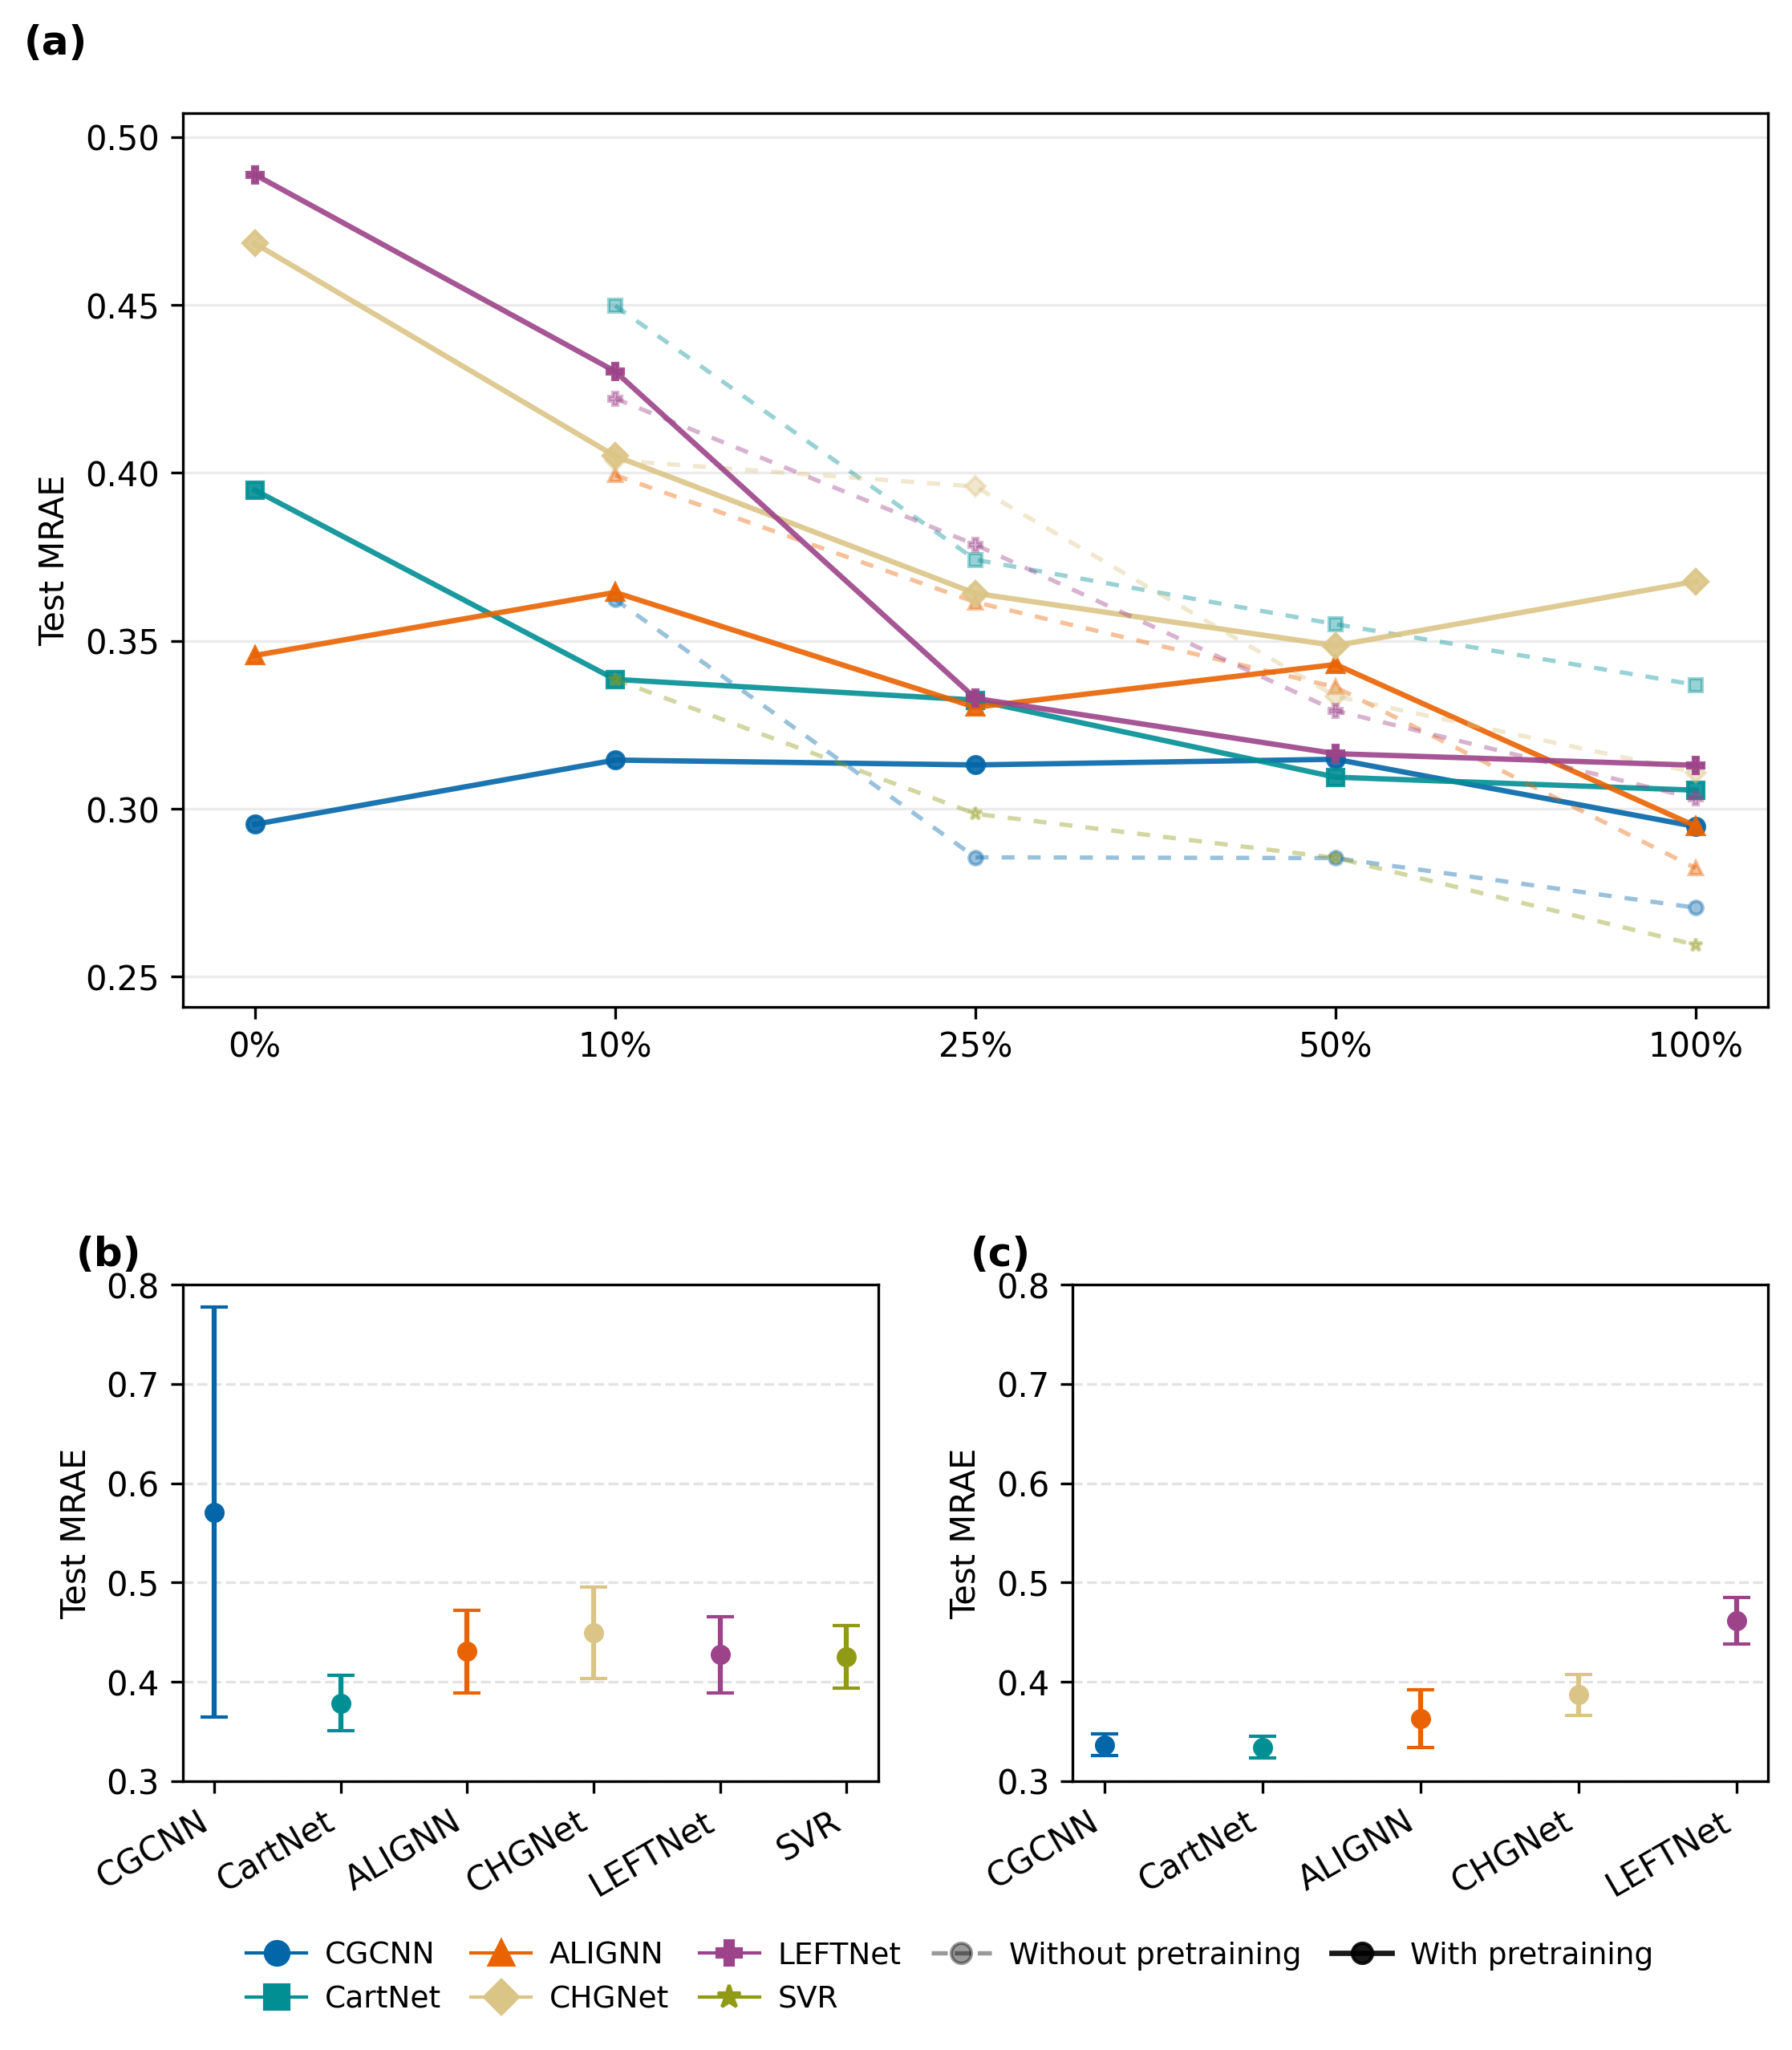

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# -----------------------
# User settings
# -----------------------
PRETRAIN_SUMMARY = Path("output/pretrain/pretrain_eval_summary.csv")
METRICS_SUMMARY  = Path("output/metrics_summary.csv")

OUT_PDF = Path("figs/pretrain.pdf")
OUT_PNG = Path("figs/pretrain.png")
OUT_PDF.parent.mkdir(parents=True, exist_ok=True)

METRIC_COL = "test_mre"

# Methods that have pretraining/finetuning curves
PRETRAIN_METHODS = ["cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z"]

# Canonical method order (legend order)  ---- removed LR + RF
METHOD_ORDER = [
    "cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z",
    "svr"
]

METHOD_LABELS = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "alignn_prop": "ALIGNN",
    "chgnet": "CHGNet",
    "leftnet_z": "LEFTNet",
    "svr": "SVR",
}

XTICK_PCTS = [0, 10, 25, 50, 100]
XTICK_LABELS_PCT = [f"{p}%" for p in XTICK_PCTS]

# -----------------------
# Color/style control (edit here)
# -----------------------
BASE_COLOR = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_prop": "#e96302",
    "chgnet": "#dbc586",
    "svr": "#909a15",
}

METHOD_MARKER = {
    "cgcnn": "o",
    "cartnet": "s",
    "alignn_prop": "^",
    "chgnet": "D",
    "leftnet_z": "P",
    "svr": "*",
}

REGIME_STYLE = {
    "scratch":  {"alpha": 0.40, "linestyle": "--", "marker": "o", "linewidth": 1.3, "markersize": 4},
    "pretrain": {"alpha": 0.90, "linestyle": "-",  "marker": "o", "linewidth": 1.6, "markersize": 5},
}

SHOW_ERRORBARS = False
ERRORBAR_CAPSIZE = 3

# -----------------------
# Helpers
# -----------------------
def normalize_method(name: str) -> str | None:
    if not isinstance(name, str):
        return None
    s = name.lower().strip()

    for suf in ["_pretrain", "_finetune", "_scratch"]:
        if s.endswith(suf):
            s = s[: -len(suf)]

    aliases = {
        "alignn": "alignn_z",         # if your csv uses this; otherwise ignore
        "alignn_prop": "alignn_prop",

        "leftnet": "leftnet_z",
        "leftnet_z": "leftnet_z",

        "chgnet_z": "chgnet",
        "chgnet": "chgnet",

        "cartnet_z": "cartnet",
        "cartnet": "cartnet",

        # keep these mappings harmlessly; they will be filtered out by METHOD_ORDER
        "linreg": "linear_regression",
        "linear": "linear_regression",
        "linearregression": "linear_regression",
        "linear_regression": "linear_regression",

        "rf": "random_forest",
        "randomforest": "random_forest",
        "random_forest": "random_forest",

        "svm": "svr",
        "svr": "svr",
    }
    s = aliases.get(s, s)

    # Only keep methods we actually plot (and have a color)
    return s if s in BASE_COLOR else None


def require_columns(df: pd.DataFrame, cols: list[str], df_name: str) -> None:
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(
            f"{df_name} is missing required columns: {missing}. "
            f"Available columns: {list(df.columns)}"
        )


def parse_split_dir_to_regime_pct(split_dir: str) -> tuple[str, int] | None:
    if not isinstance(split_dir, str):
        return None
    s = split_dir.strip()

    if s == "train_from_scratch":
        return ("scratch", 100)
    if s.startswith("train_from_scratch_"):
        tail = s.split("train_from_scratch_", 1)[1]
        if tail.isdigit():
            return ("scratch", int(tail))

    if s.startswith("finetune"):
        tail = s.split("finetune", 1)[1]
        if tail.isdigit():
            return ("pretrain", int(tail))

    return None


def reindex_methods(df: pd.DataFrame, method_col: str, methods_all: list[str]) -> pd.DataFrame:
    return df.set_index(method_col).reindex(methods_all).reset_index()


# -----------------------
# Load data
# -----------------------
df_pre = pd.read_csv(PRETRAIN_SUMMARY)
df_all = pd.read_csv(METRICS_SUMMARY)

require_columns(df_pre, ["run", METRIC_COL], "PRETRAIN_SUMMARY")
require_columns(df_all, ["split_dir", "method", METRIC_COL], "METRICS_SUMMARY")

# -----------------------
# Build (0%) pretrain point from PRETRAIN_SUMMARY
# -----------------------
p0 = df_pre.copy()
p0["method"] = p0["run"].map(normalize_method)
p0[METRIC_COL] = pd.to_numeric(p0[METRIC_COL], errors="coerce")
p0 = p0.dropna(subset=["method", METRIC_COL])

# keep best (lowest)
p0 = (p0.sort_values(METRIC_COL, ascending=True)
        .groupby("method", as_index=False)
        .first())

p0["regime"] = "pretrain"
p0["pct"] = 0
p0 = p0[["method", "regime", "pct", METRIC_COL]]
p0 = reindex_methods(p0, "method", PRETRAIN_METHODS)

# -----------------------
# Build scratch + finetune points from METRICS_SUMMARY
# -----------------------
tmp = df_all.copy()
tmp["method"] = tmp["method"].map(normalize_method)
tmp[METRIC_COL] = pd.to_numeric(tmp[METRIC_COL], errors="coerce")
tmp = tmp.dropna(subset=["method", METRIC_COL, "split_dir"])

parsed = tmp["split_dir"].astype(str).map(parse_split_dir_to_regime_pct)
tmp["regime"] = parsed.map(lambda x: x[0] if x is not None else None)
tmp["pct"]    = parsed.map(lambda x: x[1] if x is not None else np.nan)
tmp = tmp.dropna(subset=["regime", "pct"])
tmp["pct"] = tmp["pct"].astype(int)

tmp = tmp[tmp["pct"].isin([10, 25, 50, 100])].copy()

agg = (tmp.groupby(["method", "regime", "pct"], dropna=False)
         .agg(mre_mean=(METRIC_COL, "mean"),
              mre_std=(METRIC_COL, "std"),
              n=(METRIC_COL, "count"))
         .reset_index())

p0_for_merge = p0.rename(columns={METRIC_COL: "mre_mean"})
p0_for_merge["mre_std"] = np.nan
p0_for_merge["n"] = 1

all_pts = pd.concat([p0_for_merge, agg], ignore_index=True)
all_pts["method"] = pd.Categorical(all_pts["method"], categories=METHOD_ORDER, ordered=True)
all_pts = all_pts.sort_values(["method", "regime", "pct"])

# -----------------------
# Plot layout: top line plot (single axis), bottom two OOD panels
# -----------------------
plt.close("all")

fig = plt.figure(figsize=(8.5, 9.0), dpi=300)
gs = fig.add_gridspec(
    nrows=2, ncols=2,
    height_ratios=[1.8, 1.0],
    width_ratios=[1.0, 1.0],
    hspace=0.40, wspace=0.28
)

ax_top = fig.add_subplot(gs[0, :])

# --- legend handles
method_handles = []
for m in METHOD_ORDER:
    if m not in BASE_COLOR:
        continue
    method_handles.append(
        plt.Line2D(
            [0], [0],
            color=BASE_COLOR[m],
            lw=1,
            linestyle="-",
            marker=METHOD_MARKER.get(m, "o"),
            markersize=7,
            markerfacecolor=BASE_COLOR[m],
            markeredgecolor=BASE_COLOR[m],
            label=METHOD_LABELS.get(m, m),
        )
    )

regime_handles = [
    plt.Line2D([0], [0], color="black",
               alpha=REGIME_STYLE["scratch"]["alpha"],
               linestyle=REGIME_STYLE["scratch"]["linestyle"],
               marker=REGIME_STYLE["scratch"]["marker"],
               lw=REGIME_STYLE["scratch"]["linewidth"],
               label="Without pretraining"),
    plt.Line2D([0], [0], color="black",
               alpha=REGIME_STYLE["pretrain"]["alpha"],
               linestyle=REGIME_STYLE["pretrain"]["linestyle"],
               marker=REGIME_STYLE["pretrain"]["marker"],
               lw=REGIME_STYLE["pretrain"]["linewidth"],
               label="With pretraining"),
]

# --- plot curves
ax_top.grid(axis="y", alpha=0.25)
ax_top.set_axisbelow(True)
ax_top.set_ylabel("Test MRAE")

xs = np.arange(len(XTICK_PCTS))
for m in METHOD_ORDER:
    m_df = all_pts[all_pts["method"] == m].copy()
    if m_df.empty:
        continue
    base_color = BASE_COLOR[m]

    for regime in ["scratch", "pretrain"]:
        r_df = m_df[m_df["regime"] == regime].copy()
        if r_df.empty:
            continue

        y = []
        yerr = []
        for pct in XTICK_PCTS:
            row = r_df[r_df["pct"] == pct]
            if len(row) == 0:
                y.append(np.nan)
                yerr.append(np.nan)
            else:
                y.append(float(row["mre_mean"].iloc[0]))
                yerr.append(float(row["mre_std"].iloc[0]) if np.isfinite(row["mre_std"].iloc[0]) else np.nan)

        style = REGIME_STYLE[regime]
        ax_top.plot(
            xs, y,
            color=base_color,
            alpha=style["alpha"],
            linestyle=(0, (3, 3)) if regime == "scratch" else "-",
            linewidth=style["linewidth"],
            marker=METHOD_MARKER.get(m, "o"),
            markersize=style["markersize"],
            zorder=3,
        )

        if SHOW_ERRORBARS:
            y = np.array(y, dtype=float)
            yerr = np.array(yerr, dtype=float)
            ok = np.isfinite(y) & np.isfinite(yerr)
            if ok.any():
                ax_top.errorbar(
                    xs[ok], y[ok],
                    yerr=yerr[ok],
                    fmt="none",
                    ecolor=base_color,
                    alpha=style["alpha"],
                    capsize=ERRORBAR_CAPSIZE,
                    linewidth=1.0,
                    zorder=2,
                )

ax_top.set_xticks(xs)
ax_top.set_xticklabels(XTICK_LABELS_PCT)

# Optional: set y-limits automatically with padding
vals_for_ylim = all_pts["mre_mean"].astype(float).values
vals_for_ylim = vals_for_ylim[np.isfinite(vals_for_ylim)]
if vals_for_ylim.size:
    lo = float(np.nanmin(vals_for_ylim))
    hi = float(np.nanmax(vals_for_ylim))
    pad = 0.08 * (hi - lo) if hi > lo else 0.05 * max(hi, 1.0)
    ax_top.set_ylim(max(0.0, lo - pad), hi + pad)

# -----------------------
# Bottom OOD summaries
# -----------------------
def agg_mean_std(df: pd.DataFrame, metric: str, group_col: str, order: list[str]) -> pd.DataFrame:
    out = (df.groupby(group_col)[metric]
             .agg(["mean", "std", "count"])
             .rename(columns={"mean": "Mean", "std": "Std", "count": "N"})
             .reset_index()
             .rename(columns={group_col: "Model"}))
    out["Model"] = pd.Categorical(out["Model"], categories=order, ordered=True)
    out = out.sort_values("Model").reset_index(drop=True)
    return out

df_ood = df_all.copy()
df_ood["method"] = df_ood["method"].map(normalize_method)
df_ood[METRIC_COL] = pd.to_numeric(df_ood[METRIC_COL], errors="coerce")
df_ood = df_ood.dropna(subset=["method", METRIC_COL, "split_dir"])

order_np = METHOD_ORDER
order_pt = PRETRAIN_METHODS

df_ood_np = df_ood[df_ood["split_dir"] == "ood_no_pretrain"].copy()
df_ood_pt = df_ood[df_ood["split_dir"] == "ood"].copy()

df_ood_np = df_ood_np[df_ood_np["method"].isin(order_np)].copy()
df_ood_pt = df_ood_pt[df_ood_pt["method"].isin(order_pt)].copy()

sum_ood_np = agg_mean_std(df_ood_np, METRIC_COL, "method", order_np)
sum_ood_pt = agg_mean_std(df_ood_pt, METRIC_COL, "method", order_pt)

# bottom panels
ax11 = fig.add_subplot(gs[1, 0])
ax12 = fig.add_subplot(gs[1, 1])

def plot_errorbar_panel(ax, summary: pd.DataFrame, title: str, show_ylabel: bool = True, ylim=None):
    if summary.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    models = summary["Model"].astype(str).tolist()
    x = np.arange(len(models))

    for j, (_, row) in enumerate(summary.iterrows()):
        m = str(row["Model"])
        ax.errorbar(
            x[j],
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
            markersize=5,
            zorder=3,
        )

    ax.set_xticks(x)
    ax.set_xticklabels([METHOD_LABELS.get(m, m) for m in models], rotation=30, ha="right")
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Test MRAE" if show_ylabel else "")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    if ylim is not None:
        ax.set_ylim(*ylim)

# keep your fixed ylim if you want
ylim_ood = (0.3, 0.8)

plot_errorbar_panel(
    ax11, sum_ood_np,
    " ",
    show_ylabel=True, ylim=ylim_ood,
)
plot_errorbar_panel(
    ax12, sum_ood_pt,
    " ",
    show_ylabel=True, ylim=ylim_ood,
)

# -----------------------
# Remove any axis legends
# -----------------------
for a in [ax_top, ax11, ax12]:
    leg = a.get_legend()
    if leg is not None:
        leg.remove()

# -----------------------
# Global legend (bottom)
# -----------------------
all_handles = method_handles + regime_handles
all_labels = [h.get_label() for h in all_handles]

fig.legend(
    handles=all_handles,
    labels=all_labels,
    loc="lower center",
    ncol=5,
    frameon=False,
    fontsize=9,
    handlelength=2.0,
    handletextpad=0.6,
    columnspacing=1.0,
    bbox_to_anchor=(0.5, -0.01),
)

# panel labels (a)(b)(c)
for a, lab in zip([ax_top, ax11, ax12], ["(a)", "(b)", "(c)"]):
    a.text(
        -0.06, 1.10, lab,
        transform=a.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# -----------------------
# Save
# -----------------------
fig.tight_layout(rect=[0, 0.10, 1, 1])
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, bbox_inches="tight")


/tmp/ipykernel_2241784/2744601732.py:406: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0.10, 1, 1])


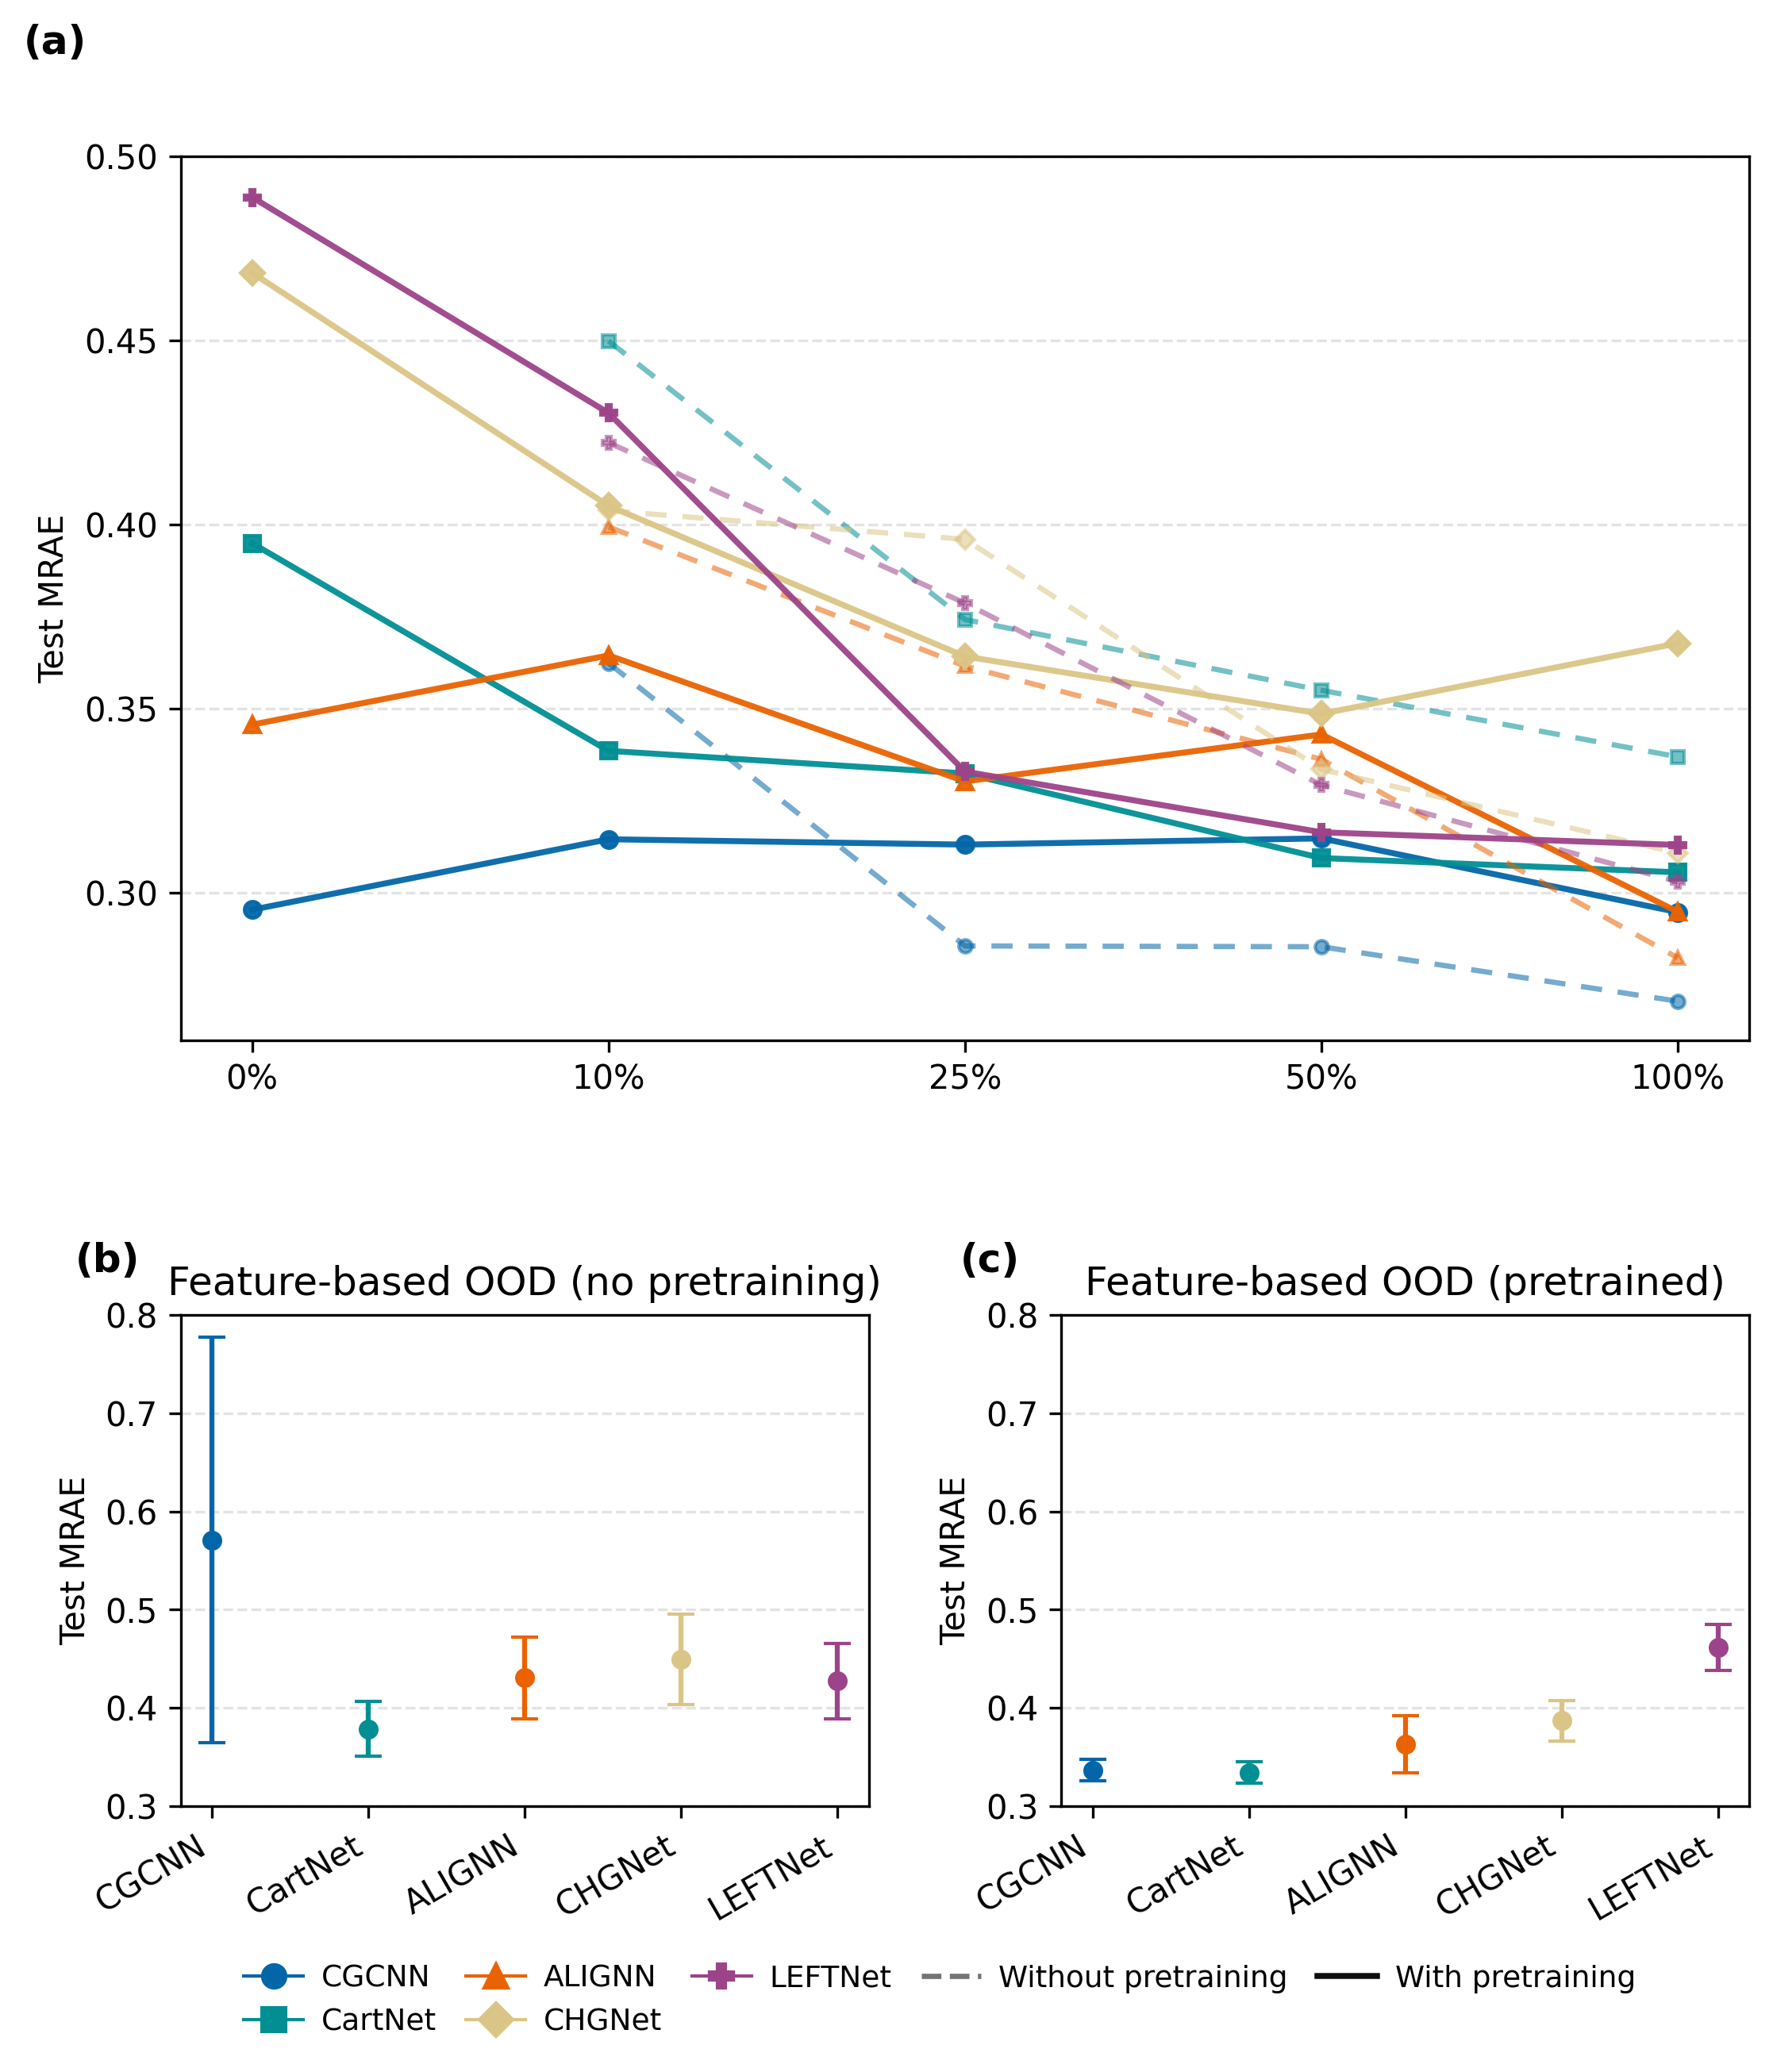

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import FuncFormatter


# -----------------------
# User settings
# -----------------------
PRETRAIN_SUMMARY = Path("output/pretrain/pretrain_eval_summary.csv")
METRICS_SUMMARY  = Path("output/metrics_summary.csv")

OUT_PDF = Path("figs/pretrain_no_tradml.pdf")
OUT_PNG = Path("figs/pretrain_no_tradml.png")
OUT_PDF.parent.mkdir(parents=True, exist_ok=True)

METRIC_COL = "test_mre"

PRETRAIN_METHODS = ["cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z"]
METHOD_ORDER = PRETRAIN_METHODS.copy()

METHOD_LABELS = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "alignn_prop": "ALIGNN",
    "chgnet": "CHGNet",
    "leftnet_z": "LEFTNet",
}

XTICK_PCTS = [0, 10, 25, 50, 100]
XTICK_LABELS_PCT = [f"{p}%" for p in XTICK_PCTS]

# -----------------------
# Color/style control
# -----------------------
BASE_COLOR = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_prop": "#e96302",
    "chgnet": "#dbc586",
}

METHOD_MARKER = {
    "cgcnn": "o",
    "cartnet": "s",
    "alignn_prop": "^",
    "chgnet": "D",
    "leftnet_z": "P",
}

REGIME_STYLE = {
    "scratch":  {"alpha": 0.55, "linewidth": 1.6, "markersize": 4},
    "pretrain": {"alpha": 0.95, "linewidth": 1.8, "markersize": 5},
}

# scratch 虚线用更明显的 dash pattern（避免“看起来像实线”）
SCRATCH_DASH = (0, (4.0, 3.0))

SHOW_ERRORBARS = False
ERRORBAR_CAPSIZE = 3


# -----------------------
# Helpers
# -----------------------
def normalize_method(name: str) -> str | None:
    if not isinstance(name, str):
        return None
    s = name.lower().strip()

    for suf in ["_pretrain", "_finetune", "_scratch"]:
        if s.endswith(suf):
            s = s[: -len(suf)]

    aliases = {
        "alignn_prop": "alignn_prop",

        "leftnet": "leftnet_z",
        "leftnet_z": "leftnet_z",

        "chgnet_z": "chgnet",
        "chgnet": "chgnet",

        "cartnet_z": "cartnet",
        "cartnet": "cartnet",

        "cgcnn": "cgcnn",
    }
    s = aliases.get(s, s)
    return s if s in BASE_COLOR else None


def require_columns(df: pd.DataFrame, cols: list[str], df_name: str) -> None:
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise KeyError(
            f"{df_name} is missing required columns: {missing}. "
            f"Available columns: {list(df.columns)}"
        )


def parse_split_dir_to_regime_pct(split_dir: str) -> tuple[str, int] | None:
    if not isinstance(split_dir, str):
        return None
    s = split_dir.strip()

    if s == "train_from_scratch":
        return ("scratch", 100)
    if s.startswith("train_from_scratch_"):
        tail = s.split("train_from_scratch_", 1)[1]
        if tail.isdigit():
            return ("scratch", int(tail))

    if s.startswith("finetune"):
        tail = s.split("finetune", 1)[1]
        if tail.isdigit():
            return ("pretrain", int(tail))

    return None


def reindex_methods(df: pd.DataFrame, method_col: str, methods_all: list[str]) -> pd.DataFrame:
    return df.set_index(method_col).reindex(methods_all).reset_index()


def agg_mean_std(df: pd.DataFrame, metric: str, group_col: str, order: list[str]) -> pd.DataFrame:
    out = (df.groupby(group_col)[metric]
             .agg(["mean", "std", "count"])
             .rename(columns={"mean": "Mean", "std": "Std", "count": "N"})
             .reset_index()
             .rename(columns={group_col: "Model"}))
    out["Model"] = pd.Categorical(out["Model"], categories=order, ordered=True)
    return out.sort_values("Model").reset_index(drop=True)


# -----------------------
# Load data
# -----------------------
df_pre = pd.read_csv(PRETRAIN_SUMMARY)
df_all = pd.read_csv(METRICS_SUMMARY)

require_columns(df_pre, ["run", METRIC_COL], "PRETRAIN_SUMMARY")
require_columns(df_all, ["split_dir", "method", METRIC_COL], "METRICS_SUMMARY")


# -----------------------
# Build (0%) pretrain point from PRETRAIN_SUMMARY
# -----------------------
p0 = df_pre.copy()
p0["method"] = p0["run"].map(normalize_method)
p0[METRIC_COL] = pd.to_numeric(p0[METRIC_COL], errors="coerce")
p0 = p0.dropna(subset=["method", METRIC_COL])

p0 = (p0.sort_values(METRIC_COL, ascending=True)
        .groupby("method", as_index=False)
        .first())

p0["regime"] = "pretrain"
p0["pct"] = 0
p0 = p0[["method", "regime", "pct", METRIC_COL]]
p0 = reindex_methods(p0, "method", PRETRAIN_METHODS)


# -----------------------
# Build scratch + finetune points from METRICS_SUMMARY
# -----------------------
tmp = df_all.copy()
tmp["method"] = tmp["method"].map(normalize_method)
tmp[METRIC_COL] = pd.to_numeric(tmp[METRIC_COL], errors="coerce")
tmp = tmp.dropna(subset=["method", METRIC_COL, "split_dir"])

parsed = tmp["split_dir"].astype(str).map(parse_split_dir_to_regime_pct)
tmp["regime"] = parsed.map(lambda x: x[0] if x is not None else None)
tmp["pct"]    = parsed.map(lambda x: x[1] if x is not None else np.nan)
tmp = tmp.dropna(subset=["regime", "pct"])
tmp["pct"] = tmp["pct"].astype(int)

tmp = tmp[tmp["pct"].isin([10, 25, 50, 100])].copy()

agg = (tmp.groupby(["method", "regime", "pct"], dropna=False)
         .agg(mre_mean=(METRIC_COL, "mean"),
              mre_std=(METRIC_COL, "std"),
              n=(METRIC_COL, "count"))
         .reset_index())

p0_for_merge = p0.rename(columns={METRIC_COL: "mre_mean"})
p0_for_merge["mre_std"] = np.nan
p0_for_merge["n"] = 1

all_pts = pd.concat([p0_for_merge, agg], ignore_index=True)
all_pts["method"] = pd.Categorical(all_pts["method"], categories=METHOD_ORDER, ordered=True)
all_pts = all_pts.sort_values(["method", "regime", "pct"])


# -----------------------
# Plot layout
# -----------------------
plt.close("all")

fig = plt.figure(figsize=(8.5, 9.0), dpi=300)
gs = fig.add_gridspec(
    nrows=2, ncols=2,
    height_ratios=[1.8, 1.0],
    width_ratios=[1.0, 1.0],
    hspace=0.40, wspace=0.28
)

ax_top = fig.add_subplot(gs[0, :])
ax_top.set_axisbelow(True)
ax_top.set_ylabel("Test MRAE")

# 线性坐标轴（你现在(a)的范围很小，最合适）
ax_top.set_yscale("linear")

# 不要科学计数法/offset
ax_top.ticklabel_format(axis="y", style="plain", useOffset=False)

# 显示两位小数
ax_top.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.2f}"))

# 背景虚线网格（清楚）
ax_top.grid(which="major", axis="y", linestyle="--", linewidth=0.8, alpha=0.35)

ax_top.set_xticks(range(len(XTICK_PCTS)))
ax_top.set_xticklabels(XTICK_LABELS_PCT)

# 可选：锁定(a)的y范围，让网格更稳定（按你图里大概范围）
ax_top.set_ylim(0.26, 0.50)

# --- legend handles
method_handles = [
    plt.Line2D([0], [0],
               color=BASE_COLOR[m],
               lw=1,
               linestyle="-",
               marker=METHOD_MARKER.get(m, "o"),
               markersize=7,
               markerfacecolor=BASE_COLOR[m],
               markeredgecolor=BASE_COLOR[m],
               label=METHOD_LABELS.get(m, m))
    for m in METHOD_ORDER
]

regime_handles = [
    plt.Line2D([0], [0], color="black",
               alpha=REGIME_STYLE["scratch"]["alpha"],
               linestyle="--",
               lw=REGIME_STYLE["scratch"]["linewidth"],
               label="Without pretraining"),
    plt.Line2D([0], [0], color="black",
               alpha=REGIME_STYLE["pretrain"]["alpha"],
               linestyle="-",
               lw=REGIME_STYLE["pretrain"]["linewidth"],
               label="With pretraining"),
]

# --- plot curves
for m in METHOD_ORDER:
    m_df = all_pts[all_pts["method"] == m].copy()
    if m_df.empty:
        continue
    base_color = BASE_COLOR[m]

    for regime in ["scratch", "pretrain"]:
        r_df = m_df[m_df["regime"] == regime].copy()
        if r_df.empty:
            continue

        y = []
        yerr = []
        for pct in XTICK_PCTS:
            row = r_df[r_df["pct"] == pct]
            if len(row) == 0:
                y.append(np.nan)
                yerr.append(np.nan)
            else:
                y.append(float(row["mre_mean"].iloc[0]))
                yerr.append(float(row["mre_std"].iloc[0]) if np.isfinite(row["mre_std"].iloc[0]) else np.nan)

        xs = np.arange(len(XTICK_PCTS))
        style = REGIME_STYLE[regime]

        ax_top.plot(
            xs, y,
            color=base_color,
            alpha=style["alpha"],
            linewidth=style["linewidth"],
            linestyle=SCRATCH_DASH if regime == "scratch" else "-",
            marker=METHOD_MARKER.get(m, "o"),
            markersize=style["markersize"],
            zorder=3,
        )

        if SHOW_ERRORBARS:
            y = np.array(y, dtype=float)
            yerr = np.array(yerr, dtype=float)
            ok = np.isfinite(y) & np.isfinite(yerr)
            if ok.any():
                ax_top.errorbar(
                    xs[ok], y[ok],
                    yerr=yerr[ok],
                    fmt="none",
                    ecolor=base_color,
                    alpha=style["alpha"],
                    capsize=ERRORBAR_CAPSIZE,
                    linewidth=1.0,
                    zorder=2,
                )


# -----------------------
# OOD summaries (GNN only)
# -----------------------
df_ood = df_all.copy()
df_ood["method"] = df_ood["method"].map(normalize_method)
df_ood[METRIC_COL] = pd.to_numeric(df_ood[METRIC_COL], errors="coerce")
df_ood = df_ood.dropna(subset=["method", METRIC_COL, "split_dir"])

df_ood_np = df_ood[df_ood["split_dir"] == "ood_no_pretrain"].copy()
df_ood_pt = df_ood[df_ood["split_dir"] == "ood"].copy()

df_ood_np = df_ood_np[df_ood_np["method"].isin(METHOD_ORDER)].copy()
df_ood_pt = df_ood_pt[df_ood_pt["method"].isin(PRETRAIN_METHODS)].copy()

sum_ood_np = agg_mean_std(df_ood_np, METRIC_COL, "method", METHOD_ORDER)
sum_ood_pt = agg_mean_std(df_ood_pt, METRIC_COL, "method", PRETRAIN_METHODS)

ylim_ood = (0.3, 0.8)

# -----------------------
# Bottom panels
# -----------------------
ax11 = fig.add_subplot(gs[1, 0])
ax12 = fig.add_subplot(gs[1, 1])

def plot_errorbar_panel(ax, summary: pd.DataFrame, title: str, show_ylabel: bool = True, ylim=None):
    if summary.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    models = summary["Model"].astype(str).tolist()
    x = np.arange(len(models))

    for j, (_, row) in enumerate(summary.iterrows()):
        m = str(row["Model"])
        ax.errorbar(
            x[j],
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
            markersize=5,
            zorder=3,
        )

    ax.set_xticks(x)
    ax.set_xticklabels([METHOD_LABELS.get(m, m) for m in models], rotation=30, ha="right")
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Test MRAE" if show_ylabel else "")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    if ylim is not None:
        ax.set_ylim(*ylim)

plot_errorbar_panel(ax11, sum_ood_np, "Feature-based OOD (no pretraining)", True, ylim_ood)
plot_errorbar_panel(ax12, sum_ood_pt, "Feature-based OOD (pretrained)", True, ylim_ood)

# -----------------------
# Global legend
# -----------------------
all_handles = method_handles + regime_handles
all_labels = [h.get_label() for h in all_handles]

fig.legend(
    handles=all_handles,
    labels=all_labels,
    loc="lower center",
    ncol=5,
    frameon=False,
    fontsize=9,
    handlelength=2.0,
    handletextpad=0.6,
    columnspacing=1.0,
    bbox_to_anchor=(0.5, -0.01),
)

# panel labels
for a, lab in zip([ax_top, ax11, ax12], ["(a)", "(b)", "(c)"]):
    a.text(
        -0.06, 1.15, lab,
        transform=a.transAxes,
        fontsize=12,
        fontweight="bold",
        va="top",
        ha="right",
    )

# -----------------------
# Save
# -----------------------
fig.tight_layout(rect=[0, 0.10, 1, 1])
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, bbox_inches="tight")


In [11]:
print("OOD Models (raw):", sorted(set(sum_ood_np["Model"].astype(str).tolist())))


OOD Models (raw): ['alignn_prop', 'cartnet', 'cgcnn', 'chgnet', 'leftnet_z']


### OOD Splits
Including feature OOD， LOMO and matfold splits(three different matfold splits).

#### Feature OOD


In [12]:
'''
code for oods
feature-based ood with and without pretraining
LOMO heatmaps with and without pretraining
chemsys, periodic, crystal sys
'''


# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from pathlib import Path
# import matplotlib.gridspec as gridspec

# # -----------------------
# # User settings
# # -----------------------
# CSV_MAIN = "output/metrics_summary.csv"
# CSV_MATFOLD = "output/split/best_mre_summary.csv"
# OUT_PATH = "figs/fig_ood_panels.pdf"

# INCLUDE_TRAD_ML_NO_PRETRAIN = False
# TRAD_ML = {"linear_regression", "random_forest", "svm"}

# Z_DEFAULT_NO_SUFFIX = {"cgcnn", "cartnet", "chgnet"}
# PLOT_ORDER_GNN = ["cgcnn", "cartnet", "alignn_z", "chgnet", "leftnet_z"]
# PLOT_ORDER_TRAD = ["svm", "random_forest", "linear_regression"]

# COLOR_MAP = {
#     "cgcnn": "#0366a8",
#     "cartnet": "#018f94",
#     "leftnet_z": "#9d4389",
#     "alignn_z": "#e96302",
#     "chgnet": "#dbc586",
#     "svm": "#7f7f7f",
#     "random_forest": "#8c564b",
#     "linear_regression": "#17becf",
# }

# LABEL_MAP = {
#     "alignn_z": "ALIGNN",
#     "cartnet": "CartNet",
#     "cgcnn": "CGCNN",
#     "chgnet": "CHGNet",
#     "leftnet_z": "LEFTNet",
#     "svm": "SVR",
#     "random_forest": "Random Forest",
#     "linear_regression": "Linear Regression",
# }

# MATFOLD_SPLITS = ["chemsys", "composition", "periodic"]

# Path("figs").mkdir(parents=True, exist_ok=True)

# # -----------------------
# # Helpers
# # -----------------------
# def keep_z_only_main(df_sub: pd.DataFrame, include_trad: bool) -> pd.DataFrame:
#     m = df_sub["method"].astype(str)
#     keep_gnn = m.str.endswith("_z") | m.isin(Z_DEFAULT_NO_SUFFIX)
#     keep_trad = m.isin(TRAD_ML) if include_trad else False
#     return df_sub[keep_gnn | keep_trad].copy()

# def agg_mean_std(df_sub: pd.DataFrame, metric_col: str, method_col: str, order: list[str]) -> pd.DataFrame:
#     summary = (
#         df_sub.groupby(method_col)[metric_col]
#         .agg(["mean", "std"])
#         .reset_index()
#         .rename(columns={method_col: "Model", "mean": "Mean", "std": "Std"})
#     )
#     present = set(summary["Model"])
#     order = [m for m in order if m in present]
#     if not order:
#         return summary.iloc[0:0].copy()
#     return summary.set_index("Model").loc[order].reset_index()

# def plot_errorbar_panel(ax, summary: pd.DataFrame, title: str, show_ylabel: bool = True, ylim=None):
#     if summary.empty:
#         ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
#         ax.set_axis_off()
#         return

#     models = summary["Model"].tolist()
#     x = np.arange(len(models))

#     for i, row in summary.iterrows():
#         m = row["Model"]
#         ax.errorbar(
#             x[i],
#             row["Mean"],
#             yerr=row["Std"],
#             fmt="o",
#             capsize=4,
#             linestyle="none",
#             color=COLOR_MAP.get(m, "C0"),
#         )

#     ax.set_xticks(x)
#     ax.set_xticklabels([LABEL_MAP.get(m, m) for m in models], rotation=30, ha="right")
#     ax.set_title(title, fontsize=12)

#     if show_ylabel:
#         ax.set_ylabel("Test MRAE")
#     else:
#         ax.set_ylabel("")

#     ax.grid(axis="y", linestyle="--", alpha=0.35)
#     if ylim is not None:
#         ax.set_ylim(*ylim)

# def make_loco_heatmap(ax, df_sub: pd.DataFrame, title: str, vmin=None, vmax=None):
#     pivot = (
#         df_sub.groupby(["method", "split_name"])["test_mre"]
#         .mean()
#         .reset_index()
#         .pivot(index="method", columns="split_name", values="test_mre")
#     )
#     pivot = pivot.loc[[m for m in PLOT_ORDER_GNN if m in pivot.index]]
#     pivot = pivot.reindex(sorted(pivot.columns), axis=1)

#     im = ax.imshow(
#         pivot.values,
#         aspect="auto",
#         vmin=vmin,
#         vmax=vmax,
#         cmap="viridis"
#     )

#     ax.set_title(title, fontsize=12)

#     ax.set_yticks(np.arange(pivot.shape[0]))
#     ax.set_yticklabels([LABEL_MAP.get(m, m) for m in pivot.index])

#     ax.set_xticks(np.arange(pivot.shape[1]))
#     ax.set_xticklabels(pivot.columns, rotation=45, ha="right")

#     # ---------- 新增：在每个格子里标数值（保留两位小数） ----------
#     for i in range(pivot.shape[0]):
#         for j in range(pivot.shape[1]):
#             val = pivot.values[i, j]
#             if not np.isnan(val):
#                 ax.text(
#                     j, i,
#                     f"{val:.2f}",
#                     ha="center",
#                     va="center",
#                     fontsize=9,
#                     color="black" if vmin is not None and val > (vmin + vmax) / 2 else "white"
#                 )
#     # -------------------------------------------------------------

#     return im
# def normalize_matfold_model_name(name: str) -> str:
#     name = str(name).strip().lower()
#     mapping = {
#         "alignn": "alignn_z",
#         "leftnet": "leftnet_z",
#         "chgnet": "chgnet",
#         "cgcnn": "cgcnn",
#         "cartnet": "cartnet",
#     }
#     return mapping.get(name, name)

# def matfold_summary_from_best(csv_path: str, split_name: str) -> pd.DataFrame:
#     dfm = pd.read_csv(csv_path)
#     dfm = dfm[dfm["split"] == split_name].copy()
#     dfm["model"] = dfm["model"].replace({"chgnet_z": "chgnet"})
#     dfm["model"] = dfm["model"].replace({"cartnet_z": "cartnet"})
#     dfm["Model"] = dfm["model"].apply(normalize_matfold_model_name)
#     dfm = dfm[dfm["Model"].isin(PLOT_ORDER_GNN)].copy()

#     if dfm.empty:
#         return pd.DataFrame(columns=["Model", "Mean", "Std"])

#     summary = (
#         dfm.groupby("Model")["test_mre"]
#         .agg(["mean", "std"])
#         .reset_index()
#         .rename(columns={"mean": "Mean", "std": "Std"})
#     )

#     order = [m for m in PLOT_ORDER_GNN if m in set(summary["Model"])]
#     return summary.set_index("Model").loc[order].reset_index()


# def shared_ylim(*summaries):
#     vals = []
#     for s in summaries:
#         if s is None or s.empty:
#             continue
#         vals.append((s["Mean"] - s["Std"]).min())
#         vals.append((s["Mean"] + s["Std"]).max())
#     if not vals:
#         return None
#     lo, hi = float(min(vals)), float(max(vals))
#     pad = 0.06 * (hi - lo) if hi > lo else 0.01
#     return (lo - pad, hi + pad)

# # -----------------------
# # Load
# # -----------------------
# df = pd.read_csv(CSV_MAIN)

# # ---- unify naming: CHGNet may appear as "chgnet_z" in some runs ----
# df["method"] = df["method"].astype(str).str.strip().str.lower()
# df["method"] = df["method"].replace({"chgnet_z": "chgnet"})
# df["method"] = df["method"].replace({"cartnet_z": "cartnet"})



# # -----------------------
# # Build panels' data
# # -----------------------
# # Row 1: feature OOD
# df_ood_np = keep_z_only_main(df[df["split_dir"] == "ood_no_pretrain"].copy(),
#                              include_trad=INCLUDE_TRAD_ML_NO_PRETRAIN)
# order_np = PLOT_ORDER_GNN + (PLOT_ORDER_TRAD if INCLUDE_TRAD_ML_NO_PRETRAIN else [])
# sum_ood_np = agg_mean_std(df_ood_np, "test_mre", "method", order_np)

# df_ood_pt = keep_z_only_main(df[df["split_dir"] == "ood"].copy(), include_trad=False)
# sum_ood_pt = agg_mean_std(df_ood_pt, "test_mre", "method", PLOT_ORDER_GNN)
# ylim_ood = shared_ylim(sum_ood_np, sum_ood_pt)

# # Row 2: LOCO heatmaps
# df_loco_np = keep_z_only_main(df[df["split_dir"] == "category_no_pretrain"].copy(), include_trad=False)
# df_loco_pt = keep_z_only_main(df[df["split_dir"] == "category"].copy(), include_trad=False)
# all_vals = pd.concat([df_loco_np["test_mre"], df_loco_pt["test_mre"]], ignore_index=True).dropna()
# vmin = float(all_vals.min()) if len(all_vals) else None
# vmax = float(all_vals.max()) if len(all_vals) else None

# # Row 3: MatFold (pretrained only, from best_mre_summary.csv)
# sum_mf_chemsys = matfold_summary_from_best(CSV_MATFOLD, "chemsys")
# # sum_mf_comp = matfold_summary_from_best(CSV_MATFOLD, "composition")
# sum_mf_periodic = matfold_summary_from_best(CSV_MATFOLD, "periodictablegroups")
# sum_crystal = matfold_summary_from_best(CSV_MATFOLD, "crystalsys")
# ylim_mf = shared_ylim(sum_mf_chemsys, sum_mf_periodic, sum_crystal)

# # -----------------------
# # Layout (fixed)
# # -----------------------
# fig = plt.figure(figsize=(12.5, 10.5))
# gs = gridspec.GridSpec(
#     3, 2,
#     height_ratios=[1.0, 1.25, 1.0],
#     wspace=0.25,
#     hspace=0.45
# )

# # Row 1
# ax11 = fig.add_subplot(gs[0, 0])
# ax12 = fig.add_subplot(gs[0, 1])

# # Row 2
# ax21 = fig.add_subplot(gs[1, 0])
# ax22 = fig.add_subplot(gs[1, 1])

# # Row 3: make it span both columns, then split into 1×3
# gs3 = gridspec.GridSpecFromSubplotSpec(1, 3, subplot_spec=gs[2, :], wspace=0.35)
# ax31 = fig.add_subplot(gs3[0, 0])
# ax32 = fig.add_subplot(gs3[0, 1])
# ax33 = fig.add_subplot(gs3[0, 2])

# # -----------------------
# # Plot
# # -----------------------
# plot_errorbar_panel(ax11, sum_ood_np, "Feature-based OOD (no pretraining)", show_ylabel=True, ylim=ylim_ood)
# plot_errorbar_panel(ax12, sum_ood_pt, "Feature-based OOD (pretrained)", show_ylabel=True, ylim=ylim_ood)

# im1 = make_loco_heatmap(ax21, df_loco_np, "Category LOMO (no pretraining)", vmin=vmin, vmax=vmax)
# im2 = make_loco_heatmap(ax22, df_loco_pt, "Category LOMO (pretrained)", vmin=vmin, vmax=vmax)

# cbar = fig.colorbar(im2, ax=[ax21, ax22], fraction=0.02, pad=0.01)
# cbar.set_label("Test MRAE")
# cbar.ax.locator_params(nbins=5)

# plot_errorbar_panel(ax31, sum_mf_chemsys, "MatFold: ChemSys", show_ylabel=True, ylim=ylim_mf)
# plot_errorbar_panel(ax32, sum_mf_periodic, "MatFold: Periodic", show_ylabel=False, ylim=ylim_mf)
# plot_errorbar_panel(ax33, sum_crystal, "MatFold: CrystalSys", show_ylabel=False, ylim=ylim_mf)

# # Slightly tighten bottom row labels
# for ax in [ax31, ax32, ax33]:
#     ax.tick_params(axis="x", labelsize=9)

# plt.savefig(OUT_PATH, bbox_inches="tight")
# plt.show()
# print(f"Saved figure to: {OUT_PATH}")


'\ncode for oods\nfeature-based ood with and without pretraining\nLOMO heatmaps with and without pretraining\nchemsys, periodic, crystal sys\n'

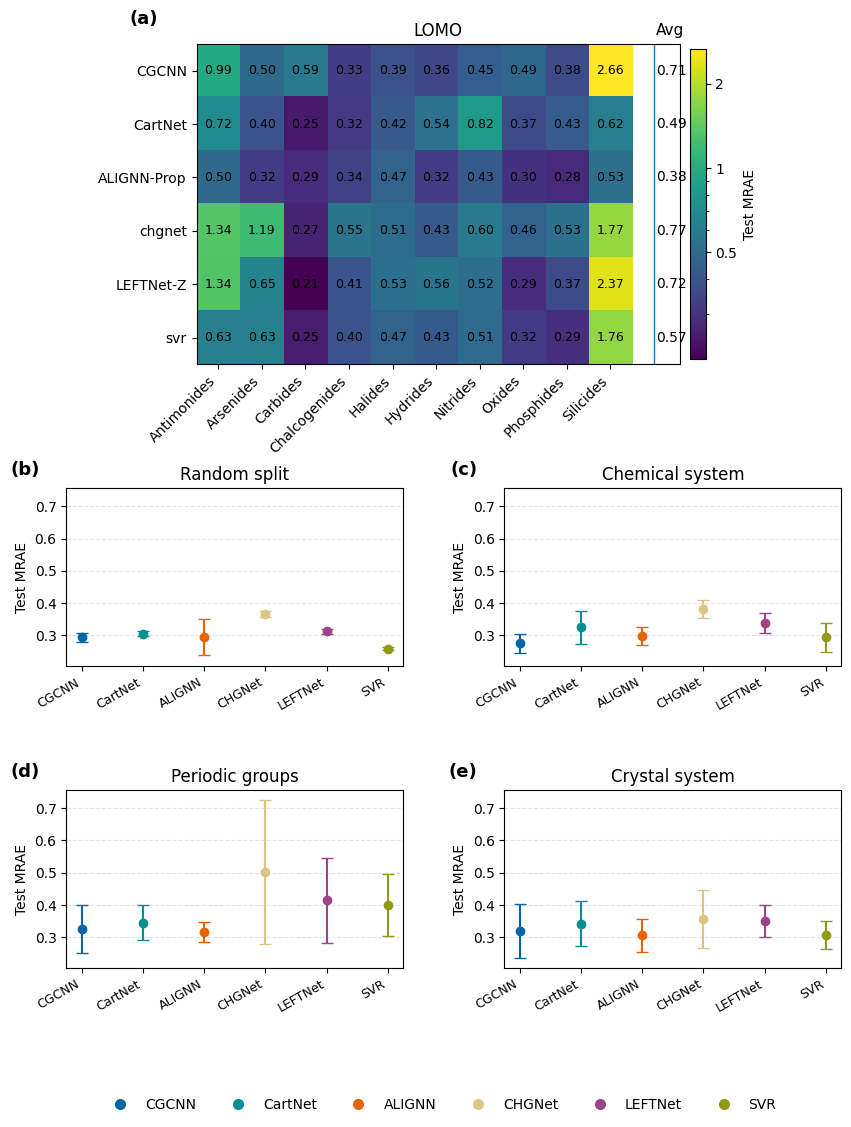

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm
import matplotlib.ticker as mticker

# -----------------------
# User settings
# -----------------------
CSV_MAIN = "output/metrics_summary.csv"
CSV_MATFOLD = "output/split/best_mre_summary.csv"
OUT_PATH = "figs/fig_materials_space_panels.pdf"

PLOT_ORDER_GNN = ["cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z"]
PLOT_ORDER_ALL = PLOT_ORDER_GNN + [
                                    # "linear_regression"
                                #    , "random_forest"
                                   "svr"
                                   ]

# # Pretty labels on x-axis
LABEL_MAP = {
    "alignn_z": "ALIGNN-Z",
    "alignn_prop": "ALIGNN-Prop",
    "cartnet": "CartNet",
    "cgcnn": "CGCNN",
    # "chgnet": "CHGNet",
    "chgnet_prop": "CHGNet-Prop",
    "chgnet_z": "CHGNet-Z",
    # "leftnet": "LEFTNet",
    "leftnet_prop": "LEFTNet-Prop",
    "leftnet_z": "LEFTNet-Z",
    "linear_regression": "Linear\nRegression",
    "random_forest": "Random\nForest",
    "svm": "SVR",
}

METHOD_LABELS = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "alignn_prop": "ALIGNN",
    "chgnet": "CHGNet",
    "leftnet_z": "LEFTNet",
    # "linear_regression": "LR",
    # "random_forest": "RFR",
    "svr": "SVR",
}

# -----------------------
# Color/style control (edit here)
# -----------------------
BASE_COLOR = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_prop": "#e96302",
    "chgnet": "#dbc586",
    # "linear_regression": "#c23639",
    # "random_forest": "#86604d",
    "svr": "#909a15",
}

Path("figs").mkdir(parents=True, exist_ok=True)

# -----------------------
# Helpers
# -----------------------
def normalize_methods(df_sub: pd.DataFrame) -> pd.DataFrame:
    m = df_sub["method"].astype(str).str.strip().str.lower()

    # unify common suffix variants
    m = m.replace({"chgnet_z": "chgnet", "cartnet_z": "cartnet"})

    # unify common aliases (optional; keep if your csv has these)
    m = m.replace({
        "leftnet": "leftnet_z",
        "linreg": "linear_regression",
        "linearregression": "linear_regression",
        "randomforest": "random_forest",
        "rf": "random_forest",
        "svm": "svr",
    })

    out = df_sub.copy()
    out["method"] = m
    return out

def agg_mean_std(df_sub: pd.DataFrame, metric_col: str = "test_mre", order=None) -> pd.DataFrame:
    summary = (
        df_sub.groupby("method")[metric_col]
        .agg(["mean", "std"])
        .reset_index()
        .rename(columns={"method": "Model", "mean": "Mean", "std": "Std"})
    )
    present = set(summary["Model"])
    if order is None:
        order = sorted(present)
    order = [m for m in order if m in present]
    if not order:
        return summary.iloc[0:0].copy()
    return summary.set_index("Model").loc[order].reset_index()


def plot_errorbar_panel(ax, summary: pd.DataFrame, title: str, show_ylabel: bool = True, ylim=None):
    if summary.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    x = np.arange(len(summary))
    for i, row in summary.iterrows():
        m = row["Model"]
        ax.errorbar(
            x[i],
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
        )

    ax.set_xticks(x)
    ax.set_xticklabels([METHOD_LABELS.get(m, m) for m in summary["Model"]], rotation=30, ha="right")
    ax.set_title(title, fontsize=12)

    if show_ylabel:
        ax.set_ylabel("Test MRAE")
    else:
        ax.set_ylabel("")

    ax.grid(axis="y", linestyle="--", alpha=0.35)
    if ylim is not None:
        ax.set_ylim(*ylim)


from matplotlib.colors import LogNorm

def make_loco_heatmap(ax, df_sub: pd.DataFrame, title: str, vmin=None, vmax=None, order=None, show_row_avg=True):
    # pivot: method x category
    pivot = (
        df_sub.groupby(["method", "split_name"])["test_mre"]
        .mean()
        .reset_index()
        .pivot(index="method", columns="split_name", values="test_mre")
    )

    if order is None:
        order = list(pivot.index)
    pivot = pivot.loc[[m for m in order if m in pivot.index]]
    pivot = pivot.reindex(sorted(pivot.columns), axis=1)

    # 计算每行 Avg（只用于显示，不用于上色）
    row_avg = pivot.mean(axis=1, skipna=True) if show_row_avg else None

    # --- 只用真实热图数据计算 vmin/vmax（不含 Avg） ---
    vals = pivot.values
    vals = vals[np.isfinite(vals)]
    if vals.size == 0:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return None

    if vmin is None:
        vmin = float(vals.min())
    if vmax is None:
        vmax = float(vals.max())

    # LogNorm 必须 vmin>0；若有<=0，屏蔽掉再算
    if vmin <= 0:
        pivot_pos = pivot.mask(pivot <= 0)
        vals2 = pivot_pos.values[np.isfinite(pivot_pos.values)]
        if vals2.size == 0:
            ax.text(0.5, 0.5, "No positive values for LogNorm", ha="center", va="center", transform=ax.transAxes)
            ax.set_axis_off()
            return None
        pivot = pivot_pos
        vmin, vmax = float(vals2.min()), float(vals2.max())

    im = ax.imshow(
        pivot.values,
        aspect="auto",
        norm=LogNorm(vmin=vmin, vmax=vmax),
        cmap="viridis",
    )

    ax.set_title(title, fontsize=12)

    n_rows, n_cols = pivot.shape

    # 轴标签（x 只到真实 category，不含 Avg）
    ax.set_yticks(np.arange(n_rows))
    ax.set_yticklabels([LABEL_MAP.get(m, m) for m in pivot.index])

    ax.set_xticks(np.arange(n_cols))
    ax.set_xticklabels(pivot.columns, rotation=45, ha="right")

    # 在 heatmap 单元格内写数值
    for i in range(n_rows):
        for j in range(n_cols):
            val = pivot.values[i, j]
            if np.isfinite(val):
                ax.text(j, i, f"{val:.2f}", ha="center", va="center", fontsize=9)

    # --- 右侧 Avg 文字列（不参与上色） ---
    if show_row_avg:
        # 右侧留出一列空白空间：把 x 轴范围扩到 n_cols（多出 1 列宽度）
        ax.set_xlim(-0.5, n_cols + 0.6)

        # 分隔线（可选）
        ax.axvline(n_cols - 0.5 + 0.5, linewidth=1)

        # 标题
        ax.text(n_cols + 0.05, -0.75, "Avg", ha="left", va="center", fontsize=11)

        # 每行 Avg 数值
        for i, m in enumerate(pivot.index):
            av = row_avg.loc[m]
            if np.isfinite(av):
                ax.text(n_cols + 0.05, i, f"{av:.2f}", ha="left", va="center", fontsize=10)

    # 供外部用（比如 ticks 过滤）
    im._lomo_vmin = vmin
    im._lomo_vmax = vmax
    return im


def normalize_matfold_model_name(name: str) -> str:
    name = str(name).strip().lower()
    mapping = {
        "alignn": "alignn_z",
        "leftnet": "leftnet_z",
        "chgnet": "chgnet",
        "cgcnn": "cgcnn",
        "cartnet": "cartnet",
    }
    return mapping.get(name, name)

def matfold_summary_from_best(csv_path: str, split_name: str) -> pd.DataFrame:
    dfm = pd.read_csv(csv_path)
    dfm = dfm[dfm["split"] == split_name].copy()
    dfm["model"] = dfm["model"].replace({"chgnet_z": "chgnet"})
    dfm["model"] = dfm["model"].replace({"cartnet_z": "cartnet"})
    dfm["Model"] = dfm["model"].apply(normalize_matfold_model_name)
    dfm = dfm[dfm["Model"].isin(PLOT_ORDER_ALL)].copy()

    if dfm.empty:
        return pd.DataFrame(columns=["Model", "Mean", "Std"])

    summary = (
        dfm.groupby("Model")["test_mre"]
        .agg(["mean", "std"])
        .reset_index()
        .rename(columns={"mean": "Mean", "std": "Std"})
    )
    order = [m for m in PLOT_ORDER_ALL if m in set(summary["Model"])]
    return summary.set_index("Model").loc[order].reset_index()

def shared_ylim(*summaries):
    vals = []
    for s in summaries:
        if s is None or s.empty:
            continue
        lo = (s["Mean"] - s["Std"]).min()
        hi = (s["Mean"] + s["Std"]).max()
        vals.append(float(lo))
        vals.append(float(hi))
    if not vals:
        return None
    lo, hi = min(vals), max(vals)
    pad = 0.06 * (hi - lo) if hi > lo else 0.01
    return (lo - pad, hi + pad)

# -----------------------
# Load main CSV
# -----------------------
df = pd.read_csv(CSV_MAIN)
df["method"] = df["method"].astype(str).str.strip().str.lower()
df = normalize_methods(df)

df["method"] = df["method"].replace({"chgnet_z": "chgnet"})
df["method"] = df["method"].replace({"cartnet_z": "cartnet"})

# -----------------------
# Data: top heatmap = Category LOMO (pretrained)
# -----------------------
df_lomo = normalize_methods(df[df["split_dir"] == "category"].copy())
all_vals = df_lomo["test_mre"].dropna()
vmin = float(all_vals.min()) if len(all_vals) else None
vmax = float(all_vals.max()) if len(all_vals) else None

vmin = 0
vmax = 3


# -----------------------
# Data: bottom 2×2 = Random split + MatFold (pretrained)
# Random split is split_dir == "finetune100"
# -----------------------
TRAD_ML = {"linear_regression", "random_forest", "svr"}

# 1) finetune100 for all methods that have it
df_ft = df[df["split_dir"] == "finetune100"].copy()

# 2) additionally allow train_from_scratch for traditional ML methods
df_scratch_trad = df[(df["split_dir"] == "train_from_scratch") & (df["method"].isin(TRAD_ML))].copy()

# 3) merge + normalize
df_random = pd.concat([df_ft, df_scratch_trad], ignore_index=True)
df_random = normalize_methods(df_random)
sum_random = agg_mean_std(df_random, metric_col="test_mre", order=PLOT_ORDER_ALL)


sum_chemsys = matfold_summary_from_best(CSV_MATFOLD, "chemsys")
sum_periodic = matfold_summary_from_best(CSV_MATFOLD, "periodictablegroups")
sum_crystal = matfold_summary_from_best(CSV_MATFOLD, "crystalsys")

ylim_bottom = shared_ylim(sum_random, sum_chemsys, sum_periodic, sum_crystal)

# -----------------------
# Layout: top (span 2 cols) + bottom 2×2
# -----------------------
fig = plt.figure(figsize=(10, 12))
gs = gridspec.GridSpec(
    3, 2,
    height_ratios=[1.8, 1.0, 1.0],
    wspace=0.3,
    hspace=0.55
)

# top row spans both columns
ax_top = fig.add_subplot(gs[0, :])
ax_top.set_in_layout(False)  # 关键：避免 tight bbox/layout 覆盖

# bottom 2×2
ax11 = fig.add_subplot(gs[1, 0])
ax12 = fig.add_subplot(gs[1, 1])
ax21 = fig.add_subplot(gs[2, 0])
ax22 = fig.add_subplot(gs[2, 1])

# ---- Panel labels: (a)–(e) ----
panel_labels = {
    ax_top: "(a)",
    ax11: "(b)",
    ax12: "(c)",
    ax21: "(d)",
    ax22: "(e)",
}

for ax, label in panel_labels.items():
    ax.text(
        -0.08, 1.05,          # 位置：左上角外侧
        label,
        transform=ax.transAxes,
        fontsize=13,
        fontweight="bold",
        va="bottom",
        ha="right",
    )


im = make_loco_heatmap(ax_top, df_lomo, "LOMO", vmin=vmin, vmax=vmax, order=PLOT_ORDER_ALL, show_row_avg=True)


cbar = fig.colorbar(im, ax=ax_top, fraction=0.020, pad=0.02)
cbar.set_label("Test MRAE")

cbar.locator = mticker.LogLocator(base=10, numticks=6)
cbar.formatter = mticker.LogFormatterMathtext(base=10)
cbar.update_ticks()

ticks = [0, 0.5, 1, 2, 3]
vmin, vmax = im._lomo_vmin, im._lomo_vmax
ticks = [t for t in ticks if vmin <= t <= vmax]

cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{t:g}" for t in ticks])


# ---- 在创建 colorbar 之后再缩窄 ax_top，并同步调整 colorbar ----
fig.canvas.draw()  # 让位置先稳定

pos = ax_top.get_position()
new_w = pos.width * 0.65                    # 建议 0.65~0.85
new_x0 = pos.x0 + (pos.width - new_w) / 2    # 居中
ax_top.set_position([new_x0, pos.y0, new_w, pos.height])

# 把 colorbar 贴到新 ax_top 的右侧（同高，短一点可改 height）
cpos = cbar.ax.get_position()
pad = 0.01
cb_w = cpos.width
cbar.ax.set_position([new_x0 + new_w + pad, pos.y0, cb_w, pos.height])

plot_errorbar_panel(ax11, sum_random, "Random split", show_ylabel=True, ylim=ylim_bottom)
plot_errorbar_panel(ax12, sum_chemsys, "Chemical system", show_ylabel=True, ylim=ylim_bottom)
plot_errorbar_panel(ax21, sum_periodic, "Periodic groups", show_ylabel=True, ylim=ylim_bottom)
plot_errorbar_panel(ax22, sum_crystal, "Crystal system", show_ylabel=True, ylim=ylim_bottom)

for ax in [ax11, ax12, ax21, ax22]:
    ax.tick_params(axis="x", labelsize=9)

from matplotlib.lines import Line2D

# --- Shared legend for methods (once) ---
legend_order = [m for m in PLOT_ORDER_ALL if m in BASE_COLOR]  # 控制顺序
handles = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="none",
        markersize=7,
        markerfacecolor=BASE_COLOR[m],
        markeredgecolor=BASE_COLOR[m],
        label=METHOD_LABELS.get(m, m),
    )
    for m in legend_order
]

fig.legend(
    handles=handles,
    labels=[h.get_label() for h in handles],
    loc="lower center",
    ncol=min(6, len(handles)),
    frameon=False,
    bbox_to_anchor=(0.5, -0.02),
)


plt.savefig(OUT_PATH, bbox_inches="tight")
plt.show()


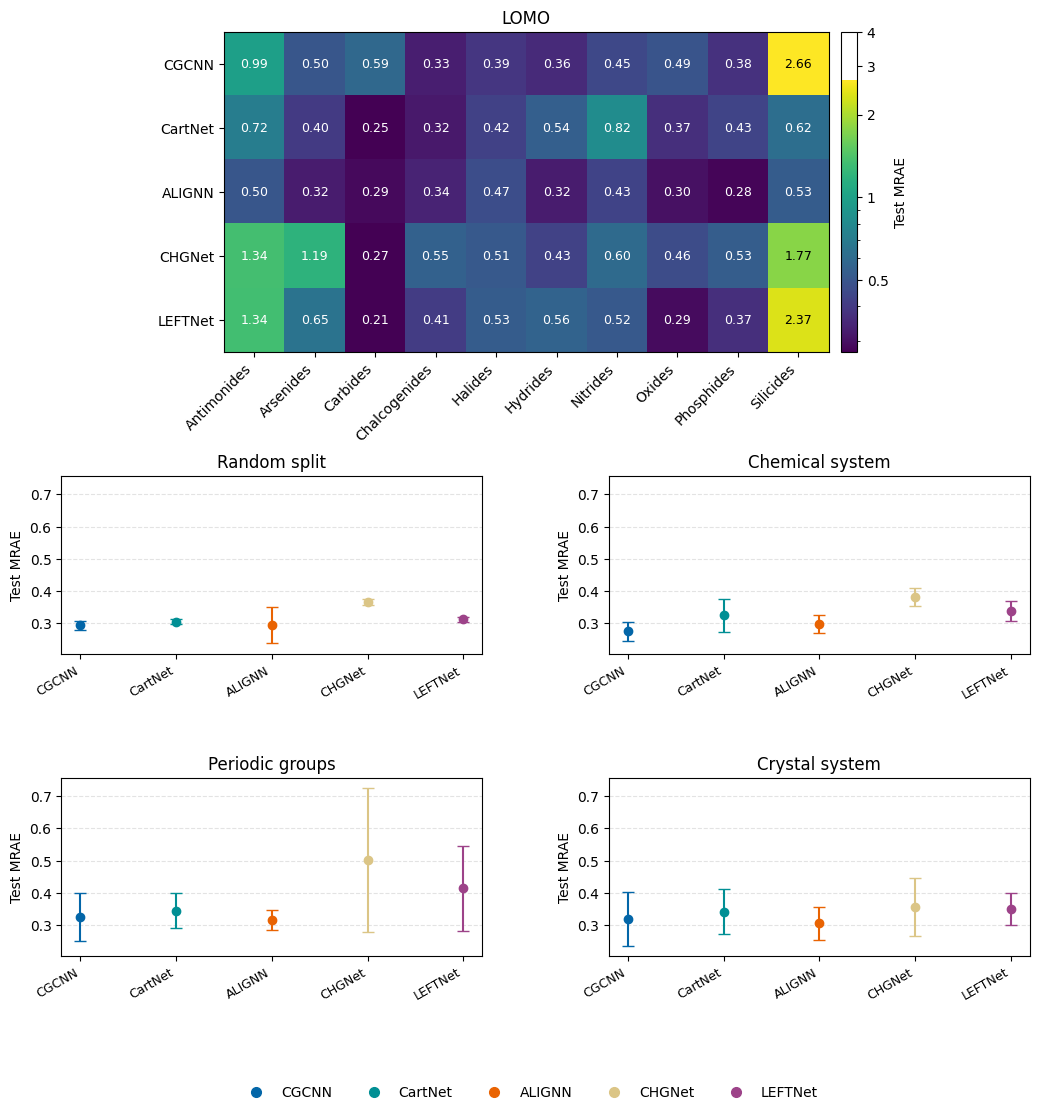

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm


# -----------------------
# User settings
# -----------------------
CSV_MAIN = "output/metrics_summary.csv"
CSV_MATFOLD = "output/split/best_mre_summary.csv"
OUT_PATH = "figs/fig_materials_space_panels_no_tradml.pdf"  # 建议另存，避免覆盖

PLOT_ORDER_GNN = ["cgcnn", "cartnet", "alignn_prop", "chgnet", "leftnet_z"]
PLOT_ORDER_ALL = PLOT_ORDER_GNN  # 只画 GNN（去掉传统 ML）


METHOD_LABELS = {
    "cgcnn": "CGCNN",
    "cartnet": "CartNet",
    "alignn_prop": "ALIGNN",
    "chgnet": "CHGNet",
    "leftnet_z": "LEFTNet",
    "linear_regression": "LR",
    "random_forest": "RFR",
    "svr": "SVR",
}

# 你 make_loco_heatmap 里用到 LABEL_MAP，但原脚本没定义；这里补上
LABEL_MAP = METHOD_LABELS

# -----------------------
# Color/style control (edit here)
# -----------------------
BASE_COLOR = {
    "cgcnn": "#0366a8",
    "cartnet": "#018f94",
    "leftnet_z": "#9d4389",
    "alignn_prop": "#e96302",
    "chgnet": "#dbc586",
    "linear_regression": "#c23639",
    "random_forest": "#86604d",
    "svr": "#909a15",
}

Path("figs").mkdir(parents=True, exist_ok=True)

# -----------------------
# Helpers
# -----------------------
def normalize_methods(df_sub: pd.DataFrame) -> pd.DataFrame:
    m = df_sub["method"].astype(str).str.strip().str.lower()

    # unify common suffix variants
    m = m.replace({"chgnet_z": "chgnet", "cartnet_z": "cartnet"})

    # unify common aliases (optional; keep if your csv has these)
    m = m.replace({
        "leftnet": "leftnet_z",
        "linreg": "linear_regression",
        "linearregression": "linear_regression",
        "randomforest": "random_forest",
        "rf": "random_forest",
        "svm": "svr",
    })

    out = df_sub.copy()
    out["method"] = m
    return out

def agg_mean_std(df_sub: pd.DataFrame, metric_col: str = "test_mre", order=None) -> pd.DataFrame:
    summary = (
        df_sub.groupby("method")[metric_col]
        .agg(["mean", "std"])
        .reset_index()
        .rename(columns={"method": "Model", "mean": "Mean", "std": "Std"})
    )
    present = set(summary["Model"])
    if order is None:
        order = sorted(present)
    order = [m for m in order if m in present]
    if not order:
        return summary.iloc[0:0].copy()
    return summary.set_index("Model").loc[order].reset_index()

def plot_errorbar_panel(ax, summary: pd.DataFrame, title: str, show_ylabel: bool = True, ylim=None):
    if summary.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    x = np.arange(len(summary))
    for i, row in summary.iterrows():
        m = row["Model"]
        ax.errorbar(
            x[i],
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
        )

    ax.set_xticks(x)
    ax.set_xticklabels([METHOD_LABELS.get(m, m) for m in summary["Model"]], rotation=30, ha="right")
    ax.set_title(title, fontsize=12)

    if show_ylabel:
        ax.set_ylabel("Test MRAE")
    else:
        ax.set_ylabel("")

    ax.grid(axis="y", linestyle="--", alpha=0.35)
    if ylim is not None:
        ax.set_ylim(*ylim)

def make_loco_heatmap(ax, df_sub: pd.DataFrame, title: str, vmin=None, vmax=None, order=None):
    pivot = (
        df_sub.groupby(["method", "split_name"])["test_mre"]
        .mean()
        .reset_index()
        .pivot(index="method", columns="split_name", values="test_mre")
    )

    if order is None:
        order = list(pivot.index)
    pivot = pivot.loc[[m for m in order if m in pivot.index]]
    pivot = pivot.reindex(sorted(pivot.columns), axis=1)

    vals = pivot.values[np.isfinite(pivot.values)]
    vmin_eff = np.percentile(vals, 5) if vmin is None else max(vmin, np.percentile(vals, 5))
    vmax_eff = vmax

    im = ax.imshow(
        pivot.values,
        aspect="auto",
        norm=LogNorm(vmin=vmin_eff, vmax=vmax_eff),
        cmap="viridis",
    )

    ax.set_title(title, fontsize=12)

    ax.set_yticks(np.arange(pivot.shape[0]))
    ax.set_yticklabels([LABEL_MAP.get(m, m) for m in pivot.index])

    ax.set_xticks(np.arange(pivot.shape[1]))
    ax.set_xticklabels(pivot.columns, rotation=45, ha="right")

    for i in range(pivot.shape[0]):
        for j in range(pivot.shape[1]):
            val = pivot.values[i, j]
            if not np.isnan(val):
                ax.text(
                    j, i,
                    f"{val:.2f}",
                    ha="center",
                    va="center",
                    fontsize=9,
                    color="black" if val > 1.5 else "white",
                )
    return im

def normalize_matfold_model_name(name: str) -> str:
    name = str(name).strip().lower()
    mapping = {
        "alignn_prop": "alignn_prop",
        "leftnet": "leftnet_z",
        "chgnet": "chgnet",
        "cgcnn": "cgcnn",
        "cartnet": "cartnet",
    }
    return mapping.get(name, name)

def matfold_summary_from_best(csv_path: str, split_name: str) -> pd.DataFrame:
    dfm = pd.read_csv(csv_path)
    dfm = dfm[dfm["split"] == split_name].copy()
    dfm["model"] = dfm["model"].replace({"chgnet_z": "chgnet", "cartnet_z": "cartnet"})
    dfm["Model"] = dfm["model"].apply(normalize_matfold_model_name)

    # 只保留 GNN
    dfm = dfm[dfm["Model"].isin(PLOT_ORDER_ALL)].copy()

    if dfm.empty:
        return pd.DataFrame(columns=["Model", "Mean", "Std"])

    summary = (
        dfm.groupby("Model")["test_mre"]
        .agg(["mean", "std"])
        .reset_index()
        .rename(columns={"mean": "Mean", "std": "Std"})
    )
    order = [m for m in PLOT_ORDER_ALL if m in set(summary["Model"])]
    return summary.set_index("Model").loc[order].reset_index()

def shared_ylim(*summaries):
    vals = []
    for s in summaries:
        if s is None or s.empty:
            continue
        lo = (s["Mean"] - s["Std"]).min()
        hi = (s["Mean"] + s["Std"]).max()
        vals.append(float(lo))
        vals.append(float(hi))
    if not vals:
        return None
    lo, hi = min(vals), max(vals)
    pad = 0.06 * (hi - lo) if hi > lo else 0.01
    return (lo - pad, hi + pad)

# -----------------------
# Load main CSV
# -----------------------
df = pd.read_csv(CSV_MAIN)
df["method"] = df["method"].astype(str).str.strip().str.lower()
df = normalize_methods(df)

df["method"] = df["method"].replace({"chgnet_z": "chgnet", "cartnet_z": "cartnet"})

# -----------------------
# Data: top heatmap = Category LOMO (pretrained)
# 只保留 GNN
# -----------------------
df_lomo = normalize_methods(df[df["split_dir"] == "category"].copy())
df_lomo = df_lomo[df_lomo["method"].isin(PLOT_ORDER_ALL)].copy()

all_vals = df_lomo["test_mre"].dropna()
vmin = float(all_vals.min()) if len(all_vals) else None
vmax = float(all_vals.max()) if len(all_vals) else None

# -----------------------
# Data: bottom 2×2 = Random split + MatFold (pretrained)
# Random split: split_dir == "finetune100"
# 只保留 GNN，不再拼 train_from_scratch 的传统 ML
# -----------------------
df_ft = df[df["split_dir"] == "finetune100"].copy()
df_ft = normalize_methods(df_ft)
df_random = df_ft[df_ft["method"].isin(PLOT_ORDER_ALL)].copy()

sum_random = agg_mean_std(df_random, metric_col="test_mre", order=PLOT_ORDER_ALL)

sum_chemsys = matfold_summary_from_best(CSV_MATFOLD, "chemsys")
sum_periodic = matfold_summary_from_best(CSV_MATFOLD, "periodictablegroups")
sum_crystal = matfold_summary_from_best(CSV_MATFOLD, "crystalsys")

ylim_bottom = shared_ylim(sum_random, sum_chemsys, sum_periodic, sum_crystal)

# -----------------------
# Layout: top (span 2 cols) + bottom 2×2
# -----------------------
fig = plt.figure(figsize=(12.5, 12))
gs = gridspec.GridSpec(
    3, 2,
    height_ratios=[1.8, 1.0, 1.0],
    wspace=0.30,
    hspace=0.55
)

ax_top = fig.add_subplot(gs[0, :])
ax_top.set_in_layout(False)

ax11 = fig.add_subplot(gs[1, 0])
ax12 = fig.add_subplot(gs[1, 1])
ax21 = fig.add_subplot(gs[2, 0])
ax22 = fig.add_subplot(gs[2, 1])

# -----------------------
# Plot
# -----------------------
im = make_loco_heatmap(ax_top, df_lomo, "LOMO", vmin=vmin, vmax=vmax, order=PLOT_ORDER_ALL)

cbar = fig.colorbar(im, ax=ax_top, fraction=0.020, pad=0.02)
cbar.set_label("Test MRAE")
ticks = [0.5, 1, 2, 3, 4]  # 按你的数据范围改
cbar.set_ticks(ticks)
cbar.set_ticklabels([str(t) for t in ticks])

fig.canvas.draw()
pos = ax_top.get_position()
new_w = pos.width * 0.65
new_x0 = pos.x0 + (pos.width - new_w) / 2
ax_top.set_position([new_x0, pos.y0, new_w, pos.height])

cpos = cbar.ax.get_position()
pad = 0.01
cb_w = cpos.width
cbar.ax.set_position([new_x0 + new_w + pad, pos.y0, cb_w, pos.height])

plot_errorbar_panel(ax11, sum_random, "Random split", show_ylabel=True, ylim=ylim_bottom)
plot_errorbar_panel(ax12, sum_chemsys, "Chemical system", show_ylabel=True, ylim=ylim_bottom)
plot_errorbar_panel(ax21, sum_periodic, "Periodic groups", show_ylabel=True, ylim=ylim_bottom)
plot_errorbar_panel(ax22, sum_crystal, "Crystal system", show_ylabel=True, ylim=ylim_bottom)

for ax in [ax11, ax12, ax21, ax22]:
    ax.tick_params(axis="x", labelsize=9)


    # from matplotlib.lines import Line2D

# --- Shared legend for methods (once) ---
legend_order = [m for m in PLOT_ORDER_ALL if m in BASE_COLOR]  # 控制顺序
handles = [
    Line2D(
        [0], [0],
        marker="o",
        linestyle="none",
        markersize=7,
        markerfacecolor=BASE_COLOR[m],
        markeredgecolor=BASE_COLOR[m],
        label=METHOD_LABELS.get(m, m),
    )
    for m in legend_order
]

fig.legend(
    handles=handles,
    labels=[h.get_label() for h in handles],
    loc="lower center",
    ncol=min(6, len(handles)),
    frameon=False,
    bbox_to_anchor=(0.5, -0.02),
)


plt.savefig(OUT_PATH, bbox_inches="tight")
plt.show()


In [14]:
# -----------------------
# Print LaTeX table for LOMO heatmap (mean only; no std)
# -----------------------
def lomo_pivot_mean(df_lomo: pd.DataFrame, order: list[str]) -> pd.DataFrame:
    pivot = (
        df_lomo.groupby(["method", "split_name"])["test_mre"]
        .mean()
        .reset_index()
        .pivot(index="method", columns="split_name", values="test_mre")
    )

    # match plotting: enforce row order + sort columns
    pivot = pivot.loc[[m for m in order if m in pivot.index]]
    pivot = pivot.reindex(sorted(pivot.columns), axis=1)
    return pivot

def fmt_mean(x, nd=3):
    if pd.isna(x):
        return ""
    return f"{x:.{nd}f}"

pivot = lomo_pivot_mean(df_lomo, PLOT_ORDER_ALL)

# build pretty table (Model label + each split_name column)
tab_lomo = pivot.copy()
tab_lomo.index = [METHOD_LABELS.get(m, m) for m in tab_lomo.index.astype(str)]
tab_lomo = tab_lomo.reset_index().rename(columns={"index": "Model"})
for c in tab_lomo.columns[1:]:
    tab_lomo[c] = tab_lomo[c].map(lambda v: fmt_mean(v, nd=3))

latex_lomo = tab_lomo.to_latex(
    index=False,
    escape=False,
    column_format="l" + "c" * (tab_lomo.shape[1] - 1),
    caption=("LOMO heatmap values (mean test MRE). Standard deviation is not reported because "
             "this split uses a single fold."),
    label="tab:lomo_heatmap",
)

print(latex_lomo)


\begin{table}
\caption{LOMO heatmap values (mean test MRE). Standard deviation is not reported because this split uses a single fold.}
\label{tab:lomo_heatmap}
\begin{tabular}{lcccccccccc}
\toprule
Model & Antimonides & Arsenides & Carbides & Chalcogenides & Halides & Hydrides & Nitrides & Oxides & Phosphides & Silicides \\
\midrule
CGCNN & 0.988 & 0.502 & 0.590 & 0.329 & 0.391 & 0.357 & 0.447 & 0.493 & 0.375 & 2.661 \\
CartNet & 0.716 & 0.401 & 0.250 & 0.318 & 0.422 & 0.542 & 0.824 & 0.371 & 0.435 & 0.619 \\
ALIGNN & 0.503 & 0.323 & 0.287 & 0.342 & 0.466 & 0.323 & 0.430 & 0.302 & 0.280 & 0.531 \\
CHGNet & 1.343 & 1.194 & 0.266 & 0.555 & 0.514 & 0.425 & 0.600 & 0.462 & 0.532 & 1.770 \\
LEFTNet & 1.337 & 0.649 & 0.208 & 0.408 & 0.528 & 0.560 & 0.517 & 0.291 & 0.371 & 2.368 \\
LR & 0.805 & 0.708 & 0.373 & 0.409 & 0.485 & 1.013 & 0.561 & 0.354 & 0.268 & 4.084 \\
RFR & 0.792 & 0.484 & 0.243 & 0.366 & 0.440 & 0.453 & 0.717 & 0.350 & 0.371 & 1.523 \\
SVR & 0.632 & 0.629 & 0.252 & 0.399 & 0.4

In [15]:
# -----------------------
# Print ONE LaTeX table (4 splits × models) with MRE/MAE/R2 as mean ± std
# -----------------------

METRICS = ["test_mre", "test_mae", "test_r2"]   # 如果你不想要 MRE，把它删掉
METRIC_NAME = {
    "test_mre": "MRE",
    "test_mae": "MAE",
    "test_r2":  "R$^2$",
}

def pm(mean, std, nd=3):
    if pd.isna(mean):
        return ""
    mean_str = f"{mean:.{nd}f}"
    if pd.isna(std):
        return f"$\\text{{{mean_str}}}$"
    std_str = f"{std:.{nd}f}"
    return f"$\\text{{{mean_str}}}_\\text{{({std_str})}}$"


def agg_mean_std_multi(df_sub: pd.DataFrame, metrics: list[str], order: list[str]) -> pd.DataFrame:
    """
    Match plotting behavior:
      - groupby Model key (method/Model)
      - mean & std
      - keep only models present
      - reindex to 'order' (dropping missing)
    Returns columns: Model, <metric>_Mean, <metric>_Std
    """
    if df_sub is None or df_sub.empty:
        return pd.DataFrame(columns=["Model"])

    d = df_sub.copy()

    # Determine grouping column name
    if "method" in d.columns:
        group_col = "method"
    elif "Model" in d.columns:
        group_col = "Model"
    else:
        raise KeyError("df_sub must contain 'method' or 'Model' column")

    # ensure numeric metrics
    for c in metrics:
        if c in d.columns:
            d[c] = pd.to_numeric(d[c], errors="coerce")

    # build aggregation dict for metrics that exist
    metrics_present = [c for c in metrics if c in d.columns]
    if not metrics_present:
        return pd.DataFrame(columns=["Model"])

    agg_spec = {}
    for c in metrics_present:
        agg_spec[f"{c}_Mean"] = (c, "mean")
        agg_spec[f"{c}_Std"]  = (c, "std")

    g = d.groupby(group_col).agg(**agg_spec).reset_index().rename(columns={group_col: "Model"})

    present = set(g["Model"].astype(str))
    order2 = [m for m in order if m in present]
    if not order2:
        return pd.DataFrame(columns=["Model"])

    g["Model"] = pd.Categorical(g["Model"].astype(str), categories=order2, ordered=True)
    g = g.sort_values("Model").reset_index(drop=True)
    return g

def matfold_df_for_split(csv_path: str, split_name: str) -> pd.DataFrame:
    """
    Rebuild the per-split MatFold dataframe using the SAME name normalization
    as your plotting code (normalize_matfold_model_name), to guarantee consistency.
    """
    dfm = pd.read_csv(csv_path)
    dfm = dfm[dfm["split"] == split_name].copy()
    if dfm.empty:
        return dfm

    dfm["model"] = dfm["model"].astype(str).str.strip().str.lower()
    dfm["model"] = dfm["model"].replace({"chgnet_z": "chgnet", "cartnet_z": "cartnet"})
    dfm["Model"] = dfm["model"].apply(normalize_matfold_model_name)

    # Keep exactly the same model set as plotting
    dfm = dfm[dfm["Model"].isin(PLOT_ORDER_ALL)].copy()
    return dfm

# ---- Build summaries for 4 panels (same data sources as plotting)
# Random split: from df_random (already constructed exactly as in plot code)
sum_random_multi = agg_mean_std_multi(df_random, METRICS, PLOT_ORDER_ALL)

# MatFold splits: read from CSV_MATFOLD (same normalization as plot)
df_chemsys = matfold_df_for_split(CSV_MATFOLD, "chemsys")
df_period  = matfold_df_for_split(CSV_MATFOLD, "periodictablegroups")
df_crystal = matfold_df_for_split(CSV_MATFOLD, "crystalsys")

sum_chemsys_multi = agg_mean_std_multi(df_chemsys.rename(columns={"Model": "Model"}), METRICS, PLOT_ORDER_ALL)
sum_period_multi  = agg_mean_std_multi(df_period.rename(columns={"Model": "Model"}),  METRICS, PLOT_ORDER_ALL)
sum_crystal_multi = agg_mean_std_multi(df_crystal.rename(columns={"Model": "Model"}), METRICS, PLOT_ORDER_ALL)

split_summaries = [
    ("Random split",        sum_random_multi),
    ("Chemical system",     sum_chemsys_multi),
    ("Periodic groups",     sum_period_multi),
    ("Crystal system",      sum_crystal_multi),
]

# ---- Build LaTeX table string (Split shown once per group; no separate header row)
col_metrics = [c for c in METRICS if c in ("test_mae", "test_r2", "test_mre")]  # keep order as METRICS
header_cols = ["Split", "Model"] + [METRIC_NAME[c] for c in col_metrics]

lines = []
lines.append("\\begin{table}[t]")
lines.append("\\centering")
lines.append("\\small")
lines.append("\\begin{tabular}{ll" + "c" * len(col_metrics) + "}")
lines.append("\\toprule")
lines.append(" & ".join(header_cols) + " \\\\")
lines.append("\\midrule")

for split_name, s in split_summaries:
    if s is None or s.empty:
        # show split once and indicate no data
        lines.append(" & ".join([split_name, "(no data)"] + [""] * len(col_metrics)) + " \\\\")
        lines.append("\\midrule")
        continue

    # map from model -> row
    s = s.copy()
    s["Model"] = s["Model"].astype(str)
    row_map = {m: r for m, r in s.set_index("Model").iterrows()}

    first_row = True
    for m in PLOT_ORDER_ALL:
        if m not in row_map:
            continue  # match plotting: only show present models
        r = row_map[m]
        model_label = METHOD_LABELS.get(m, m)

        vals = []
        for c in col_metrics:
            vals.append(pm(r.get(f"{c}_Mean", np.nan), r.get(f"{c}_Std", np.nan), nd=3))

        split_cell = split_name if first_row else ""   # <-- only show split once
        first_row = False

        lines.append(" & ".join([split_cell, model_label] + vals) + " \\\\")
    lines.append("\\midrule")

lines.append("\\bottomrule")
lines.append("\\end{tabular}")
lines.append("\\caption{Results for the four error-bar panels (mean $\\pm$ std).}")
lines.append("\\label{tab:materials_space_4panels}")
lines.append("\\end{table}")

latex_table = "\n".join(lines)
print(latex_table)



\begin{table}[t]
\centering
\small
\begin{tabular}{llccc}
\toprule
Split & Model & MRE & MAE & R$^2$ \\
\midrule
Random split & CGCNN & $\text{0.295}_\text{(0.014)}$ & $\text{0.603}_\text{(0.038)}$ & $\text{0.235}_\text{(0.068)}$ \\
 & CartNet & $\text{0.306}_\text{(0.009)}$ & $\text{0.606}_\text{(0.042)}$ & $\text{0.273}_\text{(0.062)}$ \\
 & ALIGNN & $\text{0.295}_\text{(0.056)}$ & $\text{0.577}_\text{(0.067)}$ & $\text{-0.416}_\text{(2.186)}$ \\
 & CHGNet & $\text{0.368}_\text{(0.010)}$ & $\text{0.723}_\text{(0.022)}$ & $\text{0.014}_\text{(0.081)}$ \\
 & LEFTNet & $\text{0.313}_\text{(0.008)}$ & $\text{0.608}_\text{(0.014)}$ & $\text{0.298}_\text{(0.029)}$ \\
 & LR & $\text{0.332}_\text{(0.005)}$ & $\text{0.637}_\text{(0.014)}$ & $\text{0.306}_\text{(0.008)}$ \\
 & RFR & $\text{0.284}_\text{(0.005)}$ & $\text{0.535}_\text{(0.007)}$ & $\text{0.453}_\text{(0.016)}$ \\
 & SVR & $\text{0.259}_\text{(0.005)}$ & $\text{0.506}_\text{(0.007)}$ & $\text{0.501}_\text{(0.013)}$ \\
\midrule
Ch

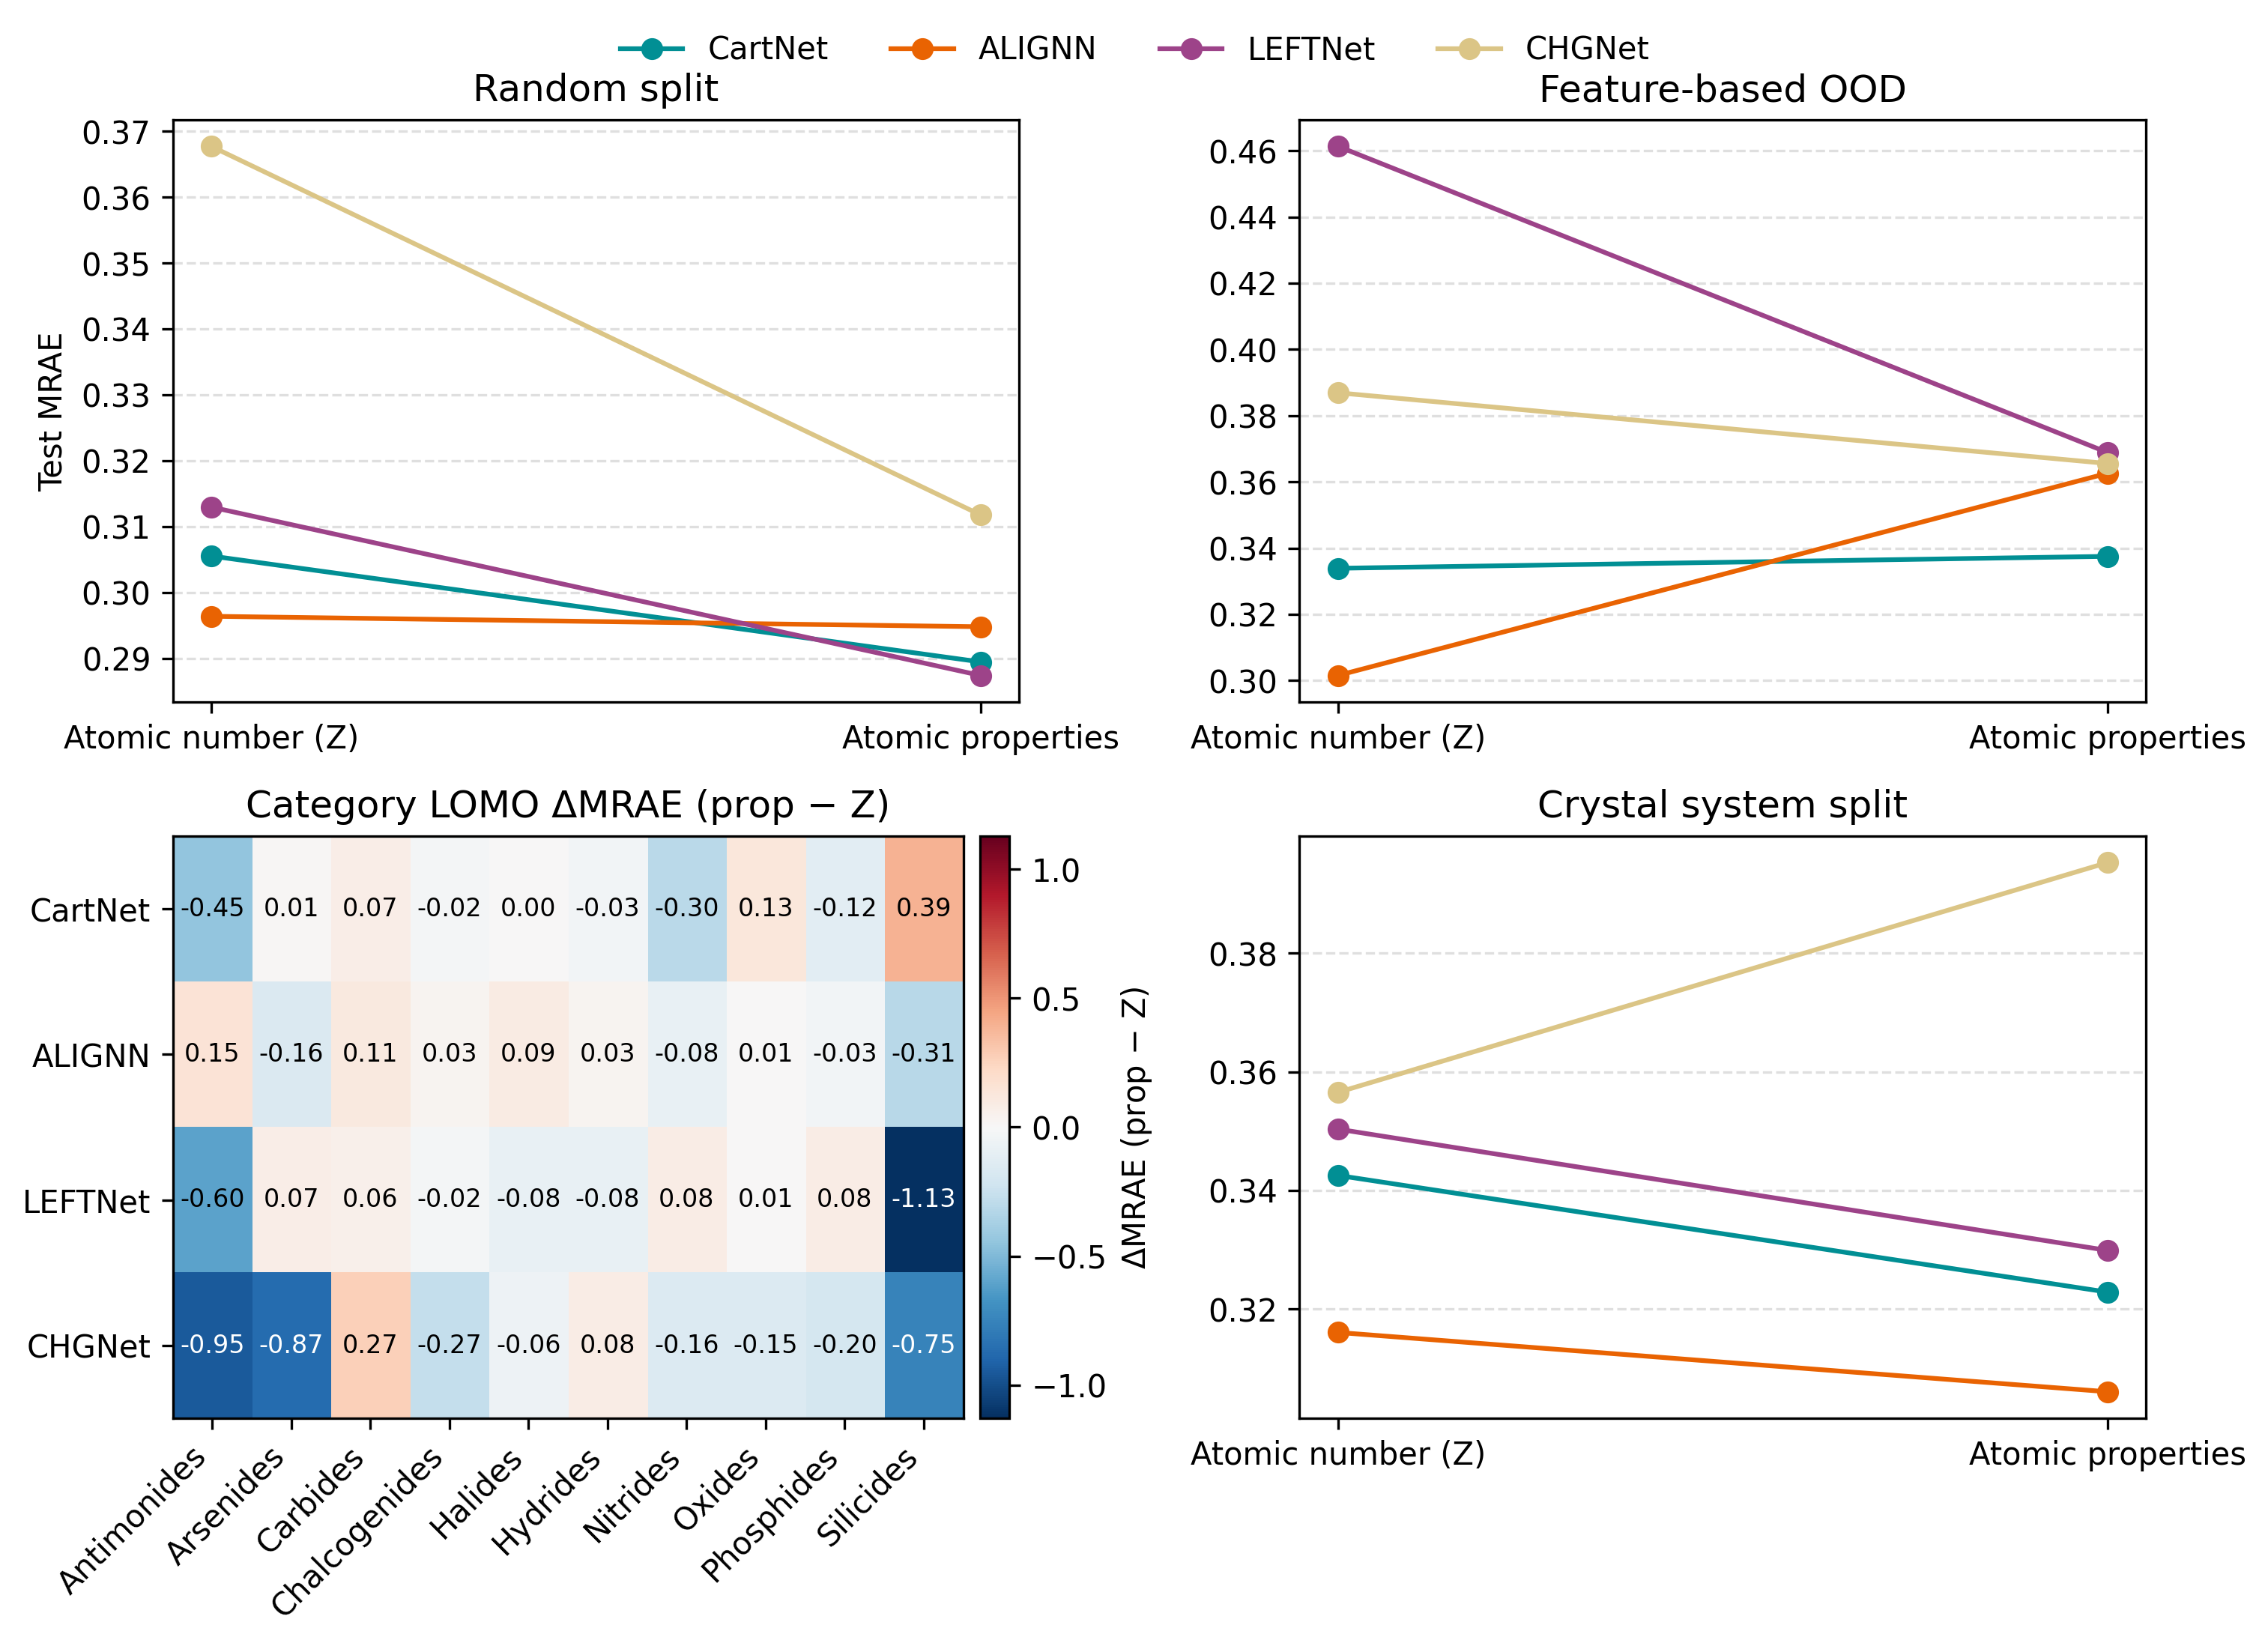

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MODELS = [
    ("CartNet",  "cartnet_z",  "cartnet_prop",  "#018f94"),
    ("ALIGNN",   "alignn_z",   "alignn_prop",   "#e96302"),
    ("LEFTNet",  "leftnet_z",  "leftnet_prop",  "#9d4389"),
    ("CHGNet",   "chgnet_z",   "chgnet_prop",   "#dbc586"),
]

def encoding_stats(df, split_dir, z_name, prop_name, metric="test_mre"):
    d = df[(df["split_dir"] == split_dir) & (df["method"].isin([z_name, prop_name]))].copy()
    stats = d.groupby("method")[metric].agg(["mean", "std"])
    if z_name not in stats.index or prop_name not in stats.index:
        return None
    return {"z_mean": stats.loc[z_name, "mean"], "p_mean": stats.loc[prop_name, "mean"]}

def plot_encoding_transition_ax(ax, df, split_dir, title):
    x = [0, 1]
    for name, z, prop, color in MODELS:
        s = encoding_stats(df, split_dir, z, prop)
        if s is None:
            continue
        ax.plot(x, [s["z_mean"], s["p_mean"]], marker="o", color=color, label=name)
    ax.set_xticks(x)
    ax.set_xticklabels(["Atomic number (Z)", "Atomic properties"])
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

def plot_lomo_delta_ax(ax, df, split_dir, title, metric="test_mre"):
    # ΔMRAE heatmap: (prop − Z) per model × split_name
    z_map = {z.replace("_z",""): z for _, z, _, _ in MODELS}
    p_map = {p.replace("_prop",""): p for _, _, p, _ in MODELS}
    d = df[df["split_dir"] == split_dir]
    mz = d[d["method"].isin(z_map.values())].pivot_table(index="method", columns="split_name", values=metric, aggfunc="mean")
    mp = d[d["method"].isin(p_map.values())].pivot_table(index="method", columns="split_name", values=metric, aggfunc="mean")
    mz.index = mz.index.str.replace("_z","", regex=False)
    mp.index = mp.index.str.replace("_prop","", regex=False)

    bases = [m.lower() for m, *_ in MODELS]
    delta = (mp.loc[bases] - mz.loc[bases])
    vmax = np.nanmax(np.abs(delta.values)) if delta.size else 1.0

    im = ax.imshow(delta.values, aspect="auto", cmap="RdBu_r", vmin=-vmax, vmax=vmax)
    ax.set_title(title)
    ax.set_yticks(range(len(bases)))
    ax.set_yticklabels([m for m, *_ in MODELS])
    ax.set_xticks(range(delta.shape[1]))
    ax.set_xticklabels(delta.columns, rotation=45, ha="right")
    # 根据色阶自动选择文字颜色
    thr = 0.6 * vmax  # 深色阈值，可按需要调 0.5~0.7

    for i in range(delta.shape[0]):
        for j in range(delta.shape[1]):
            v = delta.values[i, j]
            if np.isnan(v):
                continue

            txt_color = "white" if abs(v) >= thr else "black"
            ax.text(
                j, i,
                f"{v:.2f}",
                ha="center",
                va="center",
                fontsize=8,
                color=txt_color,
            )

    return im

def plot_encoding_transition_pair(df, split_left, split_right, titles, outfile):
    fig, axes = plt.subplots(2, 2, figsize=(10.2, 7.2), dpi=300)

    # ── Top row: paired Z → Prop line plots ──
    plot_encoding_transition_ax(axes[0,0], df, split_left, titles[0])
    plot_encoding_transition_ax(axes[0,1], df, split_right, titles[1])
    axes[0,0].set_ylabel("Test MRAE")

    # ── Bottom-left: Category LOMO ΔMRAE heatmap ──
    im = plot_lomo_delta_ax(
        axes[1,0],
        df,
        split_dir="category",
        metric="test_mre",
        title="Category LOMO ΔMRAE (prop − Z)",
    )

    # ── Bottom-right: Crystal system (paired line plot) ──
    plot_encoding_transition_ax(
        axes[1,1],
        df,
        split_dir="crystalsys",
        title="Crystal system split",
    )

    # Colorbar only for the heatmap
    fig.colorbar(
        im,
        ax=axes[1,0],
        fraction=0.046,
        pad=0.02,
        label=r"$\Delta$MRAE (prop − Z)",
    )

    # Shared legend (only once)
    handles, labels = axes[0,0].get_legend_handles_labels()
    fig.legend(
        handles,
        labels,
        loc="upper center",
        ncol=4,
        frameon=False,
        bbox_to_anchor=(0.5, 1.02),
    )

    plt.tight_layout()
    plt.savefig(outfile, bbox_inches="tight")
    plt.show()


df = pd.read_csv("output/metrics_summary.csv")
df["method"] = df["method"].str.lower().str.strip()
df["method"] = df["method"].replace({"cartnet": "cartnet_z", "alignn": "alignn_z", "chgnet": "chgnet_z"})

plot_encoding_transition_pair(
    df,
    split_left="finetune100",
    split_right="ood",
    titles=["Random split", "Feature-based OOD"],
    outfile="figs/encoding_transition_random_vs_ood_with_lomo_and_crystalsys.pdf",
)



In [17]:
import numpy as np
import pandas as pd

CSV = "output/metrics_summary.csv"

METRICS = {
    "MRE": "test_mre",
    "MAE": "test_mae",
    "R2":  "test_r2",
}

MODELS = [
    ("CartNet", "cartnet_z",  "cartnet_prop"),
    ("ALIGNN",  "alignn_z",   "alignn_prop"),
    ("LEFTNet", "leftnet_z",  "leftnet_prop"),
    ("CHGNet",  "chgnet_z",   "chgnet_prop"),
]

SPLITS = {
    "Random split (finetune100)": "finetune100",
    "Feature-based OOD": "ood",
    "Crystal system split": "crystalsys",
}

df = pd.read_csv(CSV)
df["method"] = df["method"].str.lower().str.strip()
df["method"] = df["method"].replace({
    "cartnet": "cartnet_z",
    "alignn": "alignn_z",
    "chgnet": "chgnet_z",
})

def aggregate(metric):
    return (
        df.groupby(["split_dir", "method"])[metric]
          .agg(mean="mean", std="std")
          .reset_index()
    )

AGG = {name: aggregate(col) for name, col in METRICS.items()}

def fmt(mean, std, digits=3):
    if pd.isna(mean):
        return "--"
    if pd.isna(std):
        return rf"$\text{{{mean:.{digits}f}}}$"
    return rf"$\text{{{mean:.{digits}f}}}_\text{{({std:.{digits}f})}}$"


# ---------- build LaTeX tabular ----------
lines = []
lines.append(r"\begin{tabular}{ll" + "cc"*len(METRICS) + "}")
lines.append(r"\toprule")

header = ["Split", "Model"]
for m in METRICS:
    header += [f"{m} (Z)", f"{m} (Prop)"]
lines.append(" & ".join(header) + r" \\")
lines.append(r"\midrule")

for split_name, split_dir in SPLITS.items():
    first = True
    for model, z_m, p_m in MODELS:
        row = [split_name if first else "", model]

        for metric_name, agg_df in AGG.items():
            z = agg_df[(agg_df.split_dir == split_dir) & (agg_df.method == z_m)]
            p = agg_df[(agg_df.split_dir == split_dir) & (agg_df.method == p_m)]

            zm, zs = (z.iloc[0][["mean","std"]] if len(z) else (np.nan,np.nan))
            pm, ps = (p.iloc[0][["mean","std"]] if len(p) else (np.nan,np.nan))

            row.append(fmt(zm, zs))
            row.append(fmt(pm, ps))

        lines.append(" & ".join(row) + r" \\")
        first = False
    lines.append(r"\midrule")

lines[-1] = r"\bottomrule"
lines.append(r"\end{tabular}")

print("\n".join(lines))


\begin{tabular}{llcccccc}
\toprule
Split & Model & MRE (Z) & MRE (Prop) & MAE (Z) & MAE (Prop) & R2 (Z) & R2 (Prop) \\
\midrule
Random split (finetune100) & CartNet & $\text{0.306}_\text{(0.009)}$ & $\text{0.289}_\text{(0.007)}$ & $\text{0.606}_\text{(0.042)}$ & $\text{0.601}_\text{(0.019)}$ & $\text{0.273}_\text{(0.062)}$ & $\text{0.147}_\text{(0.222)}$ \\
 & ALIGNN & $\text{0.296}_\text{(0.011)}$ & $\text{0.295}_\text{(0.056)}$ & $\text{0.601}_\text{(0.030)}$ & $\text{0.577}_\text{(0.067)}$ & $\text{0.235}_\text{(0.081)}$ & $\text{-0.416}_\text{(2.186)}$ \\
 & LEFTNet & $\text{0.313}_\text{(0.008)}$ & $\text{0.287}_\text{(0.008)}$ & $\text{0.608}_\text{(0.014)}$ & $\text{0.574}_\text{(0.028)}$ & $\text{0.298}_\text{(0.029)}$ & $\text{0.318}_\text{(0.103)}$ \\
 & CHGNet & $\text{0.368}_\text{(0.010)}$ & $\text{0.312}_\text{(0.005)}$ & $\text{0.723}_\text{(0.022)}$ & $\text{0.608}_\text{(0.010)}$ & $\text{0.014}_\text{(0.081)}$ & $\text{0.231}_\text{(0.057)}$ \\
\midrule
Feature-based 

In [18]:
import numpy as np
import pandas as pd

CSV = "output/metrics_summary.csv"
METRIC = "test_mre"

# (display name, z_method, prop_method)
MODELS = [
    ("CartNet", "cartnet_z",  "cartnet_prop"),
    ("ALIGNN",  "alignn_z",   "alignn_prop"),
    ("LEFTNet", "leftnet_z",  "leftnet_prop"),
    ("CHGNet",  "chgnet_z",   "chgnet_prop"),
]

# LOMO split_dir
LOMO_SPLIT_DIR = "category"

df = pd.read_csv(CSV)
df["method"] = df["method"].astype(str).str.lower().str.strip()
df["method"] = df["method"].replace({
    "cartnet": "cartnet_z",
    "alignn": "alignn_z",
    "chgnet": "chgnet_z",
})

if "split_name" not in df.columns:
    raise KeyError(f"'split_name' column not found. Available: {list(df.columns)}")

methods_needed = [m for _, z, p in MODELS for m in (z, p)]
d = df[(df["split_dir"] == LOMO_SPLIT_DIR) & (df["method"].isin(methods_needed))].copy()

agg = (
    d.groupby(["split_name", "method"])[METRIC]
     .agg(mean="mean", std="std")
     .reset_index()
)

# ---------- new formatting ----------
def fmt(mean, std, digits=3):
    if pd.isna(mean):
        return "--"
    if pd.isna(std):
        return rf"$\text{{{mean:.{digits}f}}}$"
    return rf"$\text{{{mean:.{digits}f}}}_\text{{({std:.{digits}f})}}$"
# -----------------------------------

categories = sorted(agg["split_name"].dropna().unique().tolist())

lines = []
lines.append(r"\begin{tabular}{ll" + "c"*len(categories) + "}")
lines.append(r"\toprule")
lines.append(r"Model & Encoding & " + " & ".join(categories) + r" \\")
lines.append(r"\midrule")

for model_name, z_m, p_m in MODELS:
    for enc_label, method in [("Z", z_m), ("Prop", p_m)]:
        row = []
        for cat in categories:
            sub = agg[(agg["split_name"] == cat) & (agg["method"] == method)]
            if len(sub) == 0:
                row.append("--")
            else:
                mean = float(sub["mean"].iloc[0])
                std  = float(sub["std"].iloc[0]) if pd.notna(sub["std"].iloc[0]) else np.nan
                row.append(fmt(mean, std))
        lines.append(f"{model_name} & {enc_label} & " + " & ".join(row) + r" \\")
    lines.append(r"\midrule")

lines[-1] = r"\bottomrule"
lines.append(r"\end{tabular}")

print("\n".join(lines))


\begin{tabular}{llcccccccccc}
\toprule
Model & Encoding & Antimonides & Arsenides & Carbides & Chalcogenides & Halides & Hydrides & Nitrides & Oxides & Phosphides & Silicides \\
\midrule
CartNet & Z & $\text{0.716}$ & $\text{0.401}$ & $\text{0.250}$ & $\text{0.318}$ & $\text{0.422}$ & $\text{0.542}$ & $\text{0.824}$ & $\text{0.371}$ & $\text{0.435}$ & $\text{0.619}$ \\
CartNet & Prop & $\text{0.267}$ & $\text{0.414}$ & $\text{0.322}$ & $\text{0.297}$ & $\text{0.423}$ & $\text{0.508}$ & $\text{0.520}$ & $\text{0.497}$ & $\text{0.319}$ & $\text{1.008}$ \\
\midrule
ALIGNN & Z & $\text{0.353}$ & $\text{0.488}$ & $\text{0.181}$ & $\text{0.310}$ & $\text{0.373}$ & $\text{0.291}$ & $\text{0.514}$ & $\text{0.297}$ & $\text{0.309}$ & $\text{0.844}$ \\
ALIGNN & Prop & $\text{0.503}$ & $\text{0.323}$ & $\text{0.287}$ & $\text{0.342}$ & $\text{0.466}$ & $\text{0.323}$ & $\text{0.430}$ & $\text{0.302}$ & $\text{0.280}$ & $\text{0.531}$ \\
\midrule
LEFTNet & Z & $\text{1.337}$ & $\text{0.649}$ & $\t

/tmp/ipykernel_2548261/1477981612.py:308: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


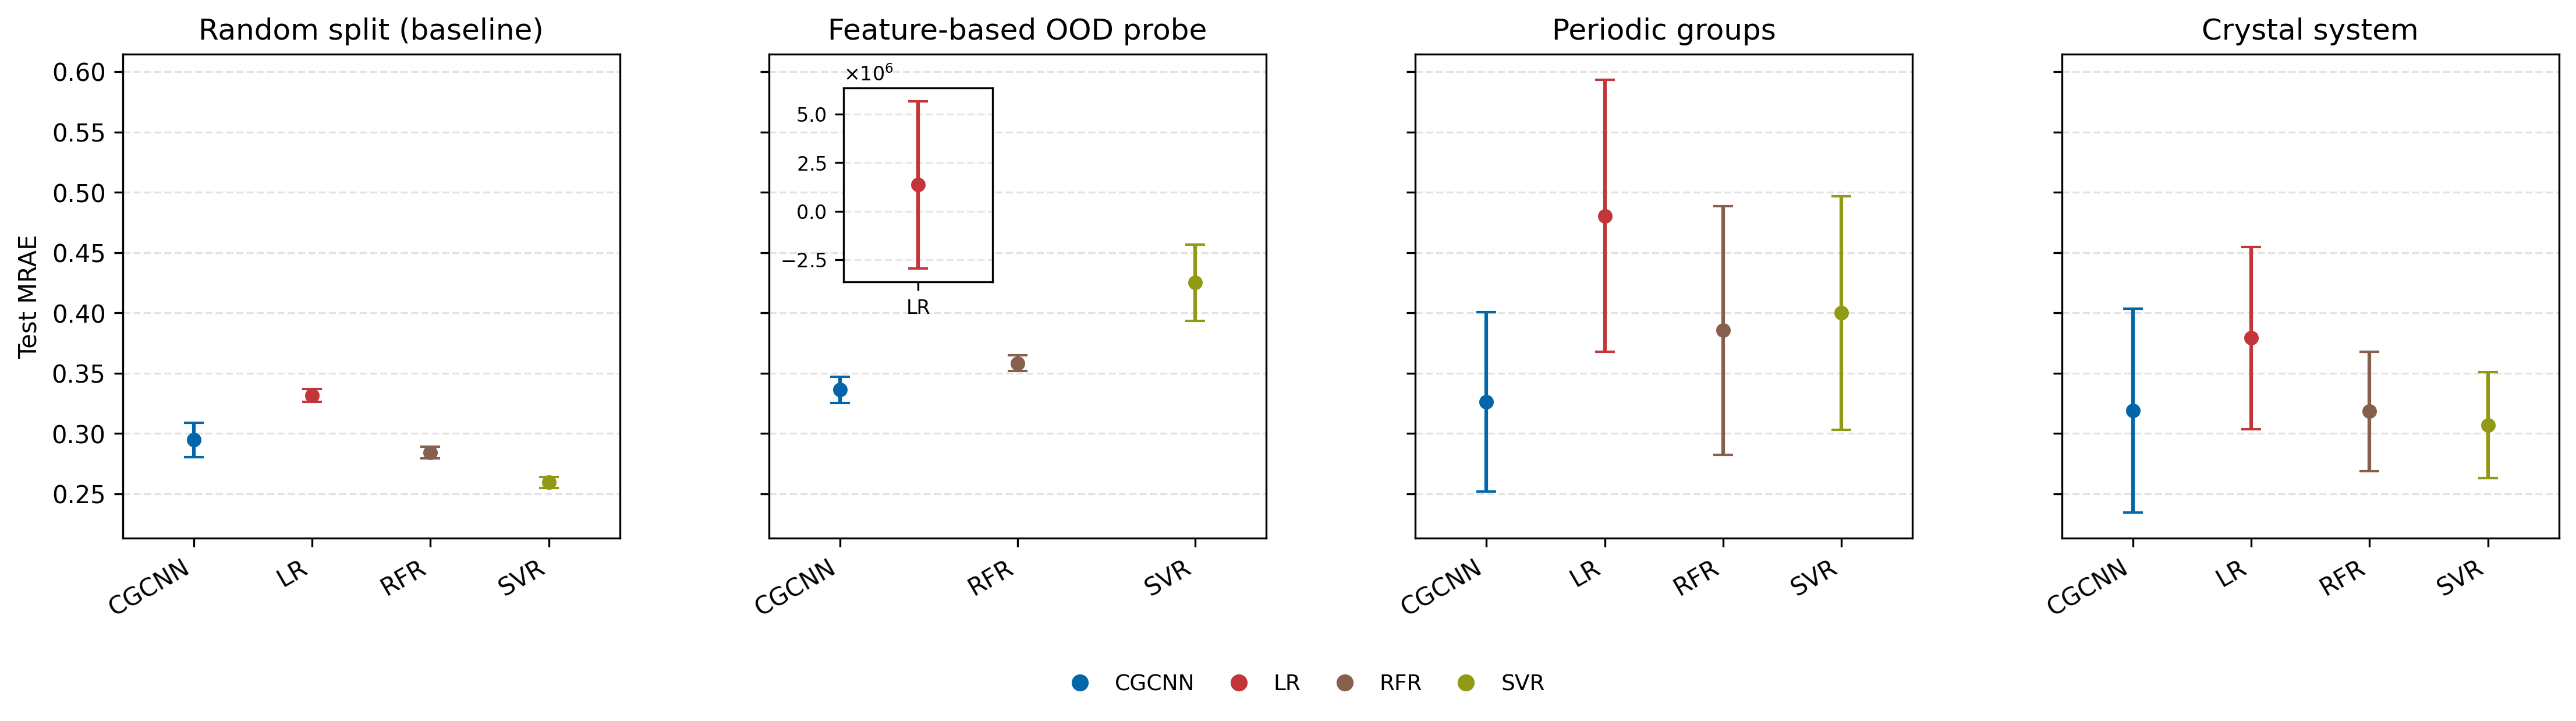

Saved: figs/fig_4panels_sharedscale_insetLR.pdf
Saved: figs/fig_4panels_sharedscale_insetLR.png


In [28]:
# ============================================================
# 4 panels in ONE figure, shared y-scale (except the LR inset):
#   (a) Random split (baseline)          [top-left]
#   (b) Feature-based OOD probe + LR inset [top-right]
#   (c) Periodic groups OOD              [bottom-left]
#   (d) Crystal system OOD               [bottom-right]
#
# Keep style consistent with your existing errorbar panels.
# Only keep: CGCNN + traditional ML (LR/RFR/SVR)
# Shared ylim across the 4 main panels (LR only shown in inset).
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.lines import Line2D


# -----------------------
# Paths / settings
# -----------------------
CSV_MAIN = Path("output/metrics_summary.csv")
CSV_MATFOLD = Path("output/split/best_mre_summary.csv")

OUT_PDF = Path("figs/fig_4panels_sharedscale_insetLR.pdf")
OUT_PNG = Path("figs/fig_4panels_sharedscale_insetLR.png")
OUT_PDF.parent.mkdir(parents=True, exist_ok=True)

METRIC_COL = "test_mre"

KEEP_ALL = ["cgcnn", "linear_regression", "random_forest", "svr"]

# (b) 主轴仍然不画 LR（LR 只在 inset）
KEEP_MAIN_FEATURE = ["cgcnn", "random_forest", "svr"]

# (a)(c)(d) 主轴画回 LR
KEEP_MAIN_OTHERS = KEEP_ALL

METHOD_LR = "linear_regression"

METHOD_LABELS = {
    "cgcnn": "CGCNN",
    "linear_regression": "LR",
    "random_forest": "RFR",
    "svr": "SVR",
}

BASE_COLOR = {
    "cgcnn": "#0366a8",
    "linear_regression": "#c23639",
    "random_forest": "#86604d",
    "svr": "#909a15",
}

# -----------------------
# Helpers (style-compatible with your code)
# -----------------------
def normalize_method(name):
    if not isinstance(name, str):
        return None
    s = name.lower().strip()
    aliases = {
        "cgcnn": "cgcnn",
        "linreg": "linear_regression",
        "linear": "linear_regression",
        "linearregression": "linear_regression",
        "linear_regression": "linear_regression",
        "rf": "random_forest",
        "randomforest": "random_forest",
        "random_forest": "random_forest",
        "svm": "svr",
        "svr": "svr",
    }
    return aliases.get(s, s)

def agg_mean_std(df_sub: pd.DataFrame, metric_col: str, order: list[str]) -> pd.DataFrame:
    summary = (
        df_sub.groupby("method")[metric_col]
        .agg(["mean", "std"])
        .reset_index()
        .rename(columns={"method": "Model", "mean": "Mean", "std": "Std"})
    )
    present = set(summary["Model"])
    order = [m for m in order if m in present]
    if not order:
        return summary.iloc[0:0].copy()
    return summary.set_index("Model").loc[order].reset_index()

def plot_errorbar_panel(ax, summary: pd.DataFrame, title: str, show_ylabel: bool = True, ylim=None):
    if summary.empty:
        ax.text(0.5, 0.5, "No data", ha="center", va="center", transform=ax.transAxes)
        ax.set_axis_off()
        return

    x = np.arange(len(summary))
    for j, (_, row) in enumerate(summary.iterrows()):   # <-- change here
        m = row["Model"]
        ax.errorbar(
            x[j],                                      # <-- change here
            row["Mean"],
            yerr=row["Std"],
            fmt="o",
            capsize=4,
            linestyle="none",
            color=BASE_COLOR.get(m, "C0"),
            markersize=5,
            zorder=3,
        )

    ax.set_xticks(x)
    ax.set_xticklabels([METHOD_LABELS.get(m, m) for m in summary["Model"]],
                       rotation=30, ha="right")
    ax.set_title(title, fontsize=12)
    ax.set_ylabel("Test MRAE" if show_ylabel else "")
    ax.grid(axis="y", linestyle="--", alpha=0.35)
    ax.set_axisbelow(True)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.margins(x=0.2)  # 可调：0.15~0.35



def shared_ylim(*summaries):
    vals = []
    for s in summaries:
        if s is None or s.empty:
            continue
        vals.append((s["Mean"] - s["Std"]).min())
        vals.append((s["Mean"] + s["Std"]).max())
    if not vals:
        return None
    lo, hi = float(min(vals)), float(max(vals))
    pad = 0.06 * (hi - lo) if hi > lo else 0.01
    return (lo - pad, hi + pad)

def normalize_matfold_model_name(name: str) -> str:
    name = str(name).strip().lower()
    mapping = {
        "cgcnn": "cgcnn",
        "linreg": "linear_regression",
        "linearregression": "linear_regression",
        "linear_regression": "linear_regression",
        "randomforest": "random_forest",
        "rf": "random_forest",
        "random_forest": "random_forest",
        "svm": "svr",
        "svr": "svr",
    }
    return mapping.get(name, name)

def matfold_summary_from_best(csv_path: Path, split_name: str, order: list[str] = None) -> pd.DataFrame:
    dfm = pd.read_csv(csv_path)
    dfm = dfm[dfm["split"] == split_name].copy()
    dfm["Model"] = dfm["model"].apply(normalize_matfold_model_name)

    dfm = dfm[dfm["Model"].isin(KEEP_ALL)].copy()
    if dfm.empty:
        return pd.DataFrame(columns=["Model", "Mean", "Std"])

    summary = (
        dfm.groupby("Model")[METRIC_COL]
        .agg(["mean", "std"])
        .reset_index()
        .rename(columns={"mean": "Mean", "std": "Std"})
    )

    if order is None:
        order = KEEP_MAIN_FEATURE  # 保持你原来“主轴不含 LR”的默认行为
    order = [m for m in order if m in set(summary["Model"])]
    return summary.set_index("Model").loc[order].reset_index() if order else summary.iloc[0:0].copy()

# -----------------------
# Load main metrics
# -----------------------
df = pd.read_csv(CSV_MAIN)
req = {"split_dir", "method", METRIC_COL}
missing = [c for c in req if c not in df.columns]
if missing:
    raise KeyError(f"{CSV_MAIN} missing columns: {missing}. Available: {list(df.columns)}")

df["method"] = df["method"].map(normalize_method)
df[METRIC_COL] = pd.to_numeric(df[METRIC_COL], errors="coerce")
df = df.dropna(subset=["split_dir", "method", METRIC_COL])

# -----------------------
# (a) Random split baseline:
# -----------------------
df_random_cgcnn = df[(df["split_dir"] == "finetune100") & (df["method"] == "cgcnn")].copy()
df_random_trad  = df[(df["split_dir"] == "train_from_scratch") & (df["method"].isin(["linear_regression", "random_forest", "svr"]))].copy()
df_random = pd.concat([df_random_cgcnn, df_random_trad], ignore_index=True)

# 这里改为 KEEP_MAIN_OTHERS（把 LR 画回主轴）
sum_random_main = agg_mean_std(df_random[df_random["method"].isin(KEEP_MAIN_OTHERS)], METRIC_COL, KEEP_MAIN_OTHERS)

# -----------------------
# (b) Feature-based OOD probe:
# -----------------------
df_ood_cgcnn = df[(df["split_dir"] == "ood") & (df["method"] == "cgcnn")].copy()
df_ood_trad  = df[(df["split_dir"] == "ood_no_pretrain") & (df["method"].isin(["linear_regression", "random_forest", "svr"]))].copy()
df_ood = pd.concat([df_ood_cgcnn, df_ood_trad], ignore_index=True)

sum_ood_all = agg_mean_std(df_ood, METRIC_COL, KEEP_ALL)

# (b) 主轴保持不变：仍不包含 LR
sum_ood_main = sum_ood_all[sum_ood_all["Model"].isin(KEEP_MAIN_FEATURE)].copy()
sum_ood_lr   = sum_ood_all[sum_ood_all["Model"] == METHOD_LR].copy()

# -----------------------
# (c)(d) MatFold summaries (Periodic / Crystal)
# -----------------------
sum_periodic_main = matfold_summary_from_best(CSV_MATFOLD, "periodictablegroups", order=KEEP_MAIN_OTHERS)
sum_crystal_main  = matfold_summary_from_best(CSV_MATFOLD, "crystalsys",            order=KEEP_MAIN_OTHERS)

ylim_shared = shared_ylim(sum_random_main, sum_ood_main, sum_periodic_main, sum_crystal_main)

# -----------------------
# Plot: 1×4 layout
# -----------------------
plt.close("all")
fig = plt.figure(figsize=(18.0, 4.2), dpi=300)   # 横向更长；可按需要调
gs = gridspec.GridSpec(1, 4, wspace=0.3, hspace=0.0)

ax1 = fig.add_subplot(gs[0, 0])  # (a) Random split baseline
ax2 = fig.add_subplot(gs[0, 1])  # (b) Feature OOD + inset
ax3 = fig.add_subplot(gs[0, 2])  # (c) Periodic groups
ax4 = fig.add_subplot(gs[0, 3])  # (d) Crystal system

plot_errorbar_panel(ax1, sum_random_main,   "Random split (baseline)",   show_ylabel=True,  ylim=ylim_shared)
plot_errorbar_panel(ax2, sum_ood_main,      "Feature-based OOD probe",   show_ylabel=False, ylim=ylim_shared)
plot_errorbar_panel(ax3, sum_periodic_main, "Periodic groups",           show_ylabel=False, ylim=ylim_shared)
plot_errorbar_panel(ax4, sum_crystal_main,  "Crystal system",            show_ylabel=False, ylim=ylim_shared)
for ax in (ax2, ax3, ax4):
    ax.tick_params(axis="y", labelleft=False)


# ---- inset: LR (ONLY on Feature-based OOD panel)
if not sum_ood_lr.empty:
    row = sum_ood_lr.iloc[0]
    mu = float(row["Mean"])
    sd = float(row["Std"]) if np.isfinite(row["Std"]) else 0.0

    # 用 ax2.inset_axes：位置可控、不会被 locator/tight_layout 覆盖
    axins = ax2.inset_axes([0.15, 0.53, 0.30, 0.40])  # 右移：调大 0.18

    axins.errorbar(
        0, mu, yerr=sd,
        fmt="o", capsize=4, linestyle="none",
        color=BASE_COLOR[METHOD_LR],
        markersize=5, zorder=3
    )

    axins.set_xticks([0])
    axins.set_xticklabels([METHOD_LABELS[METHOD_LR]])
    axins.tick_params(labelsize=8)
    axins.grid(axis="y", linestyle="--", alpha=0.30)
    axins.set_axisbelow(True)

    lo = mu - sd
    hi = mu + sd
    if not np.isfinite(lo) or not np.isfinite(hi) or hi <= lo:
        lo = mu * 0.9
        hi = mu * 1.1 if mu != 0 else 1.0
    pad = 0.08 * (hi - lo)
    axins.set_ylim(lo - pad, hi + pad)

    # y轴科学计数法
    from matplotlib.ticker import ScalarFormatter
    sci_fmt = ScalarFormatter(useMathText=True)
    sci_fmt.set_scientific(True)
    sci_fmt.set_powerlimits((0, 0))
    axins.yaxis.set_major_formatter(sci_fmt)
    axins.ticklabel_format(axis="y", style="sci", scilimits=(0, 0), useMathText=True)
    axins.yaxis.get_offset_text().set_size(8)

# ---- global legend (color label) at bottom
from matplotlib.lines import Line2D
method_handles = [
    Line2D([0], [0], marker="o", linestyle="none",
           markerfacecolor=BASE_COLOR[m], markeredgecolor=BASE_COLOR[m],
           markersize=6, label=METHOD_LABELS.get(m, m))
    for m in KEEP_ALL
]
all_handles = method_handles
all_labels = [h.get_label() for h in all_handles]

fig.legend(
    handles=all_handles,
    labels=all_labels,
    loc="lower center",
    ncol=5,
    frameon=False,
    fontsize=9,
    handlelength=2.0,
    handletextpad=0.6,
    columnspacing=1.0,
    bbox_to_anchor=(0.5, -0.02),
)

# 给底部 legend 留空间
fig.subplots_adjust(bottom=0.22)


# save
fig.tight_layout()
fig.savefig(OUT_PDF, bbox_inches="tight")
fig.savefig(OUT_PNG, bbox_inches="tight")
plt.show()

print(f"Saved: {OUT_PDF}")
print(f"Saved: {OUT_PNG}")


In [20]:
import numpy as np
import pandas as pd

CSV = "output/metrics_summary.csv"
METRIC = "test_mre"

# (display name, z_method, prop_method)
MODELS = [
    ("CartNet", "cartnet_z",  "cartnet_prop"),
    ("ALIGNN",  "alignn_z",   "alignn_prop"),
    ("LEFTNet", "leftnet_z",  "leftnet_prop"),
    ("CHGNet",  "chgnet_z",   "chgnet_prop"),
]

# LOMO split_dir
LOMO_SPLIT_DIR = "category"

df = pd.read_csv(CSV)
df["method"] = df["method"].astype(str).str.lower().str.strip()
df["method"] = df["method"].replace({
    "cartnet": "cartnet_z",
    "alignn": "alignn_z",
    "chgnet": "chgnet_z",
})

if "split_name" not in df.columns:
    raise KeyError(f"'split_name' column not found. Available: {list(df.columns)}")

methods_needed = [m for _, z, p in MODELS for m in (z, p)]
d = df[(df["split_dir"] == LOMO_SPLIT_DIR) & (df["method"].isin(methods_needed))].copy()

agg = (
    d.groupby(["split_name", "method"])[METRIC]
     .agg(mean="mean", std="std")
     .reset_index()
)

# ---------- new formatting ----------
def fmt(mean, std, digits=3):
    if pd.isna(mean):
        return "--"
    if pd.isna(std):
        return rf"$\text{{{mean:.{digits}f}}}$"
    return rf"$\text{{{mean:.{digits}f}}}_\text{{({std:.{digits}f})}}$"
# -----------------------------------

categories = sorted(agg["split_name"].dropna().unique().tolist())

lines = []
lines.append(r"\begin{tabular}{ll" + "c"*len(categories) + "}")
lines.append(r"\toprule")
lines.append(r"Model & Encoding & " + " & ".join(categories) + r" \\")
lines.append(r"\midrule")

for model_name, z_m, p_m in MODELS:
    for enc_label, method in [("Z", z_m), ("Prop", p_m)]:
        row = []
        for cat in categories:
            sub = agg[(agg["split_name"] == cat) & (agg["method"] == method)]
            if len(sub) == 0:
                row.append("--")
            else:
                mean = float(sub["mean"].iloc[0])
                std  = float(sub["std"].iloc[0]) if pd.notna(sub["std"].iloc[0]) else np.nan
                row.append(fmt(mean, std))
        lines.append(f"{model_name} & {enc_label} & " + " & ".join(row) + r" \\")
    lines.append(r"\midrule")

lines[-1] = r"\bottomrule"
lines.append(r"\end{tabular}")

print("\n".join(lines))


\begin{tabular}{llcccccccccc}
\toprule
Model & Encoding & Antimonides & Arsenides & Carbides & Chalcogenides & Halides & Hydrides & Nitrides & Oxides & Phosphides & Silicides \\
\midrule
CartNet & Z & $\text{0.716}$ & $\text{0.401}$ & $\text{0.250}$ & $\text{0.318}$ & $\text{0.422}$ & $\text{0.542}$ & $\text{0.824}$ & $\text{0.371}$ & $\text{0.435}$ & $\text{0.619}$ \\
CartNet & Prop & $\text{0.267}$ & $\text{0.414}$ & $\text{0.322}$ & $\text{0.297}$ & $\text{0.423}$ & $\text{0.508}$ & $\text{0.520}$ & $\text{0.497}$ & $\text{0.319}$ & $\text{1.008}$ \\
\midrule
ALIGNN & Z & $\text{0.353}$ & $\text{0.488}$ & $\text{0.181}$ & $\text{0.310}$ & $\text{0.373}$ & $\text{0.291}$ & $\text{0.514}$ & $\text{0.297}$ & $\text{0.309}$ & $\text{0.844}$ \\
ALIGNN & Prop & $\text{0.503}$ & $\text{0.323}$ & $\text{0.287}$ & $\text{0.342}$ & $\text{0.466}$ & $\text{0.323}$ & $\text{0.430}$ & $\text{0.302}$ & $\text{0.280}$ & $\text{0.531}$ \\
\midrule
LEFTNet & Z & $\text{1.337}$ & $\text{0.649}$ & $\t

as part of the necessity of atomic encoding discussion, i also add the SHAP value from the traditional machine learning methods analysis. So we could see which atomic property contribute most to the prediction.